In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import cohen_kappa_score,f1_score,accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=[12,5]
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
import statsmodels.api as sm
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import ttest_ind,f_oneway,chi2_contingency,kruskal
from scipy import stats

# READING DATA

In [3]:
df= pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin1')
df.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   

   Customer Zipcode  Department Id Department Name   Latitude  Longitude  \
0             725.0              2         Fitness  18.251453 -66.037056   
1             725.0              2         Fitness  18.279451 -66.037064   

         Market Order City Order Country  Order Customer Id  \
0  Pacific Asia     Bekasi     Indonesia              20755   
1  Pacific Asia    Bikaner         India              19492   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales  Order Item Total  Order Profit Per Order    Order Region  \
0  327.75        314.640015               91.250000  Southeast Asia   
1  327.75        311.359985             -249.089996      South Asia   

       Order State Order Status  Order Zipcode  Product Card Id  \
0  Java Occidental     COMPLETE            NaN             1360   
1         Rajastán      PENDING            NaN             1360   

   Product Category Id  Product Description  \
0                   73                  NaN   
1                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  
0               0           02-03-2018 22:56  Standard Class  
1               0            1/18/2018 12:27  Standard Class

df=pd.read_csv('DataCoSupplyChainDataset (1).csv',encoding='latin1')
df.head()

In [4]:
df.shape

(180519, 53)

In [5]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

### changing the datatype of wrongly classified columns

In [6]:
df['Late_delivery_risk']=df['Late_delivery_risk'].astype('object')

In [7]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                object
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [8]:
df.shape
# there are 53 columns and 1,80,519 rows as of now

(180519, 53)

In [9]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


FINDING NULL VALUES

In [10]:
# finding null values
df.isnull().sum().sort_values(ascending=False).head(6)

Product Description       180519
Order Zipcode             155679
Customer Lname                 8
Customer Zipcode               3
Type                           0
Order Profit Per Order         0
dtype: int64

PERCENTAGE OF NULL VALUES

In [11]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(6)

Product Description       100.000000
Order Zipcode              86.239676
Customer Lname              0.004432
Customer Zipcode            0.001662
Type                        0.000000
Order Profit Per Order      0.000000
dtype: float64

In [12]:
# we create a copy of the data for further analysis
df1=df.copy()

In [13]:

df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

   Category Id   Category Name Customer City Customer Country Customer Email  \
0           73  Sporting Goods        Caguas      Puerto Rico      XXXXXXXXX   
1           73  Sporting Goods        Caguas      Puerto Rico      XXXXXXXXX   

  Customer Fname  Customer Id Customer Lname Customer Password  \
0          Cally        20755       Holloway         XXXXXXXXX   
1          Irene        19492           Luna         XXXXXXXXX   

  Customer Segment Customer State           Customer Street  Customer Zipcode  \
0         Consumer             PR  5365 Noble Nectar Island             725.0   
1         Consumer             PR          2679 Rustic Loop             725.0   

   Department Id Department Name   Latitude  Longitude        Market  \
0              2         Fitness  18.251453 -66.037056  Pacific Asia   
1              2         Fitness  18.279451 -66.037064  Pacific Asia   

  Order City Order Country  Order Customer Id order date (DateOrders)  \
0     Bekasi     Indonesia              20755         1/31/2018 22:56   
1    Bikaner         India              19492         1/13/2018 12:27   

   Order Id  Order Item Cardprod Id  Order Item Discount  \
0     77202                    1360            13.110000   
1     75939                    1360            16.389999   

   Order Item Discount Rate  Order Item Id  Order Item Product Price  \
0                      0.04         180517                    327.75   
1                      0.05         179254                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   

   Order Profit Per Order    Order Region      Order State Order Status  \
0               91.250000  Southeast Asia  Java Occidental     COMPLETE   
1             -249.089996      South Asia         Rajastán      PENDING   

   Order Zipcode  Product Card Id  Product Category Id  Product Description  \
0            NaN             1360                   73                  NaN   
1            NaN             1360                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  
0               0           02-03-2018 22:56  Standard Class  
1               0            1/18/2018 12:27  Standard Class

### we create a new column by attactching customer fname, lname to create full name

In [14]:

df1['customer full name']= df1['Customer Fname']+df1['Customer Lname']

In [15]:
df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

   Category Id   Category Name Customer City Customer Country Customer Email  \
0           73  Sporting Goods        Caguas      Puerto Rico      XXXXXXXXX   
1           73  Sporting Goods        Caguas      Puerto Rico      XXXXXXXXX   

  Customer Fname  Customer Id Customer Lname Customer Password  \
0          Cally        20755       Holloway         XXXXXXXXX   
1          Irene        19492           Luna         XXXXXXXXX   

  Customer Segment Customer State           Customer Street  Customer Zipcode  \
0         Consumer             PR  5365 Noble Nectar Island             725.0   
1         Consumer             PR          2679 Rustic Loop             725.0   

   Department Id Department Name   Latitude  Longitude        Market  \
0              2         Fitness  18.251453 -66.037056  Pacific Asia   
1              2         Fitness  18.279451 -66.037064  Pacific Asia   

  Order City Order Country  Order Customer Id order date (DateOrders)  \
0     Bekasi     Indonesia              20755         1/31/2018 22:56   
1    Bikaner         India              19492         1/13/2018 12:27   

   Order Id  Order Item Cardprod Id  Order Item Discount  \
0     77202                    1360            13.110000   
1     75939                    1360            16.389999   

   Order Item Discount Rate  Order Item Id  Order Item Product Price  \
0                      0.04         180517                    327.75   
1                      0.05         179254                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   

   Order Profit Per Order    Order Region      Order State Order Status  \
0               91.250000  Southeast Asia  Java Occidental     COMPLETE   
1             -249.089996      South Asia         Rajastán      PENDING   

   Order Zipcode  Product Card Id  Product Category Id  Product Description  \
0            NaN             1360                   73                  NaN   
1            NaN             1360                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  \
0               0           02-03-2018 22:56  Standard Class   
1               0            1/18/2018 12:27  Standard Class   

  customer full name  
0      CallyHolloway  
1          IreneLuna

In [16]:
df1.shape # added one column customer full name

(180519, 54)

### we create a new columns 'Late by no. of days' by subtracting
### "Days for shipment (real)" - "Days for shipment (scheduled)" ="Late by(Days)"

In [17]:
df1["Late by(Days)"]=df1['Days for shipping (real)']-df1['Days for shipment (scheduled)']

In [18]:
df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

   Category Id   Category Name Customer City Customer Country Customer Email  \
0           73  Sporting Goods        Caguas      Puerto Rico      XXXXXXXXX   
1           73  Sporting Goods        Caguas      Puerto Rico      XXXXXXXXX   

  Customer Fname  Customer Id Customer Lname Customer Password  \
0          Cally        20755       Holloway         XXXXXXXXX   
1          Irene        19492           Luna         XXXXXXXXX   

  Customer Segment Customer State           Customer Street  Customer Zipcode  \
0         Consumer             PR  5365 Noble Nectar Island             725.0   
1         Consumer             PR          2679 Rustic Loop             725.0   

   Department Id Department Name   Latitude  Longitude        Market  \
0              2         Fitness  18.251453 -66.037056  Pacific Asia   
1              2         Fitness  18.279451 -66.037064  Pacific Asia   

  Order City Order Country  Order Customer Id order date (DateOrders)  \
0     Bekasi     Indonesia              20755         1/31/2018 22:56   
1    Bikaner         India              19492         1/13/2018 12:27   

   Order Id  Order Item Cardprod Id  Order Item Discount  \
0     77202                    1360            13.110000   
1     75939                    1360            16.389999   

   Order Item Discount Rate  Order Item Id  Order Item Product Price  \
0                      0.04         180517                    327.75   
1                      0.05         179254                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   

   Order Profit Per Order    Order Region      Order State Order Status  \
0               91.250000  Southeast Asia  Java Occidental     COMPLETE   
1             -249.089996      South Asia         Rajastán      PENDING   

   Order Zipcode  Product Card Id  Product Category Id  Product Description  \
0            NaN             1360                   73                  NaN   
1            NaN             1360                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  \
0               0           02-03-2018 22:56  Standard Class   
1               0            1/18/2018 12:27  Standard Class   

  customer full name  Late by(Days)  
0      CallyHolloway             -1  
1          IreneLuna              1

In [19]:
df1.shape #added one more column late by no of days

(180519, 55)

In [20]:
df1['Late by(Days)'].value_counts()

 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: Late by(Days), dtype: int64

DROPPING COLUMNS

## we are droping the columns with most null values,(86%,100%)
## we are droping the columns which are redundant,repetitive

In [21]:
df1.drop(['Category Id','Customer Email','Customer Fname','Customer Id','Customer Lname','Customer Password','Customer Zipcode',
          'Customer Street','Department Id','Latitude','Longitude','Order Customer Id','Order Id','Order Item Cardprod Id',
          'Order Item Total','Order Item Id','Order Profit Per Order','Order Zipcode','Product Image','Product Card Id',
         'Product Category Id','Product Description','Product Status'],axis=1,inplace=True)

In [22]:
df1.shape  # we droped 23 columns which are redundant and most null values

(180519, 32)

In [23]:
df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

    Category Name Customer City Customer Country Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico         Consumer   
1  Sporting Goods        Caguas      Puerto Rico         Consumer   

  Customer State Department Name        Market Order City Order Country  \
0             PR         Fitness  Pacific Asia     Bekasi     Indonesia   
1             PR         Fitness  Pacific Asia    Bikaner         India   

  order date (DateOrders)  Order Item Discount  Order Item Discount Rate  \
0         1/31/2018 22:56            13.110000                      0.04   
1         1/13/2018 12:27            16.389999                      0.05   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales    Order Region      Order State Order Status  Product Name  \
0  327.75  Southeast Asia  Java Occidental     COMPLETE  Smart watch    
1  327.75      South Asia         Rajastán      PENDING  Smart watch    

   Product Price shipping date (DateOrders)   Shipping Mode  \
0         327.75           02-03-2018 22:56  Standard Class   
1         327.75            1/18/2018 12:27  Standard Class   

  customer full name  Late by(Days)  
0      CallyHolloway             -1  
1          IreneLuna              1

## RENAMING COLUMNS

In [24]:
# we are renaming to columns according to the data description for easy understanding
df1.rename({'Customer City':'Source City','Customer Country':'Source Country','Customer State':'Source State',
           'Market':'Destination Market','Order City':'Destination City','Order Country':'Destination Country',
           'Order Region':'Destination Region','Order State':'Destination State'},axis=1,inplace=True)

In [25]:
df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

    Category Name Source City Source Country Customer Segment Source State  \
0  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   
1  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   

  Department Name Destination Market Destination City Destination Country  \
0         Fitness       Pacific Asia           Bekasi           Indonesia   
1         Fitness       Pacific Asia          Bikaner               India   

  order date (DateOrders)  Order Item Discount  Order Item Discount Rate  \
0         1/31/2018 22:56            13.110000                      0.04   
1         1/13/2018 12:27            16.389999                      0.05   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales Destination Region Destination State Order Status  Product Name  \
0  327.75     Southeast Asia   Java Occidental     COMPLETE  Smart watch    
1  327.75         South Asia          Rajastán      PENDING  Smart watch    

   Product Price shipping date (DateOrders)   Shipping Mode  \
0         327.75           02-03-2018 22:56  Standard Class   
1         327.75            1/18/2018 12:27  Standard Class   

  customer full name  Late by(Days)  
0      CallyHolloway             -1  
1          IreneLuna              1

## NULL VALUE TREATMENT

In [26]:
df1.isnull().sum().sort_values().tail()
# we can see we have only 8 rows which have null values in customer full name

Benefit per order                0
Days for shipment (scheduled)    0
Days for shipping (real)         0
Late by(Days)                    0
customer full name               8
dtype: int64

In [27]:
# we drop the null value rows
df1.dropna(inplace=True)

In [28]:
df1.isnull().sum() # there are no null values now in the data

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Source City                      0
Source Country                   0
Customer Segment                 0
Source State                     0
Department Name                  0
Destination Market               0
Destination City                 0
Destination Country              0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Destination Region               0
Destination State                0
Order Status                     0
Product Name                     0
Product Price                    0
shipping date (DateO

In [29]:
df1.shape

(180511, 32)

## OUTLIER CHECKING

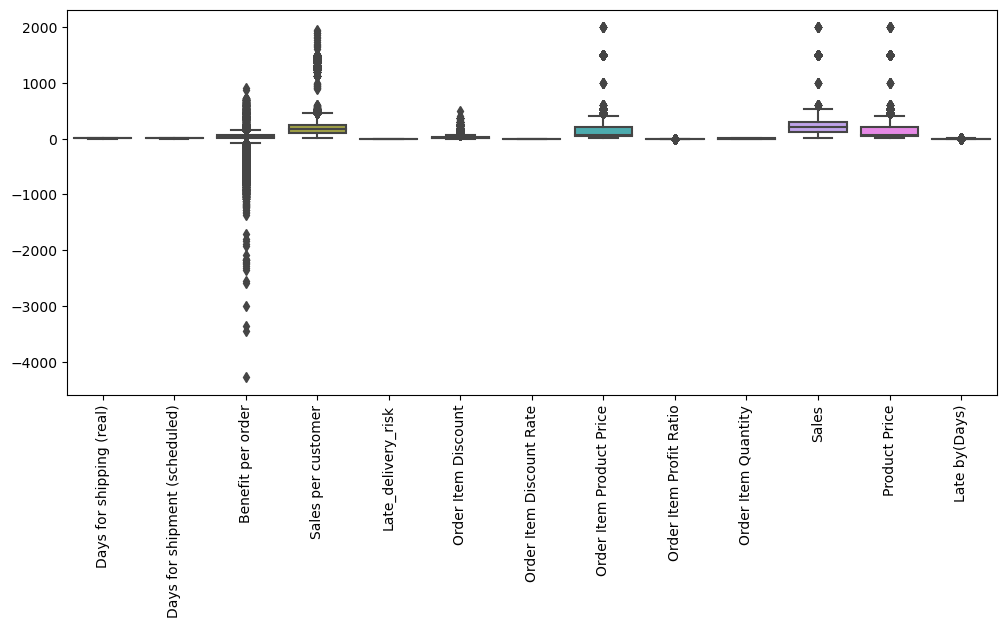

In [30]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()
# we can observe that there are outliers present in most of the columns.

In [31]:
df1.std()

Days for shipping (real)           1.623734
Days for shipment (scheduled)      1.374457
Benefit per order                104.433086
Sales per customer               120.041376
Late_delivery_risk                 0.497664
Order Item Discount               21.801021
Order Item Discount Rate           0.070416
Order Item Product Price         139.727174
Order Item Profit Ratio            0.466803
Order Item Quantity                1.453464
Sales                            132.270795
Product Price                    139.727174
Late by(Days)                      1.490965
dtype: float64

In [32]:
df[['order date (DateOrders)','shipping date (DateOrders)']].head()

order date (DateOrders) shipping date (DateOrders)
0         1/31/2018 22:56           02-03-2018 22:56
1         1/13/2018 12:27            1/18/2018 12:27
2         1/13/2018 12:06            1/17/2018 12:06
3         1/13/2018 11:45            1/16/2018 11:45
4         1/13/2018 11:24            1/15/2018 11:24


### change the variable data type to date time and creating columns for month,year time and days

In [ ]:
# change the variable data type to date time and creating columns for month,year time and days

df1['order_year']= pd.to_datetime(df1['order date (DateOrders)']).dt.year
df1['order_month'] = pd.to_datetime(df1['order date (DateOrders)']).dt.month
df1['order_week_day'] = pd.to_datetime(df1['order date (DateOrders)']).dt.weekday
df1['order_hour'] = pd.to_datetime(df1['order date (DateOrders)']).dt.hour

In [34]:
df1['shipping_year']= pd.to_datetime(df1['shipping date (DateOrders)']).dt.year
df1['shipping_month'] = pd.to_datetime(df1['shipping date (DateOrders)']).dt.month
df1['shipping_week_day'] = pd.to_datetime(df1['shipping date (DateOrders)']).dt.weekday
df1['shipping_hour'] = pd.to_datetime(df1['shipping date (DateOrders)']).dt.hour

In [35]:
df1.shape

(180511, 40)

In [36]:
df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

    Category Name Source City Source Country Customer Segment Source State  \
0  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   
1  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   

  Department Name Destination Market Destination City Destination Country  \
0         Fitness       Pacific Asia           Bekasi           Indonesia   
1         Fitness       Pacific Asia          Bikaner               India   

  order date (DateOrders)  Order Item Discount  Order Item Discount Rate  \
0         1/31/2018 22:56            13.110000                      0.04   
1         1/13/2018 12:27            16.389999                      0.05   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales Destination Region Destination State Order Status  Product Name  \
0  327.75     Southeast Asia   Java Occidental     COMPLETE  Smart watch    
1  327.75         South Asia          Rajastán      PENDING  Smart watch    

   Product Price shipping date (DateOrders)   Shipping Mode  \
0         327.75           02-03-2018 22:56  Standard Class   
1         327.75            1/18/2018 12:27  Standard Class   

  customer full name  Late by(Days)  order_year  order_month  order_week_day  \
0      CallyHolloway             -1        2018            1               2   
1          IreneLuna              1        2018            1               5   

   order_hour  shipping_year  shipping_month  shipping_week_day  shipping_hour  
0          22           2018               2                  5             22  
1          12           2018               1                  3             12

# UNIVARIANT ANALYSIS

In [ ]:
df1.columns

In [38]:
df1_cat=df1.select_dtypes('object')
df1_cat.head(2)

Type   Delivery Status Late_delivery_risk   Category Name Source City  \
0     DEBIT  Advance shipping                  0  Sporting Goods      Caguas   
1  TRANSFER     Late delivery                  1  Sporting Goods      Caguas   

  Source Country Customer Segment Source State Department Name  \
0    Puerto Rico         Consumer           PR         Fitness   
1    Puerto Rico         Consumer           PR         Fitness   

  Destination Market Destination City Destination Country  \
0       Pacific Asia           Bekasi           Indonesia   
1       Pacific Asia          Bikaner               India   

  order date (DateOrders) Destination Region Destination State Order Status  \
0         1/31/2018 22:56     Southeast Asia   Java Occidental     COMPLETE   
1         1/13/2018 12:27         South Asia          Rajastán      PENDING   

   Product Name shipping date (DateOrders)   Shipping Mode customer full name  
0  Smart watch            02-03-2018 22:56  Standard Class      CallyHolloway  
1  Smart watch             1/18/2018 12:27  Standard Class          IreneLuna

In [39]:
df1_cat.drop(['Category Name','Source City','Destination City','Destination Country','Destination State','Product Name',
            'order date (DateOrders)','shipping date (DateOrders)','customer full name','Source State'],1,inplace=True)

In [40]:
df1_cat.shape

(180511, 10)

In [41]:
df1_cat.drop(['Delivery Status','Late_delivery_risk'],1,inplace=True)

In [42]:
df1_cat[['order_year','Days for shipment (scheduled)','order_month']]=df1[['order_year','Days for shipment (scheduled)','order_month']]

In [43]:
df1['Source Country'].replace('EE. UU.','USA',inplace=True)

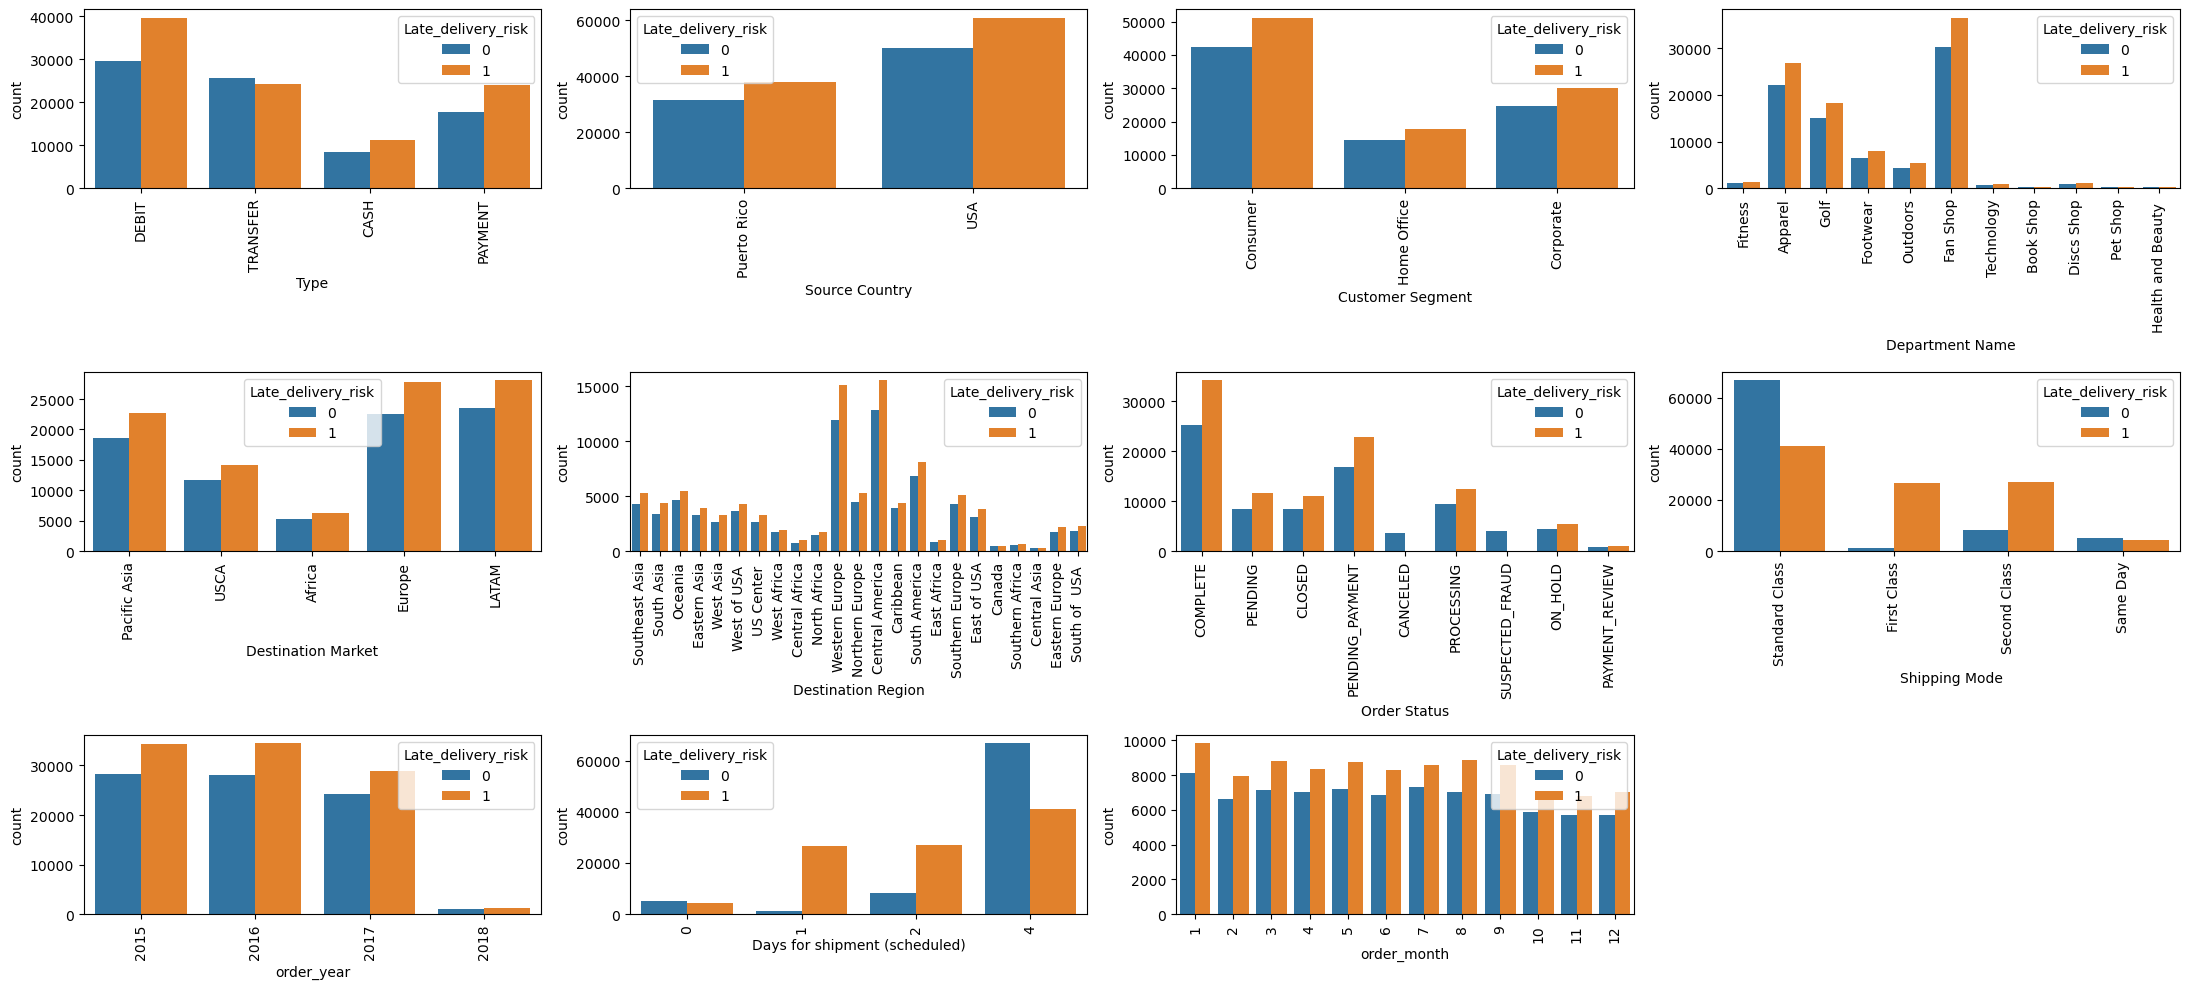

In [44]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df1_cat.columns,range(1,12)):
    plt.subplot(3,4,j)
    sns.countplot(x=df1[i],hue=df1['Late_delivery_risk'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
df1_num=df1.select_dtypes(exclude='object')

In [46]:
df1_num.head(2)

Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  \
0                         3                              4          91.250000   
1                         5                              4        -249.089996   

   Sales per customer  Order Item Discount  Order Item Discount Rate  \
0          314.640015            13.110000                      0.04   
1          311.359985            16.389999                      0.05   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales  Product Price  Late by(Days)  order_year  order_month  \
0  327.75         327.75             -1        2018            1   
1  327.75         327.75              1        2018            1   

   order_week_day  order_hour  shipping_year  shipping_month  \
0               2          22           2018               2   
1               5          12           2018               1   

   shipping_week_day  shipping_hour  
0                  5             22  
1                  3             12

In [47]:
df1_num.drop(['Days for shipping (real)','Days for shipment (scheduled)','Late by(Days)','shipping_year','shipping_month',
             'shipping_week_day','shipping_hour'],axis=1,inplace=True)

In [48]:
len(df1_num.columns)

13

In [49]:
df1_num.columns

Index(['Benefit per order', 'Sales per customer', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Product Price', 'order_year', 'order_month', 'order_week_day',
       'order_hour'],
      dtype='object')

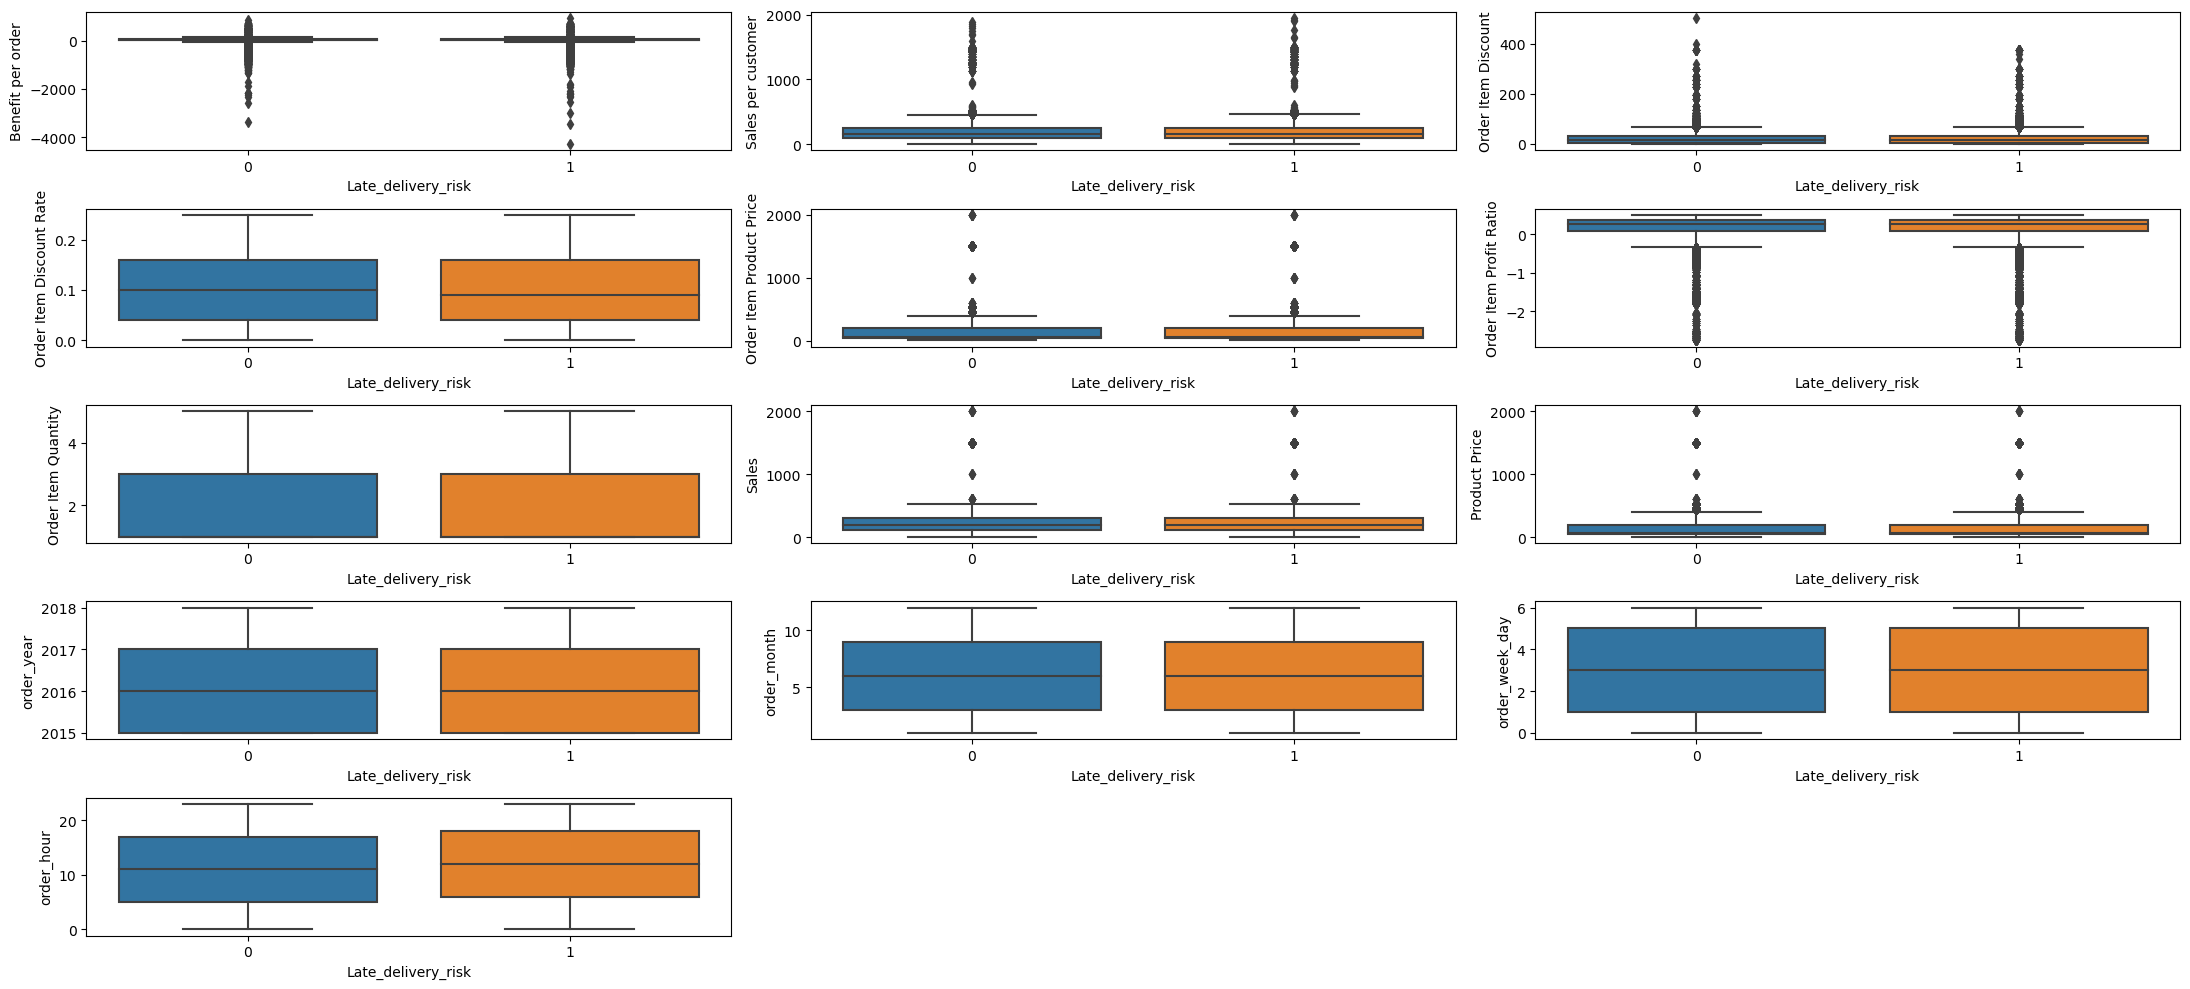

In [50]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df1_num.columns,range(1,21)):
    plt.subplot(5,3,j)
    sns.boxplot(x=df1['Late_delivery_risk'],y=df1_num[i])
plt.tight_layout()
plt.show()

plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df1_num.columns,range(1,21)):
    plt.subplot(5,3,j)
    sns.boxplot(x=df1['Late_delivery_risk'],y=x[i])
plt.tight_layout()
plt.show()

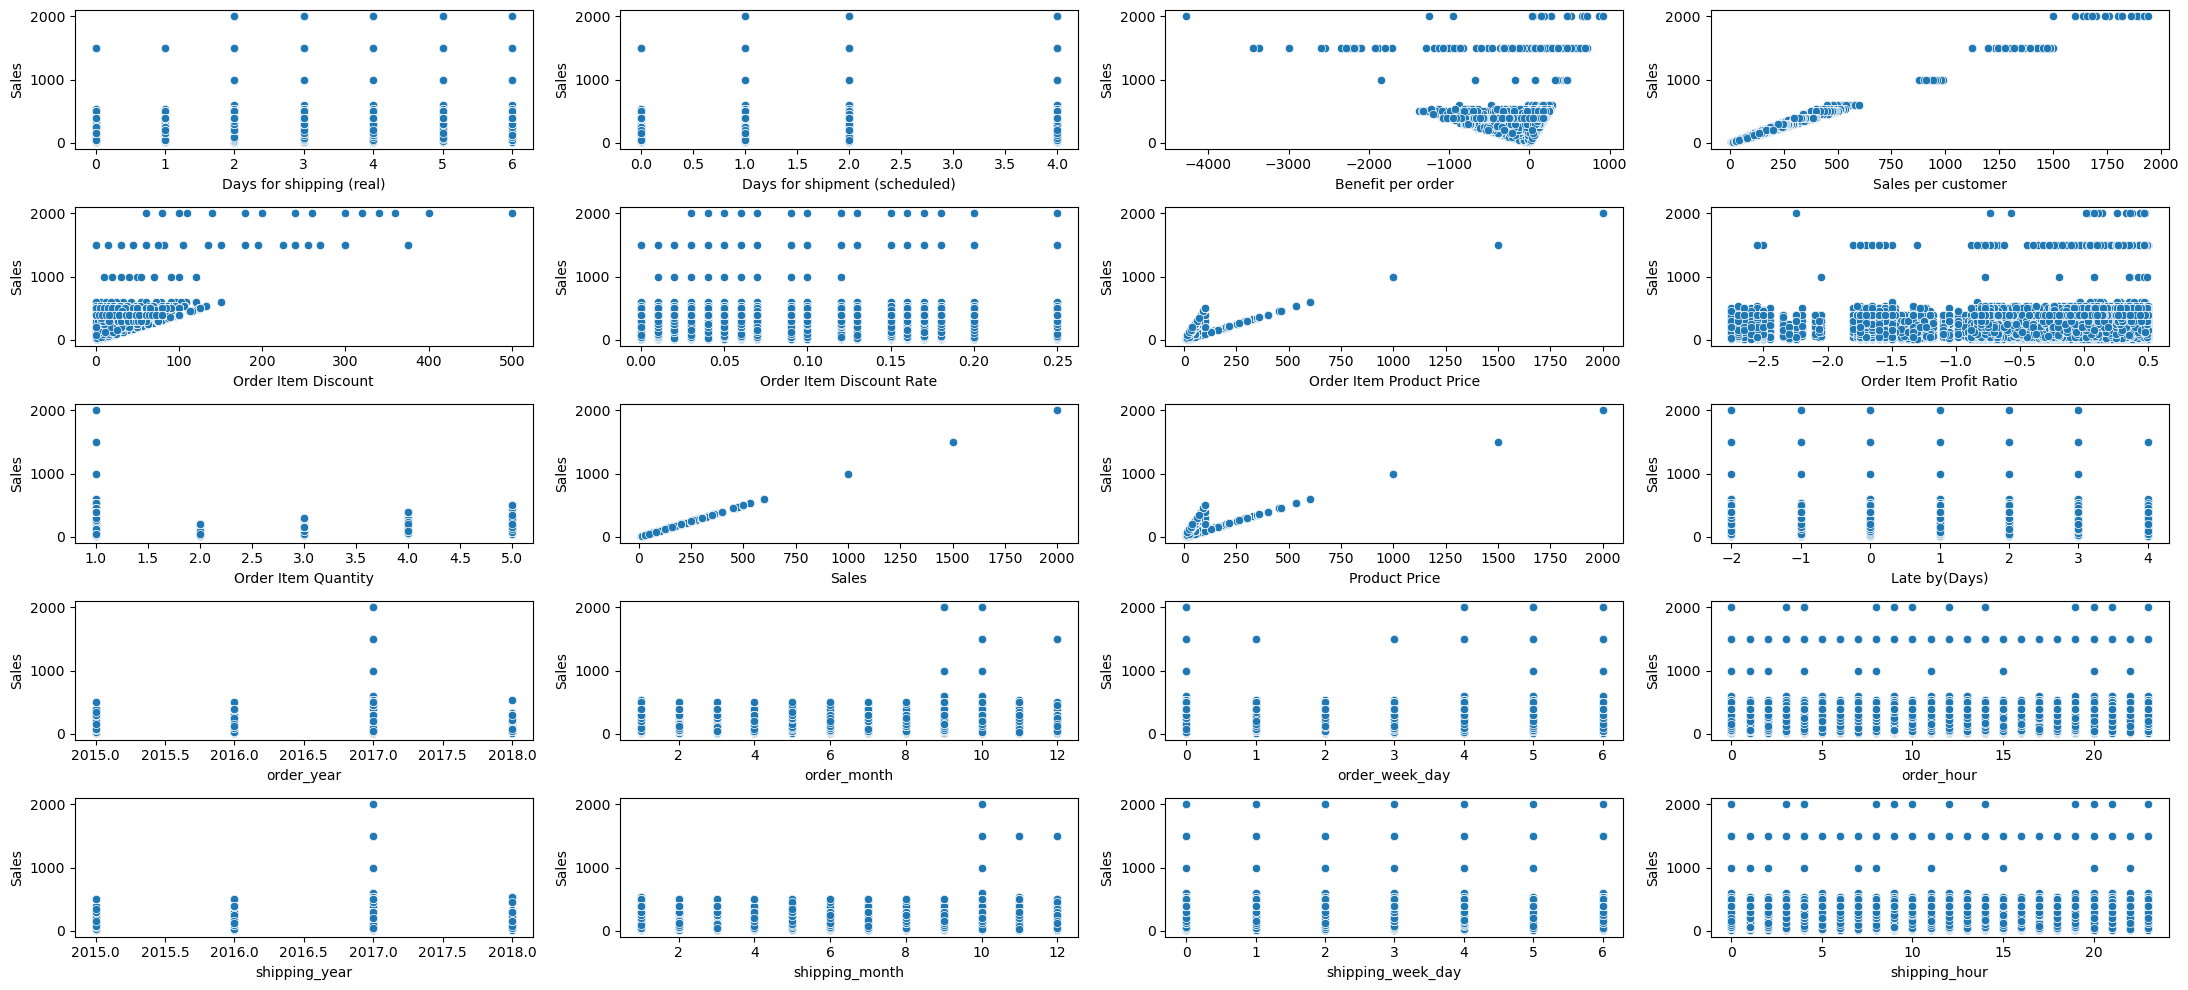

In [51]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df1.select_dtypes(exclude='object').columns,range(1,21)):
    plt.subplot(5,4,j)
    sns.scatterplot(x=df1[i],y=df1['Sales'])
plt.tight_layout()
plt.show()

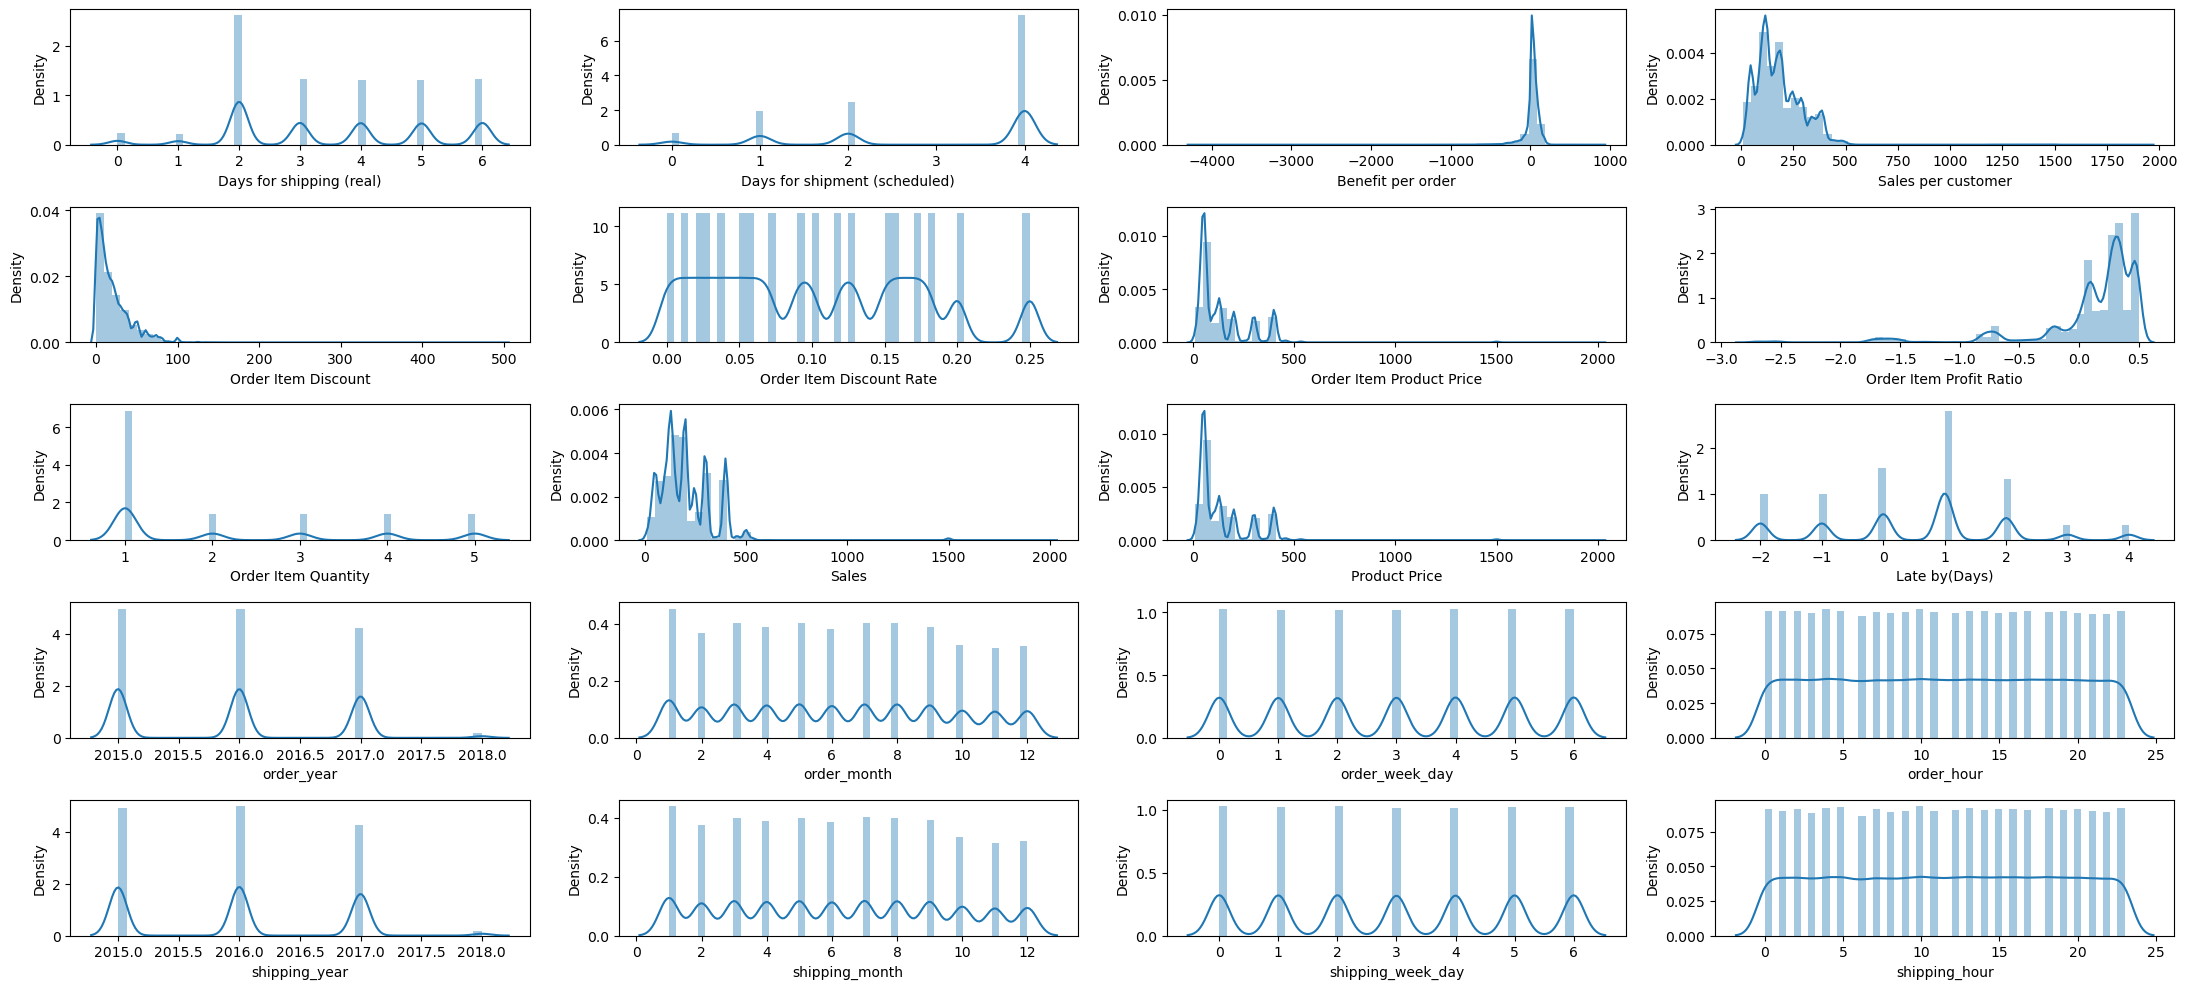

In [52]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df1.select_dtypes(exclude='object').columns,range(1,21)):
            plt.subplot(5,4,j)
            sns.distplot(df1[i])
plt.tight_layout()
plt.show()

In [53]:
len(df1.select_dtypes(exclude='object').columns)

20

In [54]:
df1.head(2)


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

    Category Name Source City Source Country Customer Segment Source State  \
0  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   
1  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   

  Department Name Destination Market Destination City Destination Country  \
0         Fitness       Pacific Asia           Bekasi           Indonesia   
1         Fitness       Pacific Asia          Bikaner               India   

  order date (DateOrders)  Order Item Discount  Order Item Discount Rate  \
0         1/31/2018 22:56            13.110000                      0.04   
1         1/13/2018 12:27            16.389999                      0.05   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales Destination Region Destination State Order Status  Product Name  \
0  327.75     Southeast Asia   Java Occidental     COMPLETE  Smart watch    
1  327.75         South Asia          Rajastán      PENDING  Smart watch    

   Product Price shipping date (DateOrders)   Shipping Mode  \
0         327.75           02-03-2018 22:56  Standard Class   
1         327.75            1/18/2018 12:27  Standard Class   

  customer full name  Late by(Days)  order_year  order_month  order_week_day  \
0      CallyHolloway             -1        2018            1               2   
1          IreneLuna              1        2018            1               5   

   order_hour  shipping_year  shipping_month  shipping_week_day  shipping_hour  
0          22           2018               2                  5             22  
1          12           2018               1                  3             12

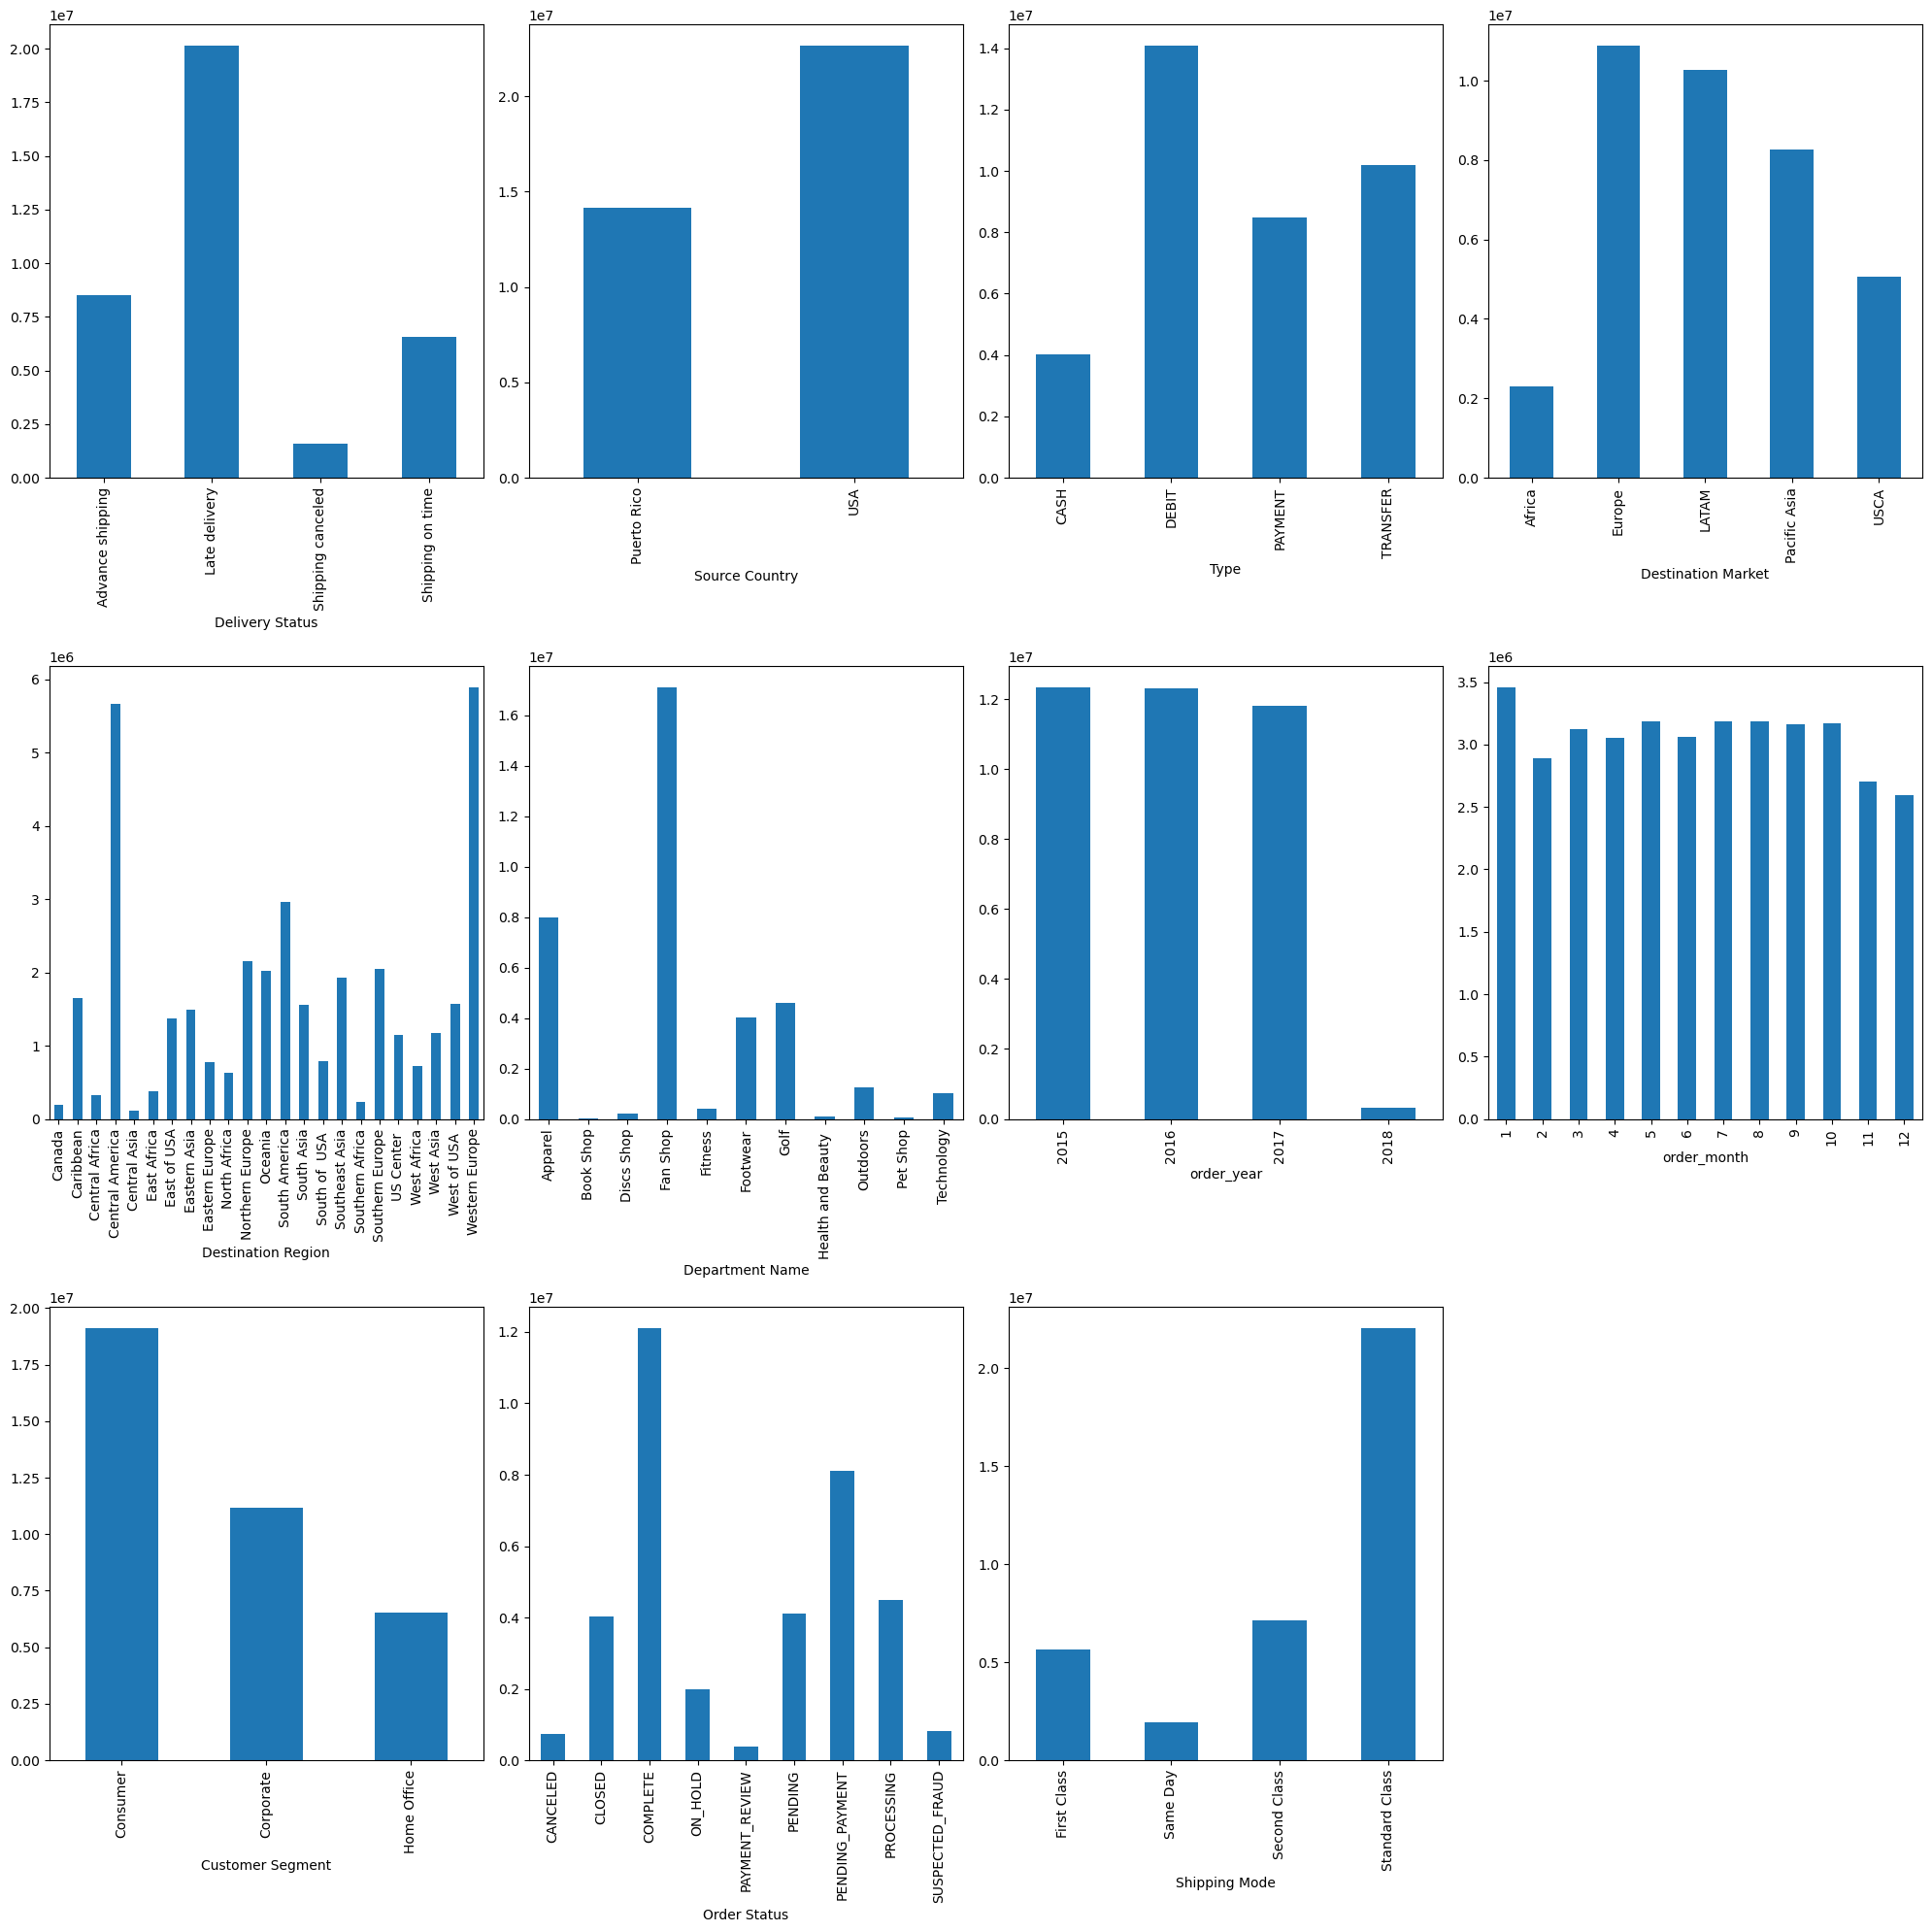

In [55]:
plt.rcParams['figure.figsize']=[20,20]
l=df1[['Delivery Status','Source Country','Type','Destination Market','Destination Region','Department Name','order_year','order_month','Customer Segment',
  'Order Status','Shipping Mode']]
for i,j in zip(l,range(1,12)):
    plt.subplot(3,4,j)
    df1.groupby(i)['Sales'].sum().plot(kind='bar')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

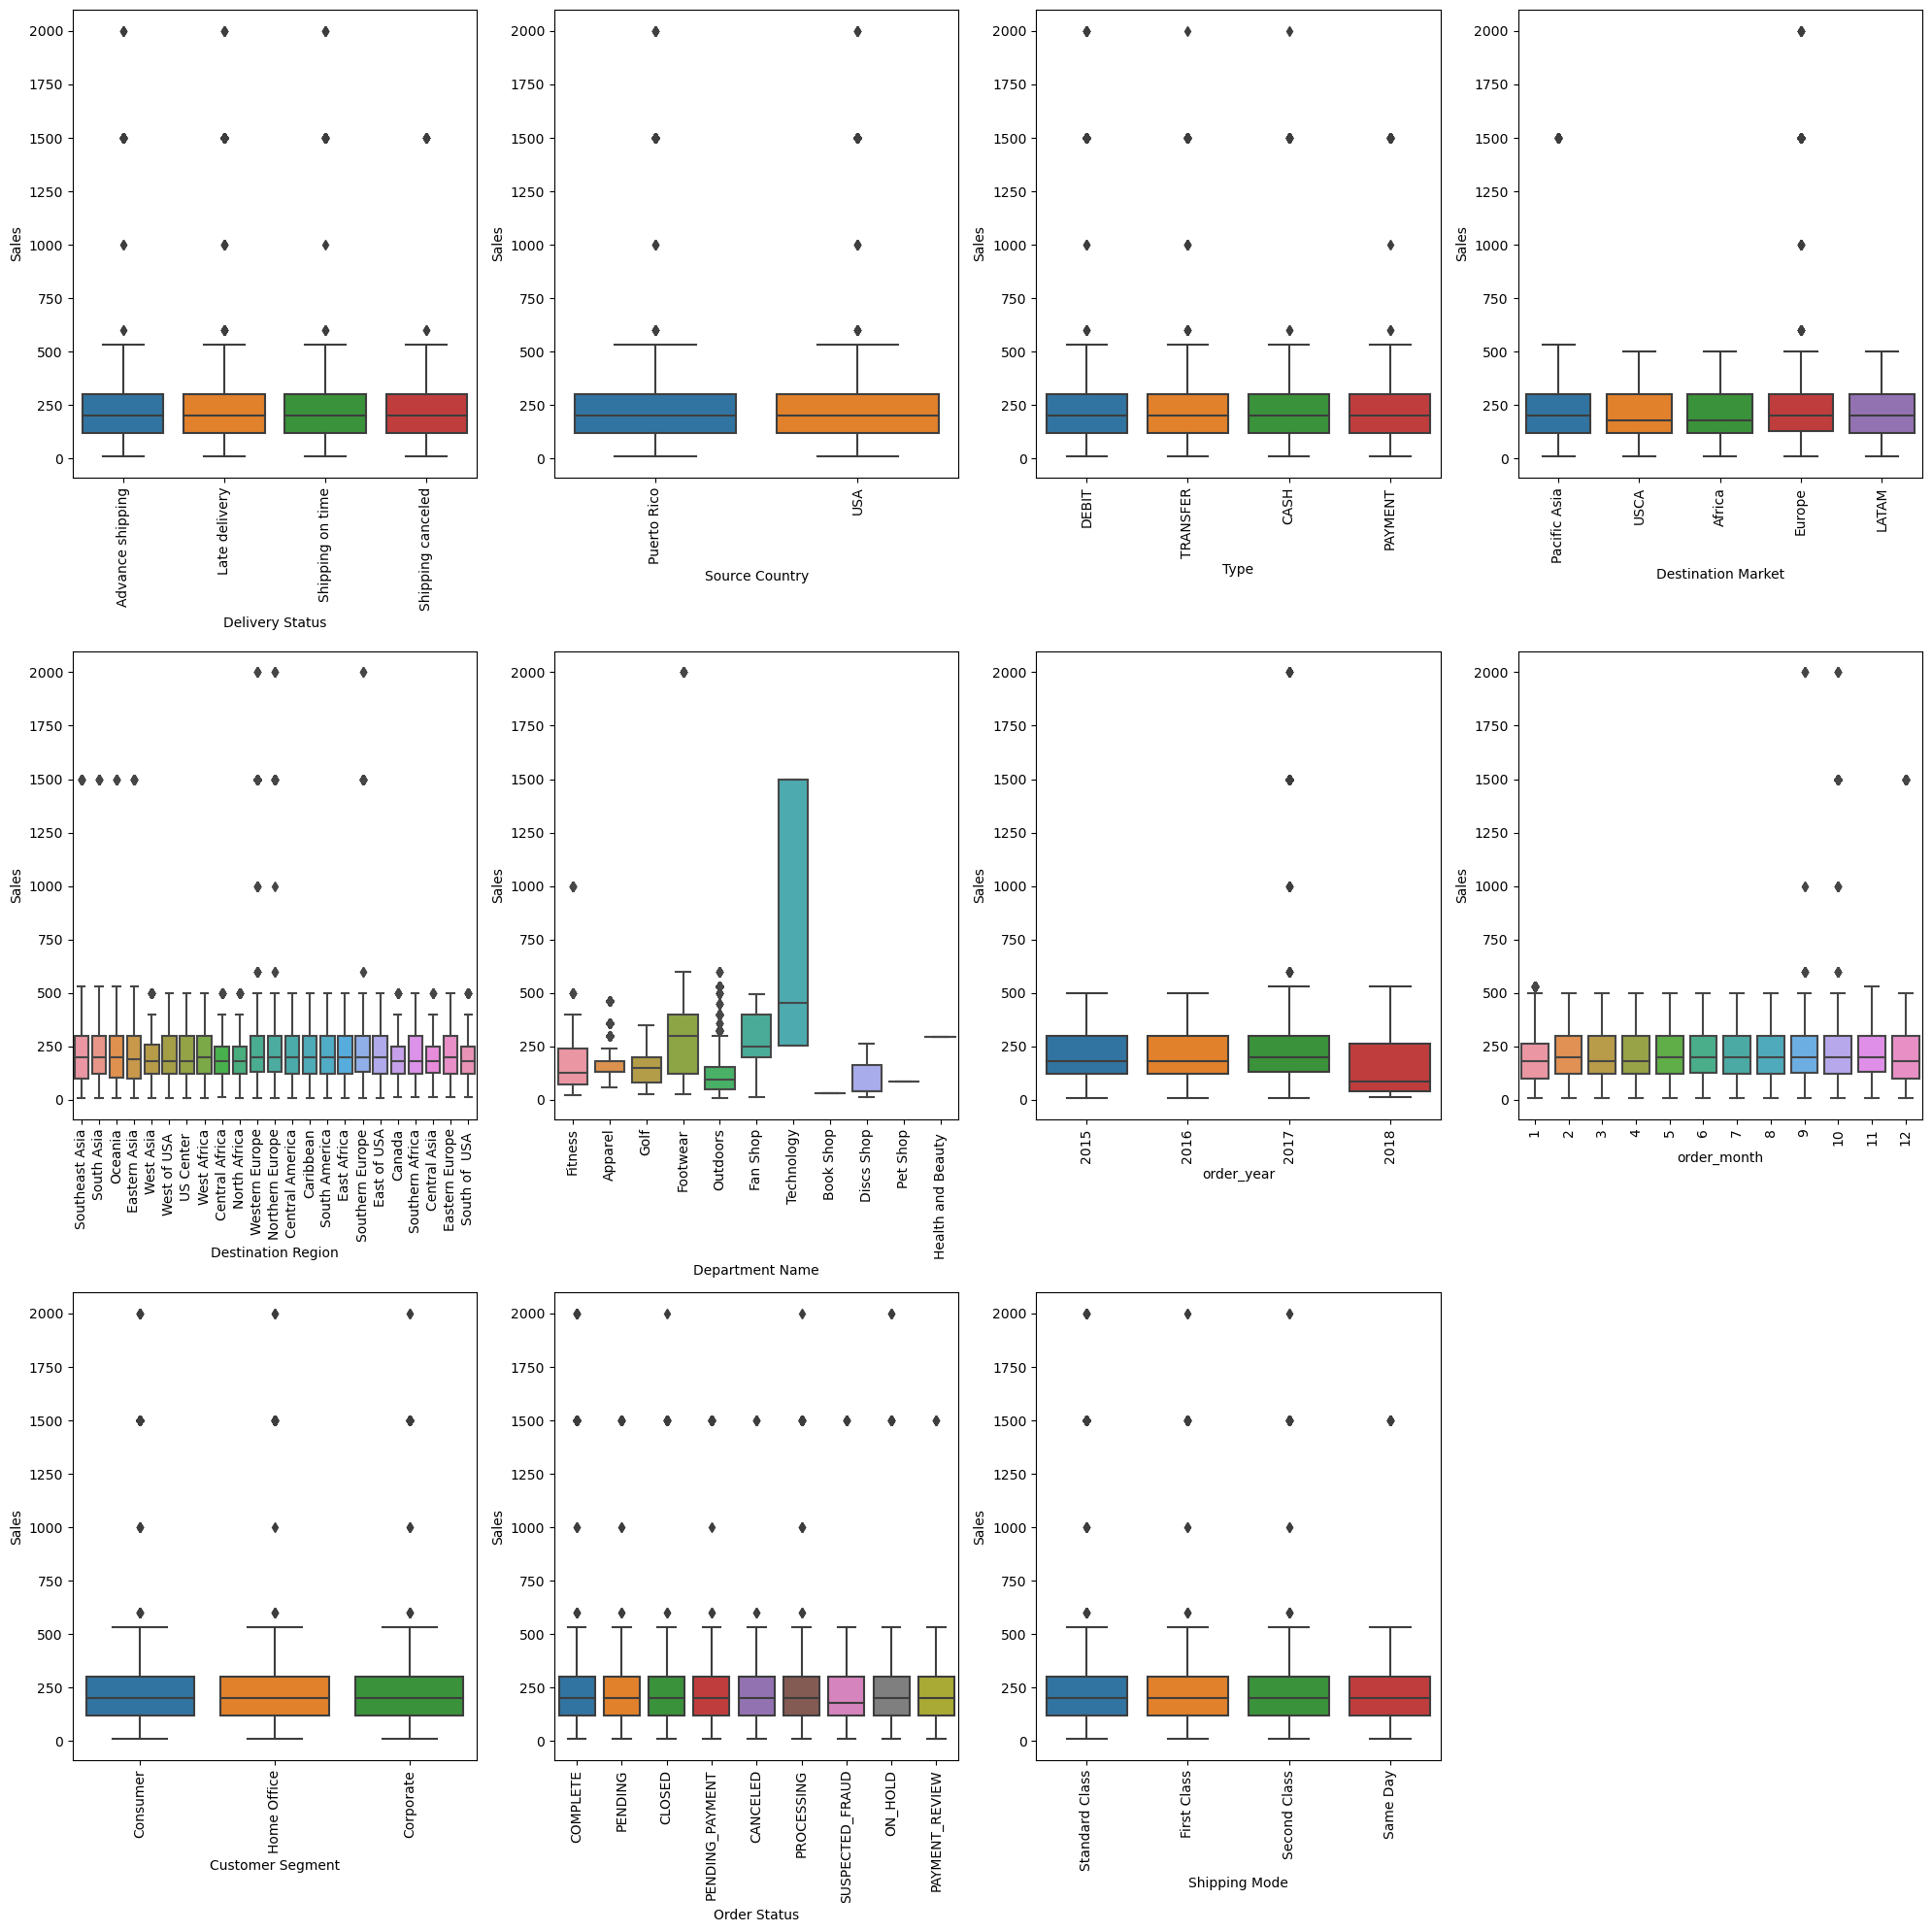

In [56]:
plt.rcParams['figure.figsize']=[20,20]
l=df1[['Delivery Status','Source Country','Type','Destination Market','Destination Region','Department Name','order_year','order_month','Customer Segment',
  'Order Status','Shipping Mode']]
for i,j in zip(l,range(1,12)):
    plt.subplot(3,4,j)
    #df.groupby(i)['Sales'].sum().plot(kind='box')
    sns.boxplot(x=df1[i],y=df1['Sales'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [57]:
df1['Late_delivery_risk'].value_counts(normalize=True)*100

1    54.829346
0    45.170654
Name: Late_delivery_risk, dtype: float64

In [58]:
# we can see that 45 percent are not delivered late and
# we can also see that 55 percent are delivered late

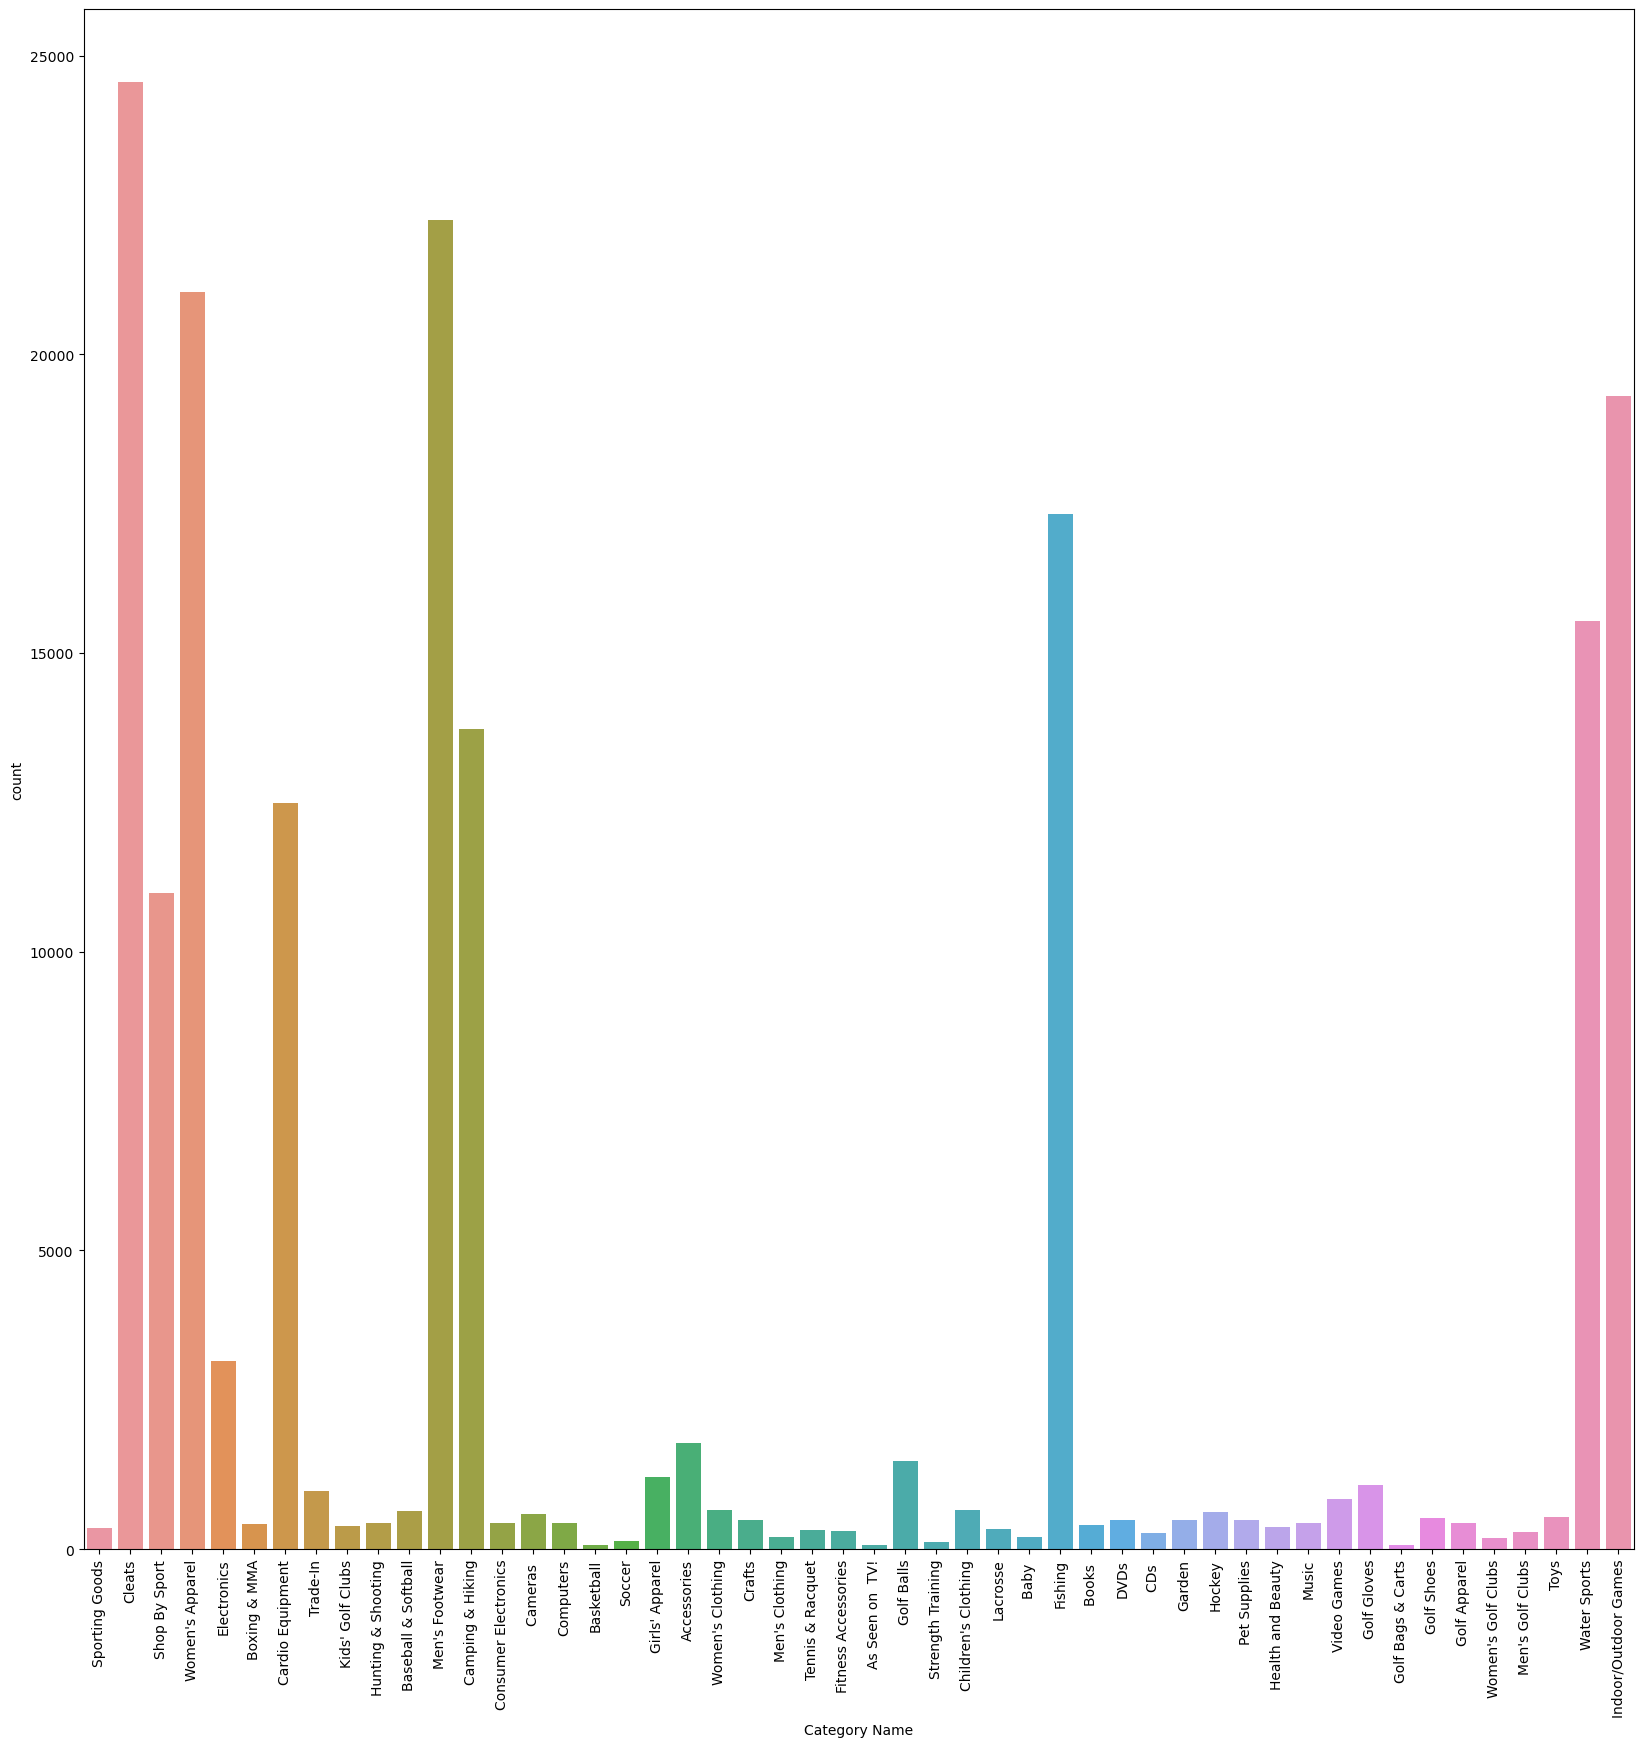

In [59]:
sns.countplot(x=df1['Category Name'])
plt.xticks(rotation=90)
plt.show()

In [60]:
df1['Category Name'].value_counts(normalize=True)*100

Cleats                  13.600833
Men's Footwear          12.323903
Women's Apparel         11.653029
Indoor/Outdoor Games    10.690761
Fishing                  9.597753
Water Sports             8.608894
Camping & Hiking         7.605631
Cardio Equipment         6.917584
Shop By Sport            6.084948
Electronics              1.748370
Accessories              0.986089
Golf Balls               0.817125
Girls' Apparel           0.665333
Golf Gloves              0.592762
Trade-In                 0.539579
Video Games              0.464238
Children's Clothing      0.360089
Women's Clothing         0.358981
Baseball & Softball      0.350117
Hockey                   0.340145
Cameras                  0.327958
Toys                     0.293057
Golf Shoes               0.290287
Pet Supplies             0.272560
Garden                   0.268128
DVDs                     0.267574
Crafts                   0.266466
Computers                0.244860
Golf Apparel             0.244306
Hunting & Shoo

In [61]:
# Cleats is the most shipped category of product followed by Mens footwere , womens Apparel and Indoor/outdoor games

In [62]:
df1['Source City'].value_counts(normalize=True)*100

Caguas         36.988328
Chicago         2.152223
Los Angeles     1.892405
Brooklyn        1.890190
New York        1.006033
                 ...    
Bartlett        0.013850
Malden          0.012188
Ponce           0.012188
Freehold        0.007202
CA              0.001662
Name: Source City, Length: 563, dtype: float64

In [63]:
df1['Source City'].nunique() # there are total 563 unique cities

563

In [64]:
pd.set_option('display.max_rows',None)
df1['Source Country'].nunique

<bound method IndexOpsMixin.nunique of 0         Puerto Rico
1         Puerto Rico
2                 USA
3                 USA
4         Puerto Rico
5                 USA
6         Puerto Rico
7                 USA
8         Puerto Rico
9                 USA
10        Puerto Rico
11                USA
12                USA
13        Puerto Rico
14                USA
15        Puerto Rico
16        Puerto Rico
17                USA
18        Puerto Rico
19                USA
20                USA
21        Puerto Rico
22                USA
23        Puerto Rico
24                USA
25        Puerto Rico
26                USA
27        Puerto Rico
28                USA
29                USA
30        Puerto Rico
31                USA
32        Puerto Rico
33                USA
34                USA
35        Puerto Rico
36                USA
37                USA
38        Puerto Rico
39                USA
40                USA
41        Puerto Rico
42                USA
43        Puert

In [65]:
df1['Source Country'].replace('EE. UU.','USA',inplace=True)

In [66]:
# It seems like 'EE. UU.' is an abbreviation for "Estados Unidos" (United States in Spanish).
#Therefore, the code is replacing the abbreviation 'EE. UU.'
#with the standard English abbreviation 'USA' to ensure consistency or standardization in the column.

In [67]:
df1['Source Country'].value_counts(normalize=True)*100

USA            61.569655
Puerto Rico    38.430345
Name: Source Country, dtype: float64

In [68]:
df1['Customer Segment'].value_counts(normalize=True)*100

Consumer       51.799059
Corporate      30.349951
Home Office    17.850990
Name: Customer Segment, dtype: float64

In [69]:
df1['Source State'].value_counts(normalize=True)*100

PR       38.430345
CA       16.187933
NY        6.274964
TX        5.042352
IL        4.226889
FL        3.022530
OH        2.268560
PA        2.118430
MI        2.107351
NJ        1.767759
AZ        1.676352
GA        1.386619
MD        1.337869
NC        1.102980
CO        1.060323
VA        1.024314
OR        0.924043
MA        0.890250
TN        0.876401
NV        0.797735
MO        0.750093
HI        0.690817
CT        0.606057
UT        0.536255
NM        0.525730
LA        0.525176
WA        0.509664
WI        0.470885
MN        0.372276
SC        0.368399
IN        0.321864
DC        0.320756
KY        0.269790
KS        0.253724
DE        0.149021
RI        0.134618
WV        0.133510
OK        0.128524
ND        0.119106
ID        0.092515
AR        0.090853
MT        0.048197
IA        0.037117
AL        0.019389
95758     0.001108
91732     0.000554
Name: Source State, dtype: float64

In [70]:
df1['Source State'].nunique()

46

In [71]:
df1['Department Name'].nunique()

11

In [72]:
df1['Destination Market'].nunique()

5

<AxesSubplot:xlabel='Destination Market', ylabel='count'>

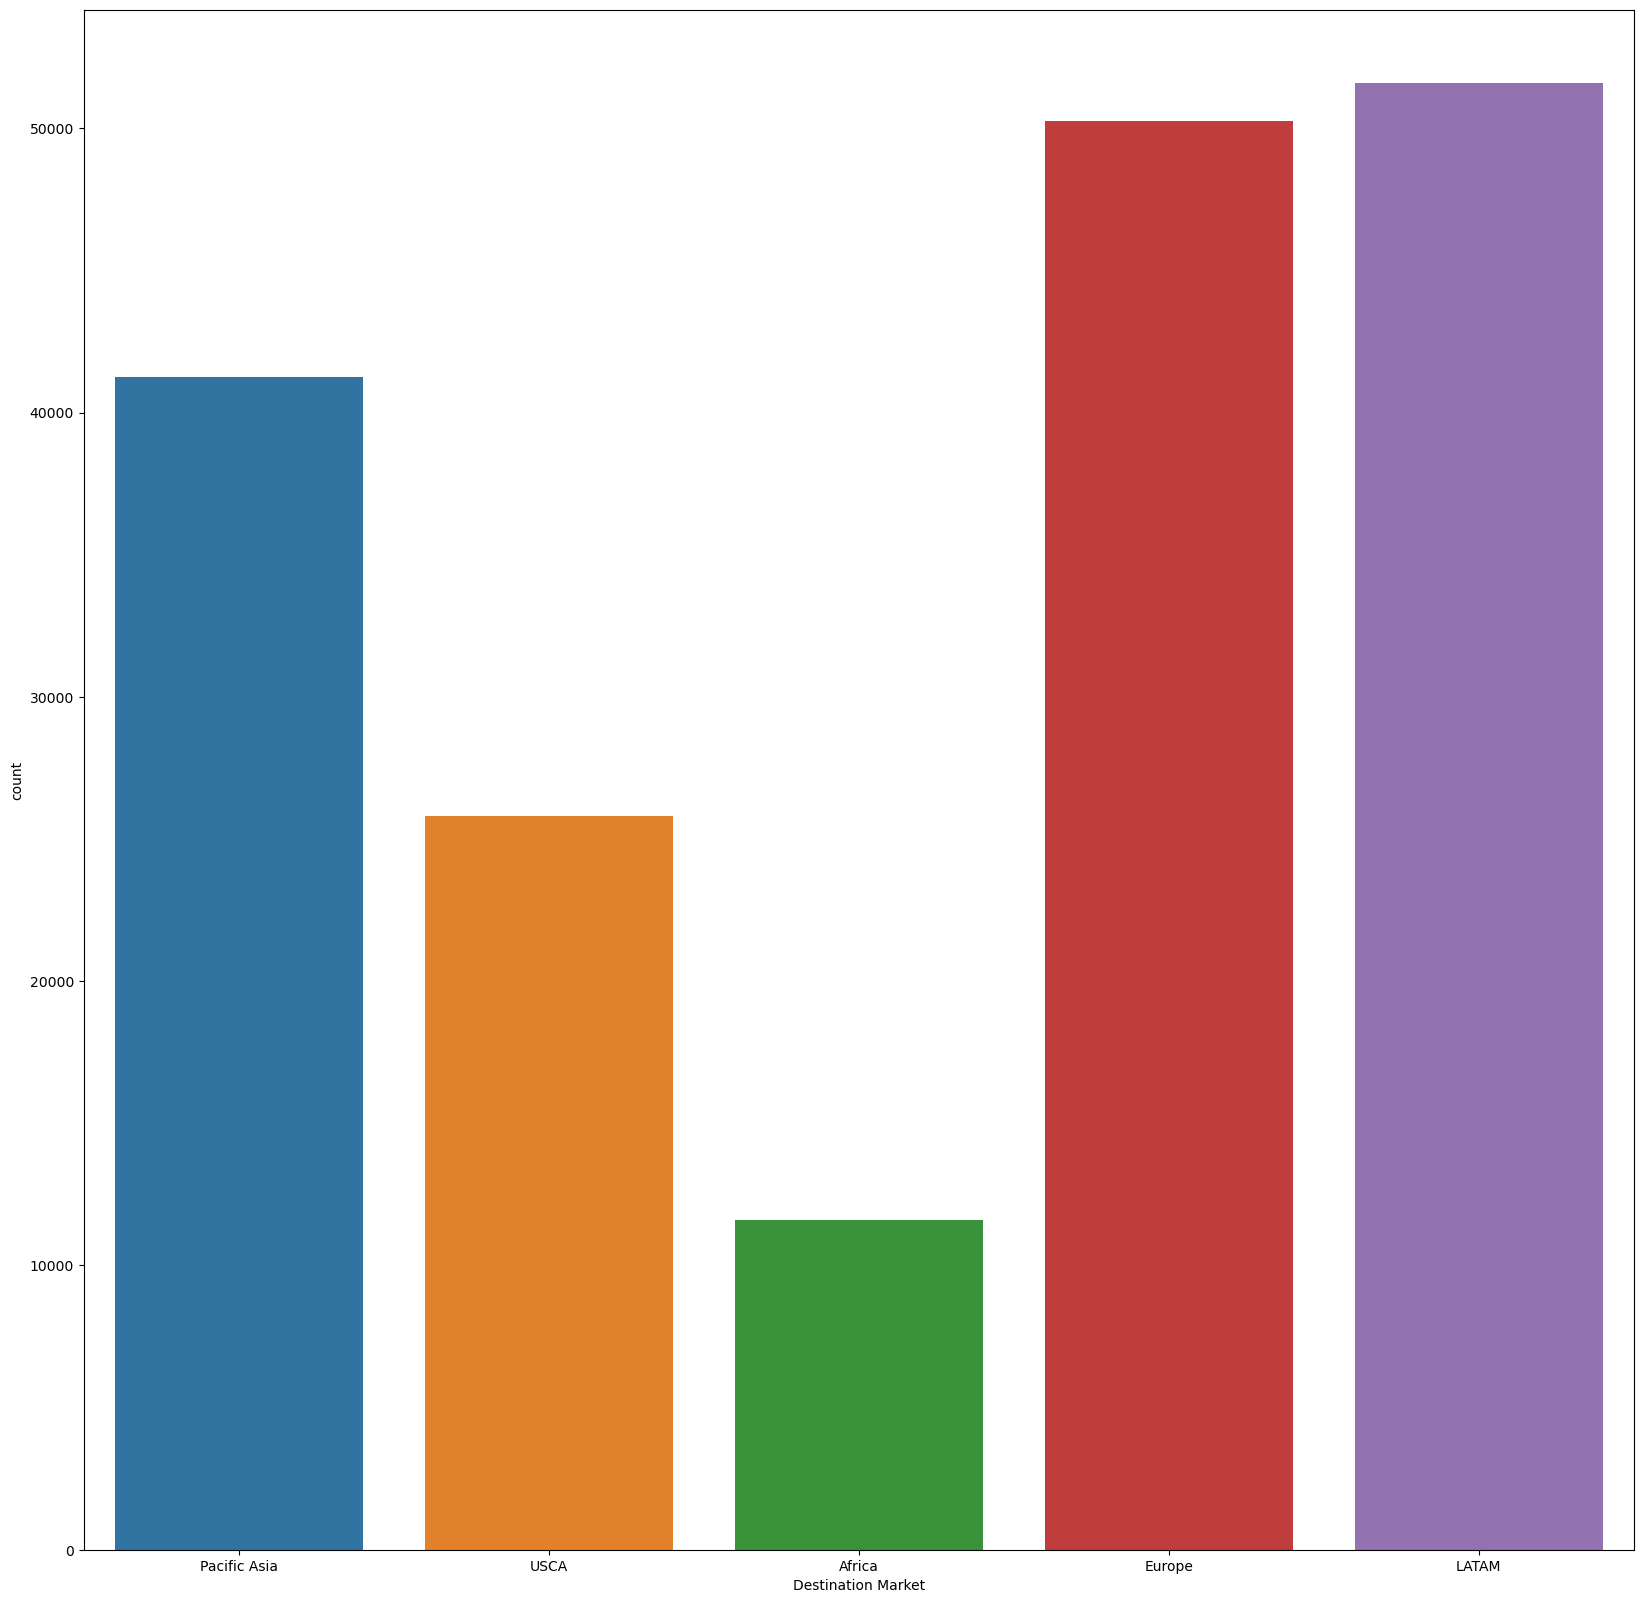

In [73]:
sns.countplot(x=df1['Destination Market'])

In [74]:
df1['Destination City'].nunique()

3597

In [75]:
(df1['Destination City'].value_counts(normalize=True)*100).head(10)

Santo Domingo    1.224856
New York City    1.219870
Los Angeles      1.022098
Tegucigalpa      0.987751
Managua          0.931799
Mexico City      0.822111
Manila           0.764496
Philadelphia     0.721286
San Francisco    0.718516
London           0.657578
Name: Destination City, dtype: float64

<AxesSubplot:xlabel='Order Item Discount', ylabel='Density'>

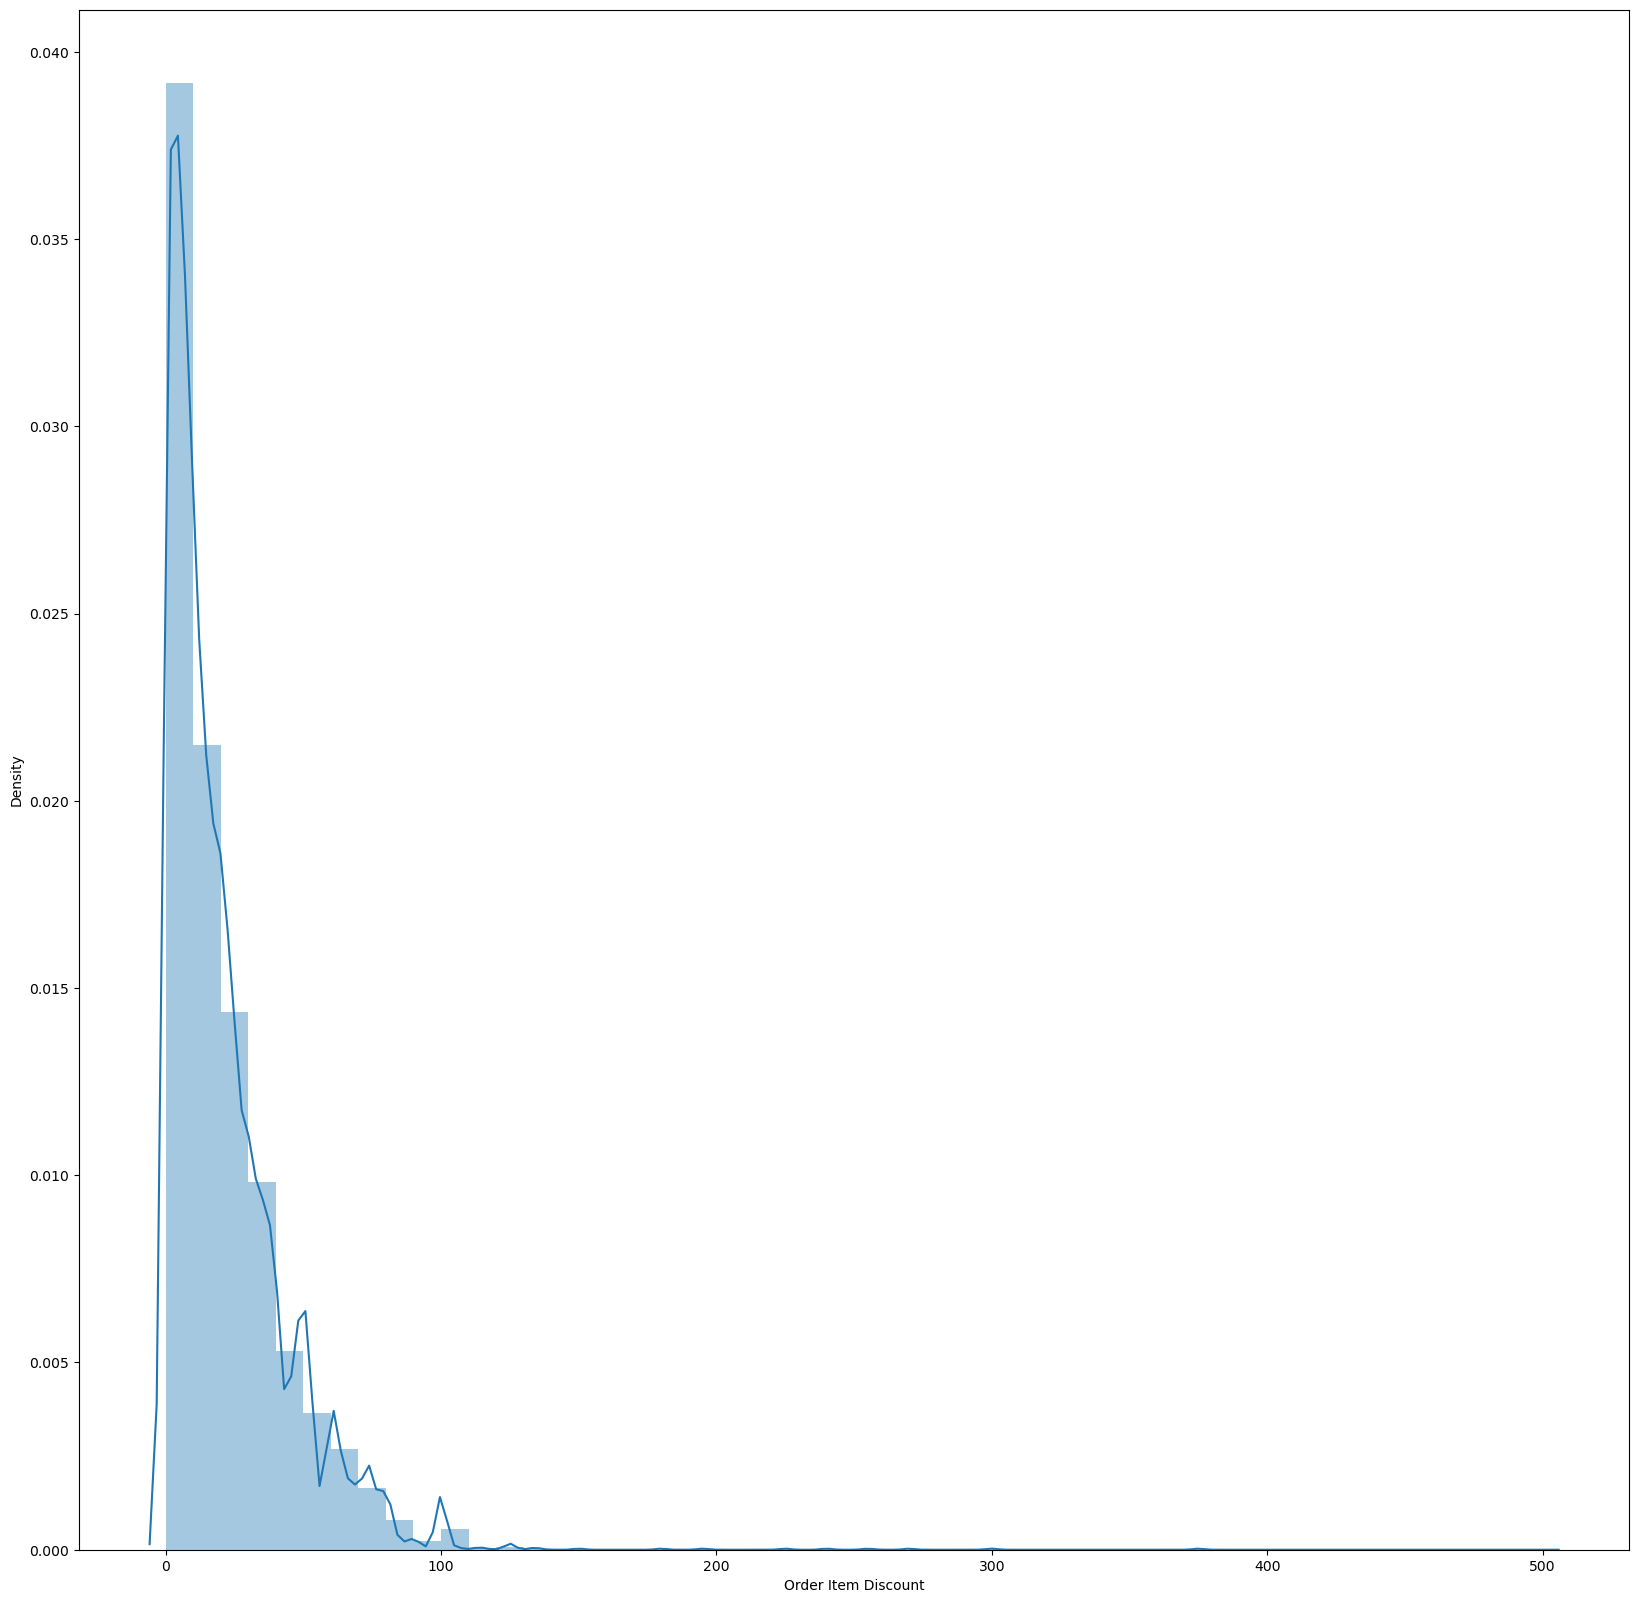

In [76]:
sns.distplot(df1['Order Item Discount'])

<AxesSubplot:xlabel='Order Item Discount Rate', ylabel='Density'>

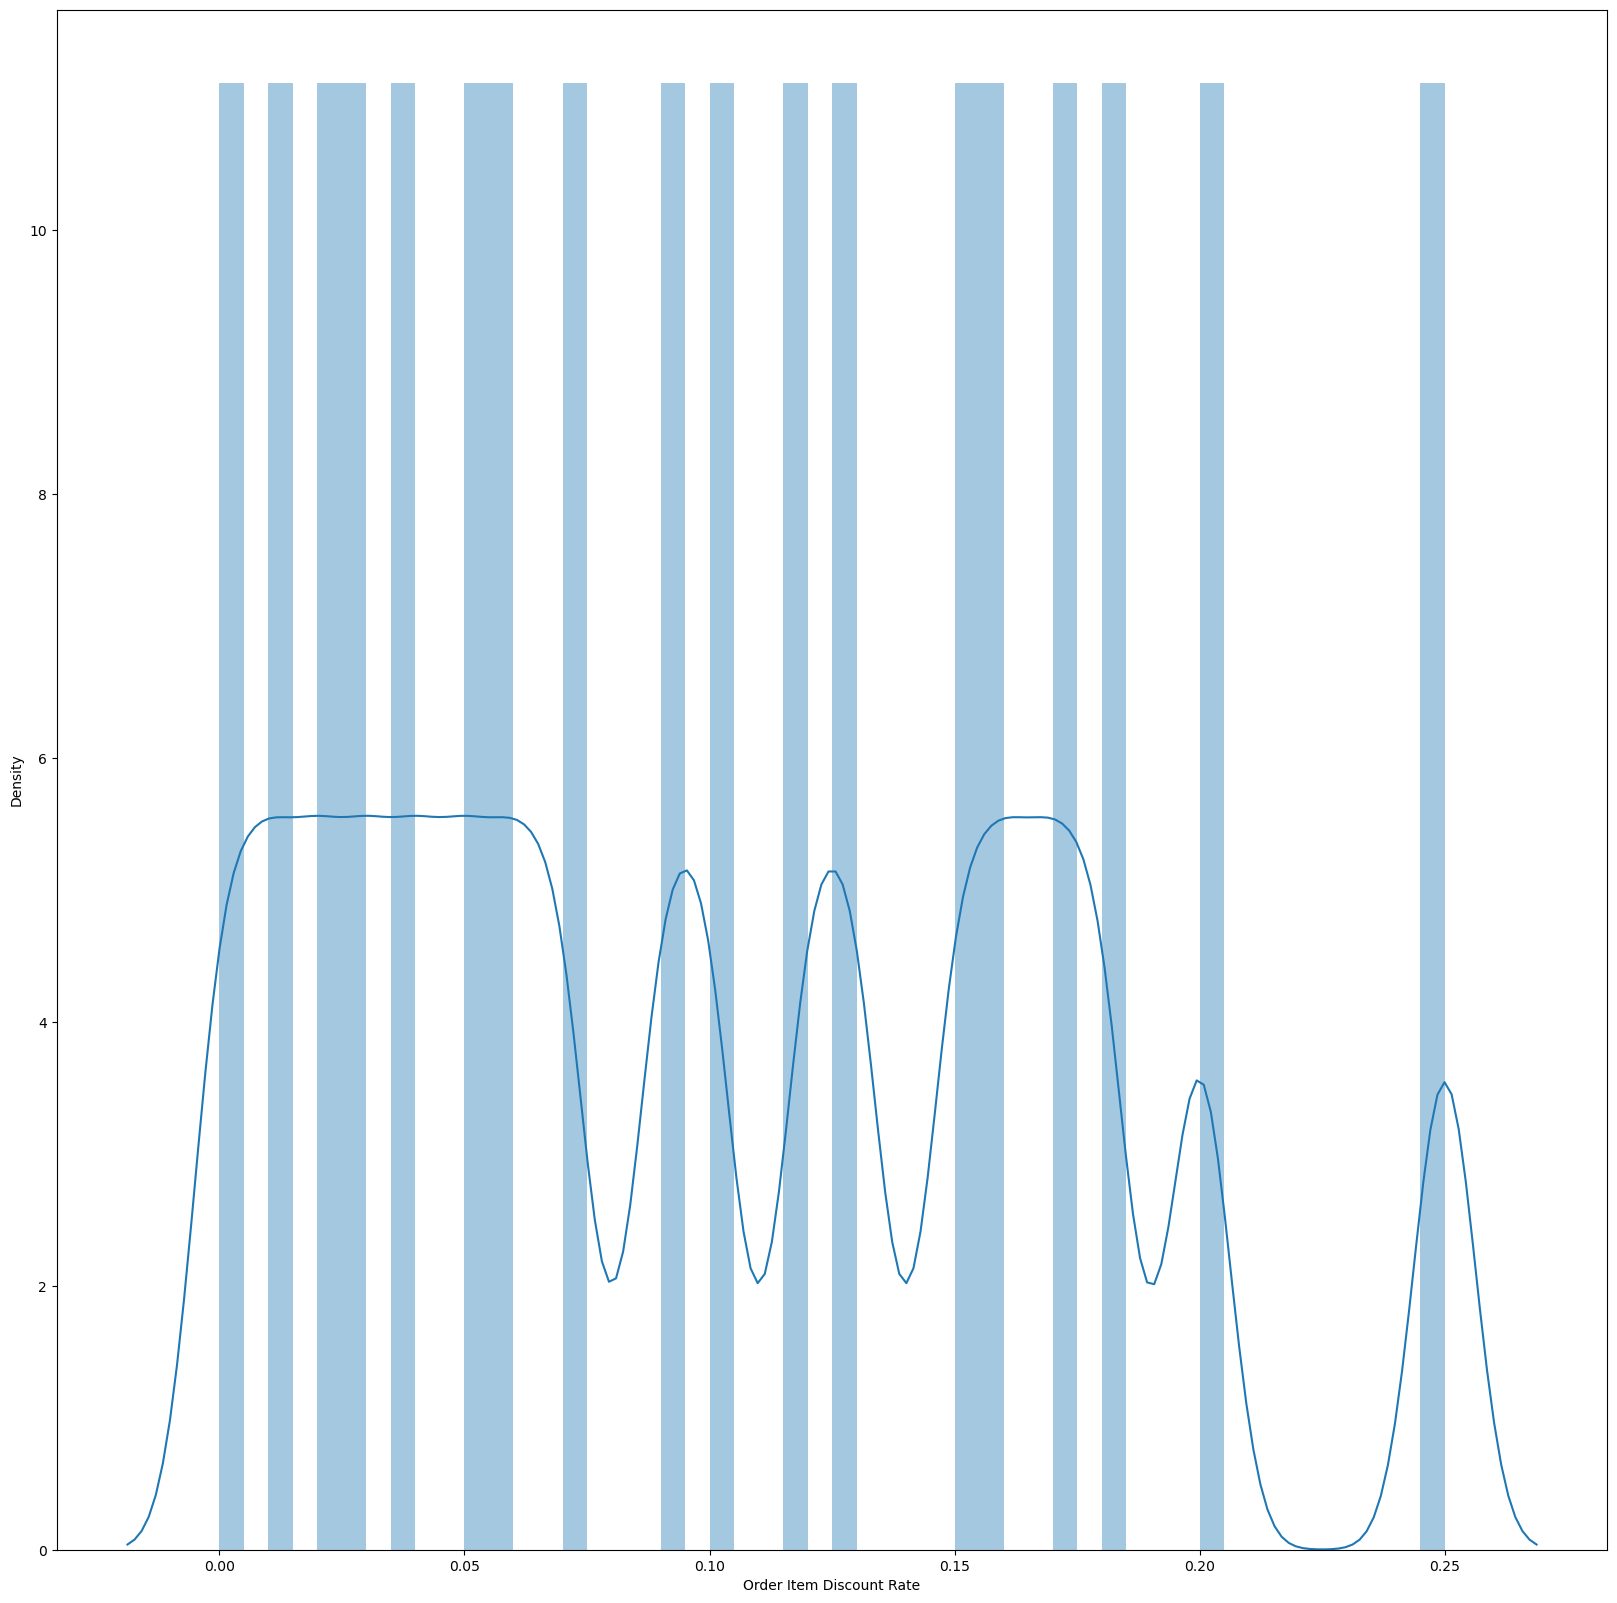

In [77]:
sns.distplot(df1['Order Item Discount Rate'])

<AxesSubplot:xlabel='Order Item Quantity', ylabel='Density'>

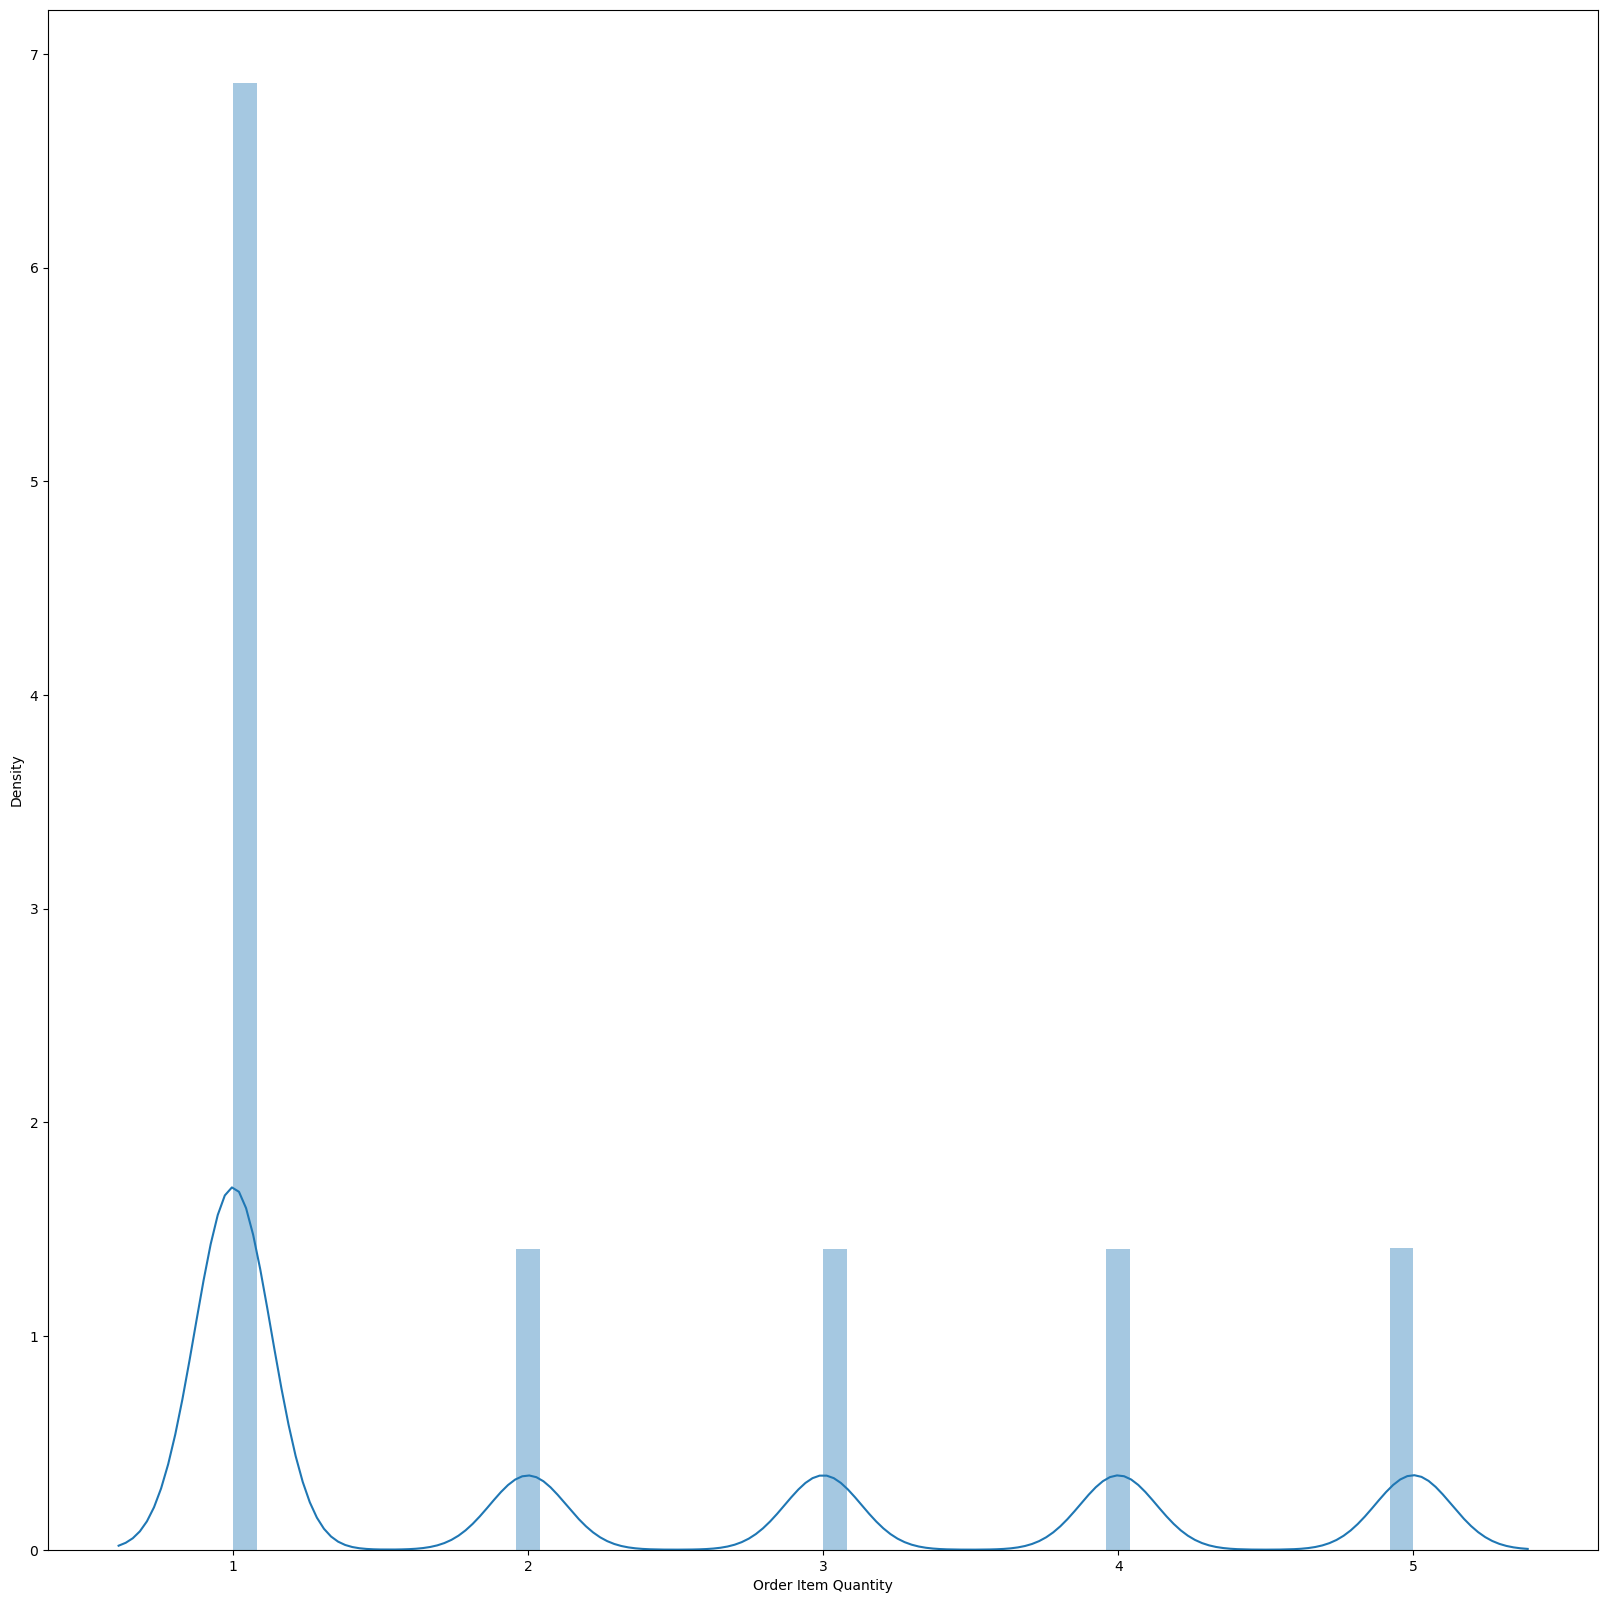

In [78]:
sns.distplot(df1['Order Item Quantity'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

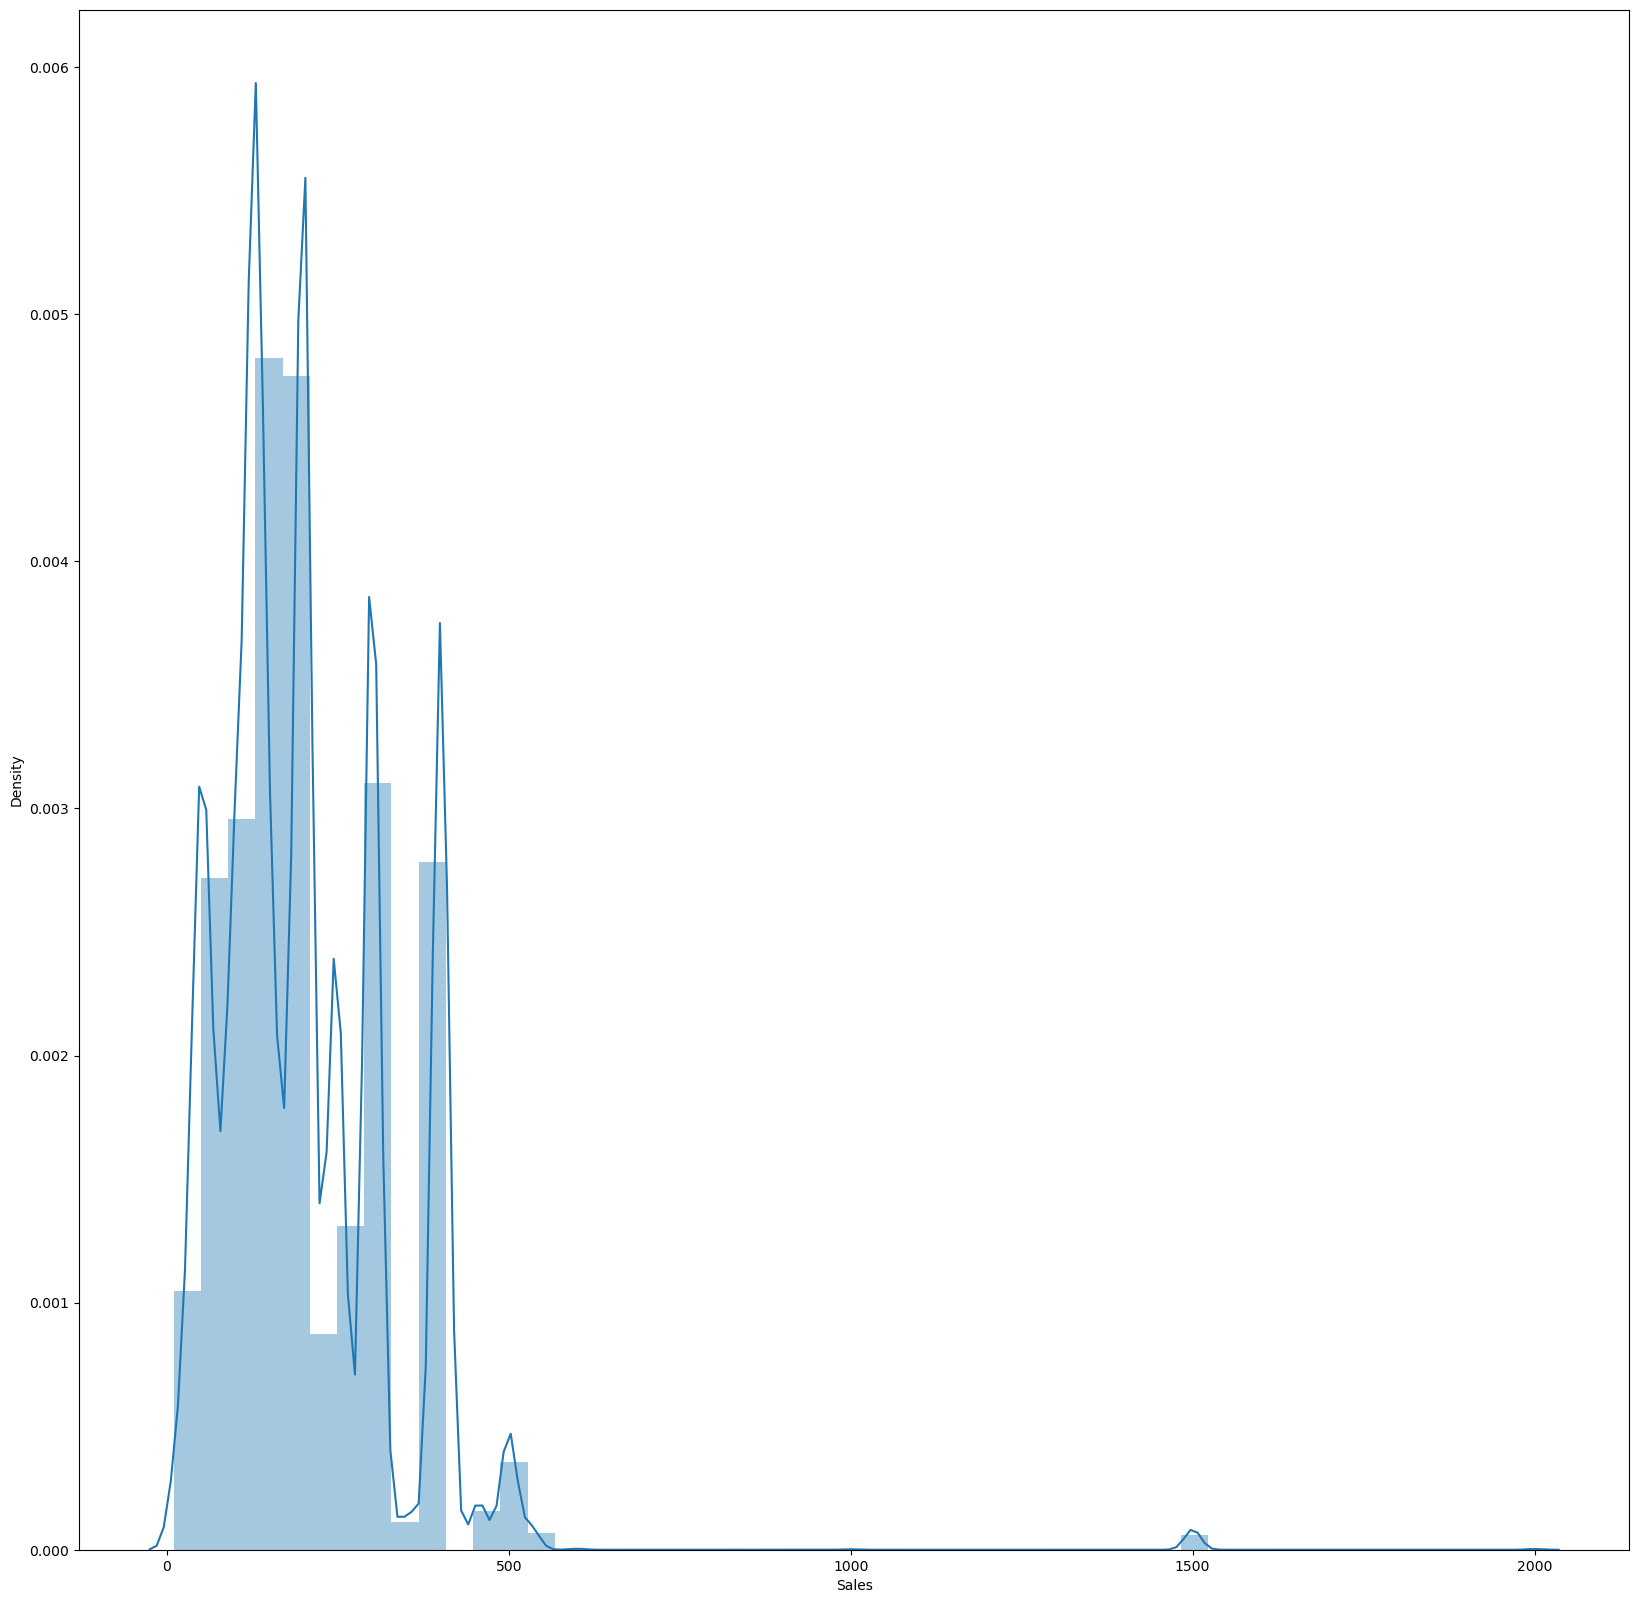

In [79]:
sns.distplot(df1['Sales'])

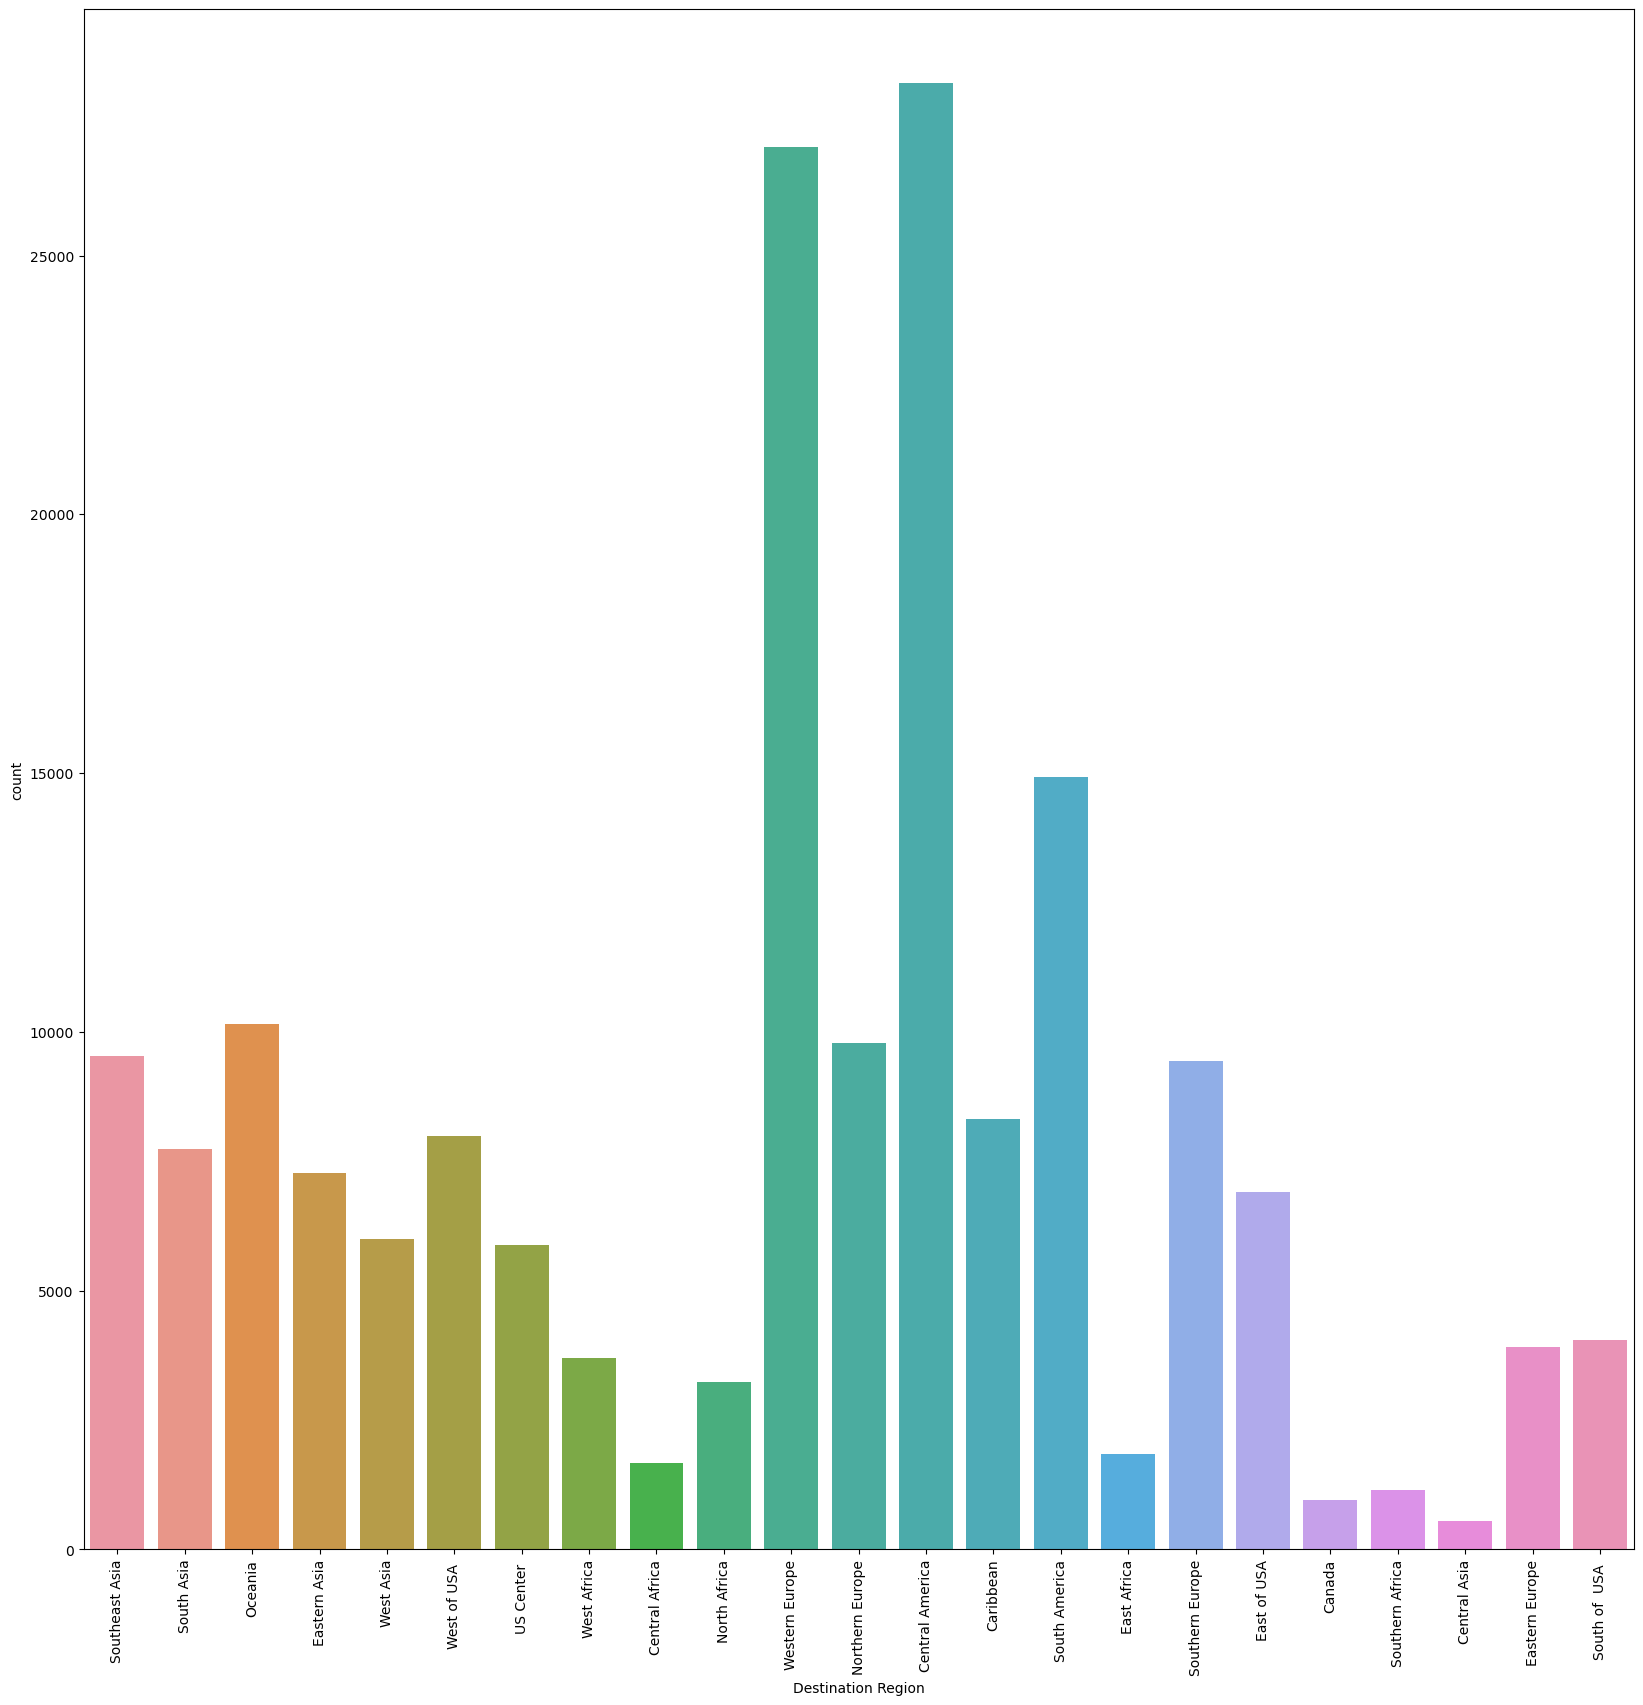

In [80]:
sns.countplot(x=df1['Destination Region'])
plt.xticks(rotation=90)
plt.show()

In [81]:
df1['Destination State'].nunique()

1089

In [82]:
(df1['Destination State'].value_counts(normalize=True)*100).head(10)

Inglaterra                     3.723873
California                     2.751079
Isla de Francia                2.537241
Renania del Norte-Westfalia    1.829251
San Salvador                   1.692418
Nueva York                     1.525115
Distrito Federal               1.417642
Texas                          1.355042
Nueva Gales del Sur            1.312939
Santo Domingo                  1.224856
Name: Destination State, dtype: float64

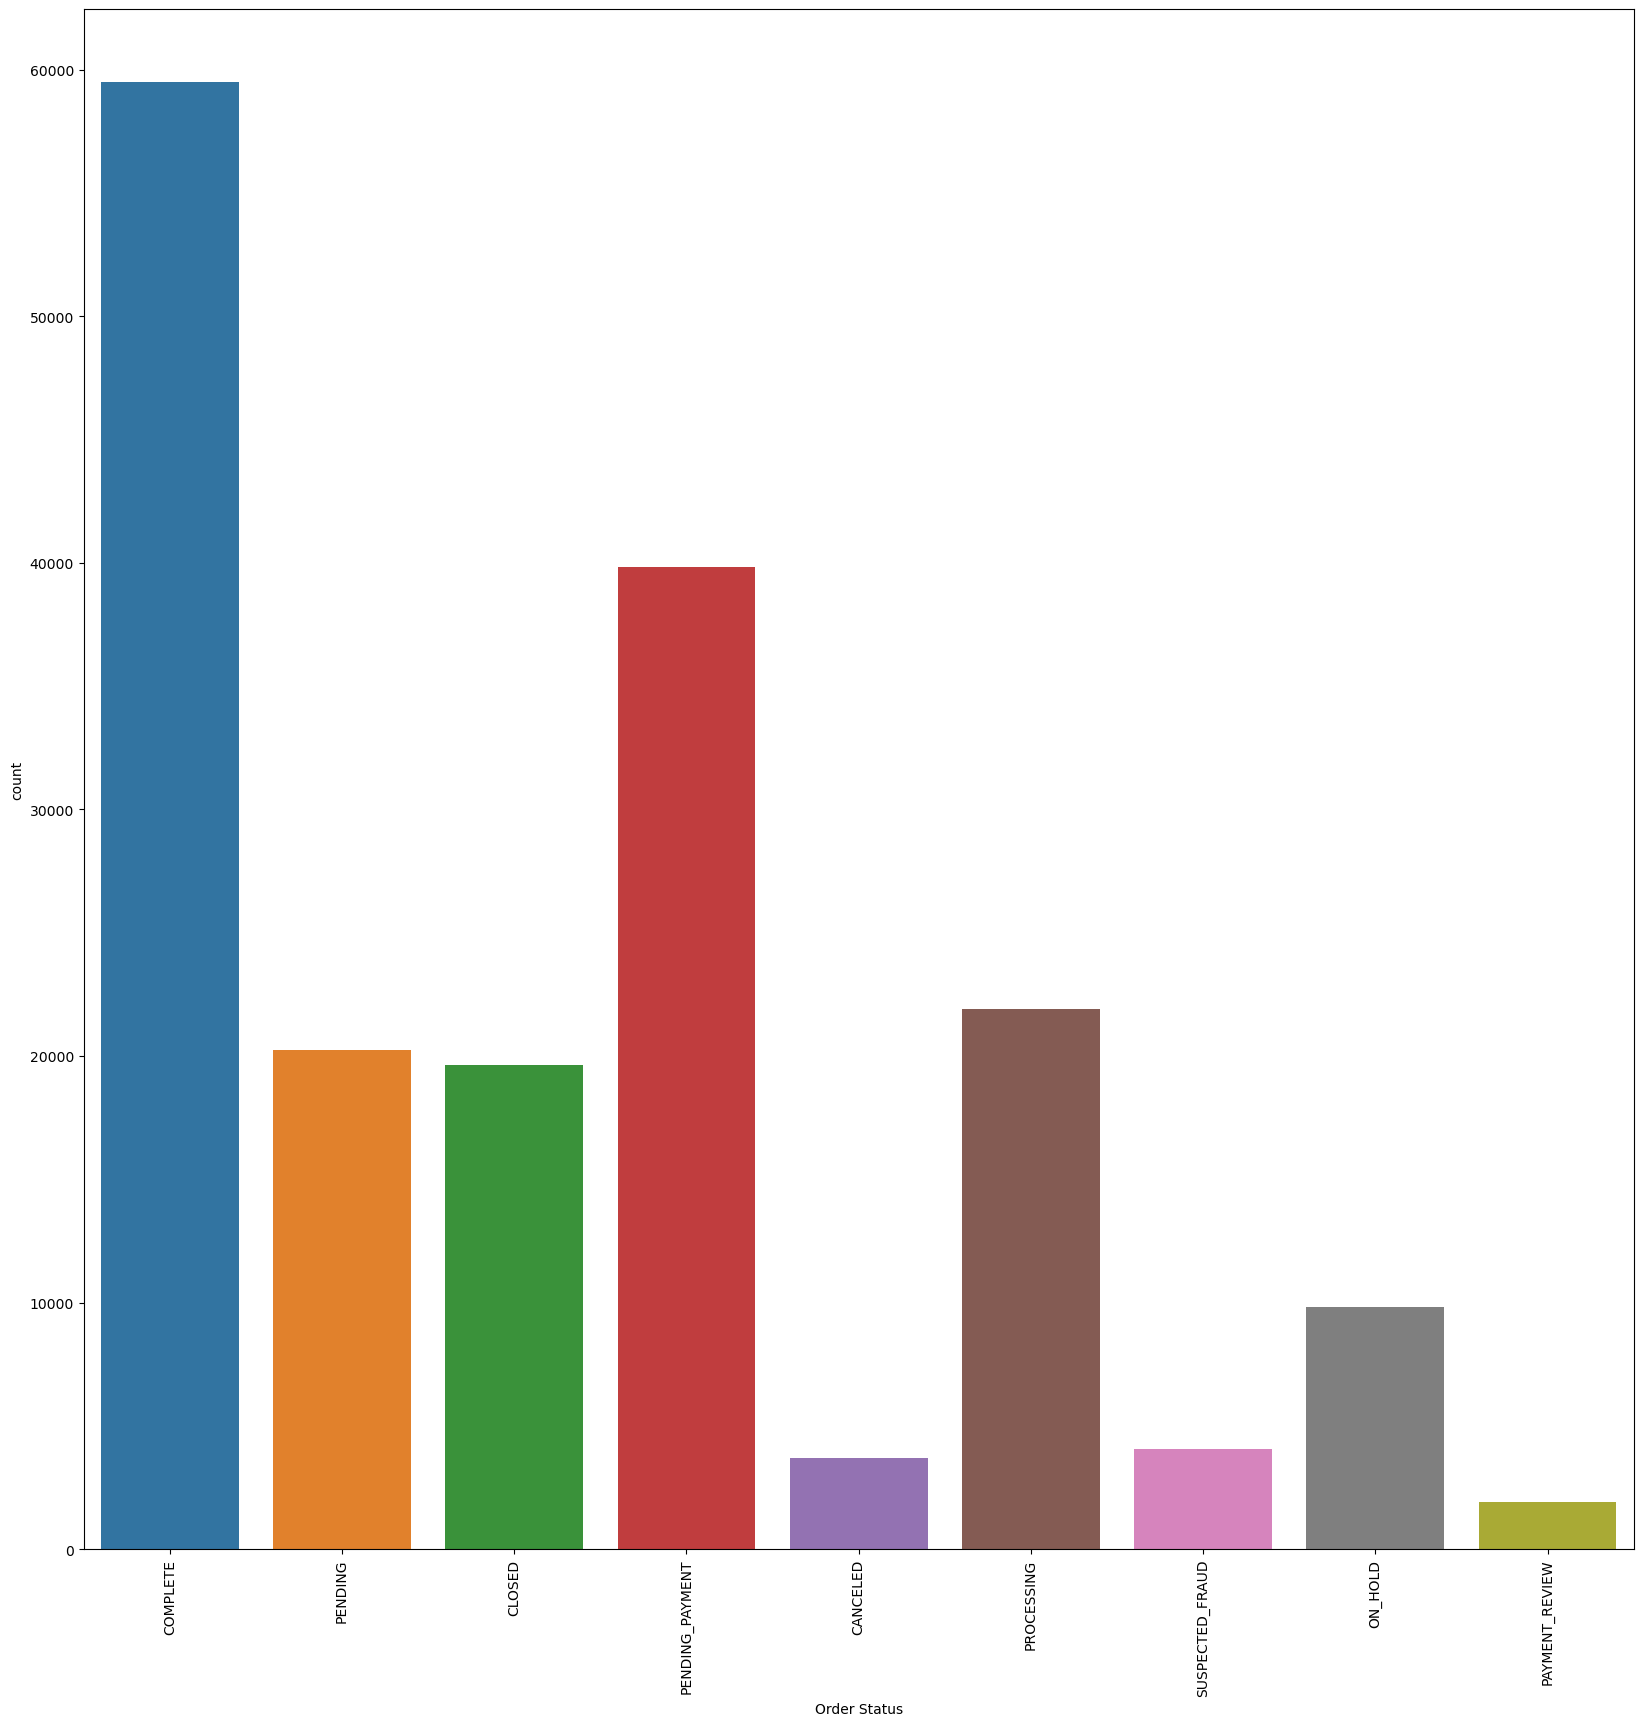

In [83]:
sns.countplot(x=df1['Order Status'])
plt.xticks(rotation=90)
plt.show()

In [84]:
df1['Product Name'].nunique()

118

In [85]:
(df['Product Name'].value_counts(normalize=True)*100).head(10)

Perfect Fitness Perfect Rip Deck                 13.580288
Nike Men's CJ Elite 2 TD Football Cleat          12.323357
Nike Men's Dri-FIT Victory Golf Polo             11.652513
O'Brien Men's Neoprene Life Vest                 10.690287
Field & Stream Sportsman 16 Gun Fire Safe         9.597328
Pelican Sunstream 100 Kayak                       8.586354
Diamondback Women's Serene Classic Comfort Bi     7.605294
Nike Men's Free 5.0+ Running Shoe                 6.741119
Under Armour Girls' Toddler Spine Surge Runni     5.881375
Fighting video games                              0.464217
Name: Product Name, dtype: float64

<AxesSubplot:ylabel='Density'>

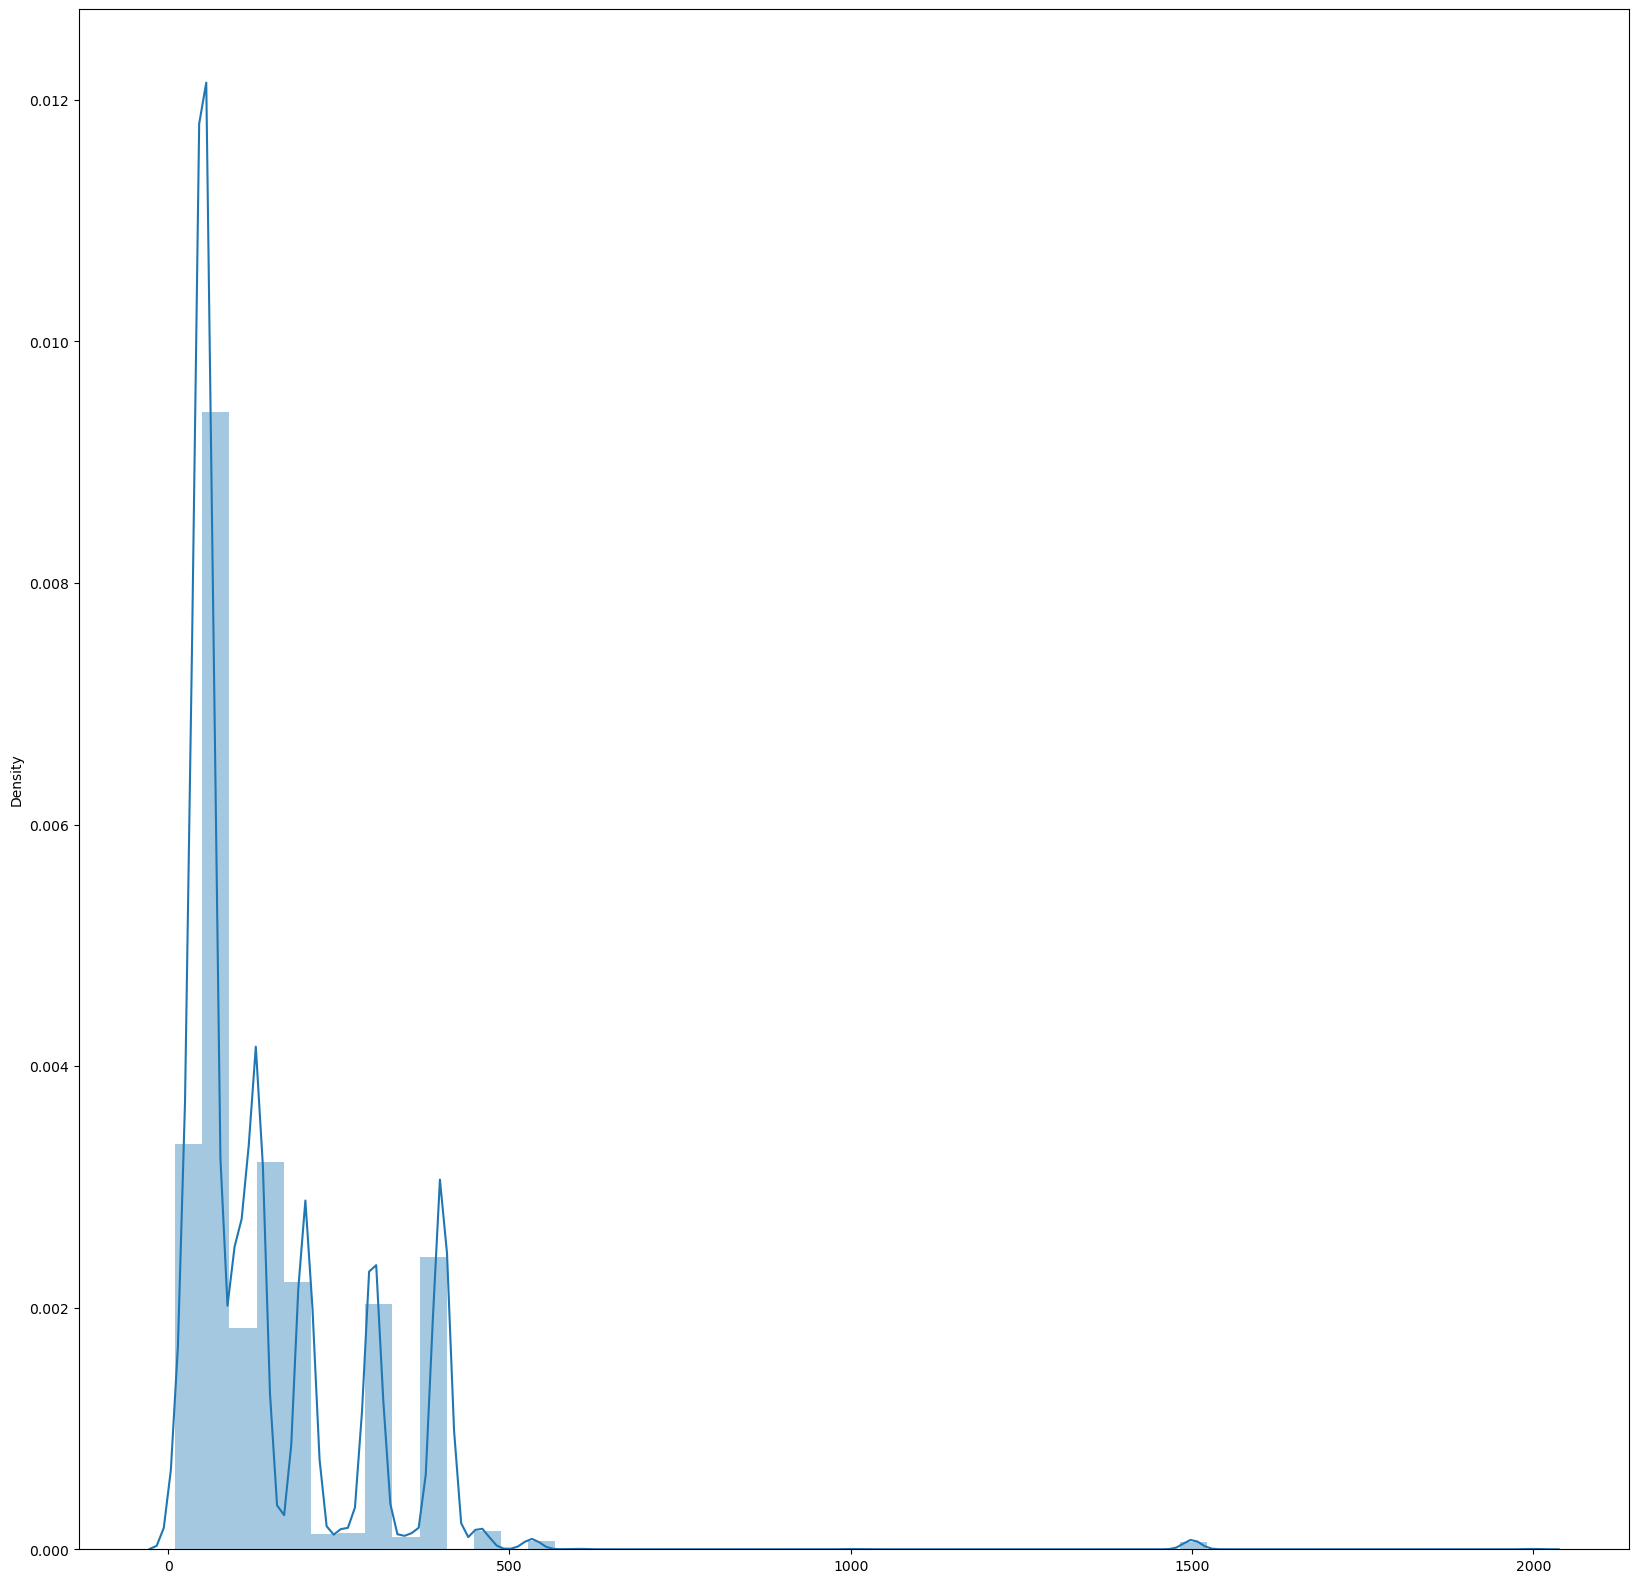

In [86]:
sns.distplot(x=df1['Product Price'])

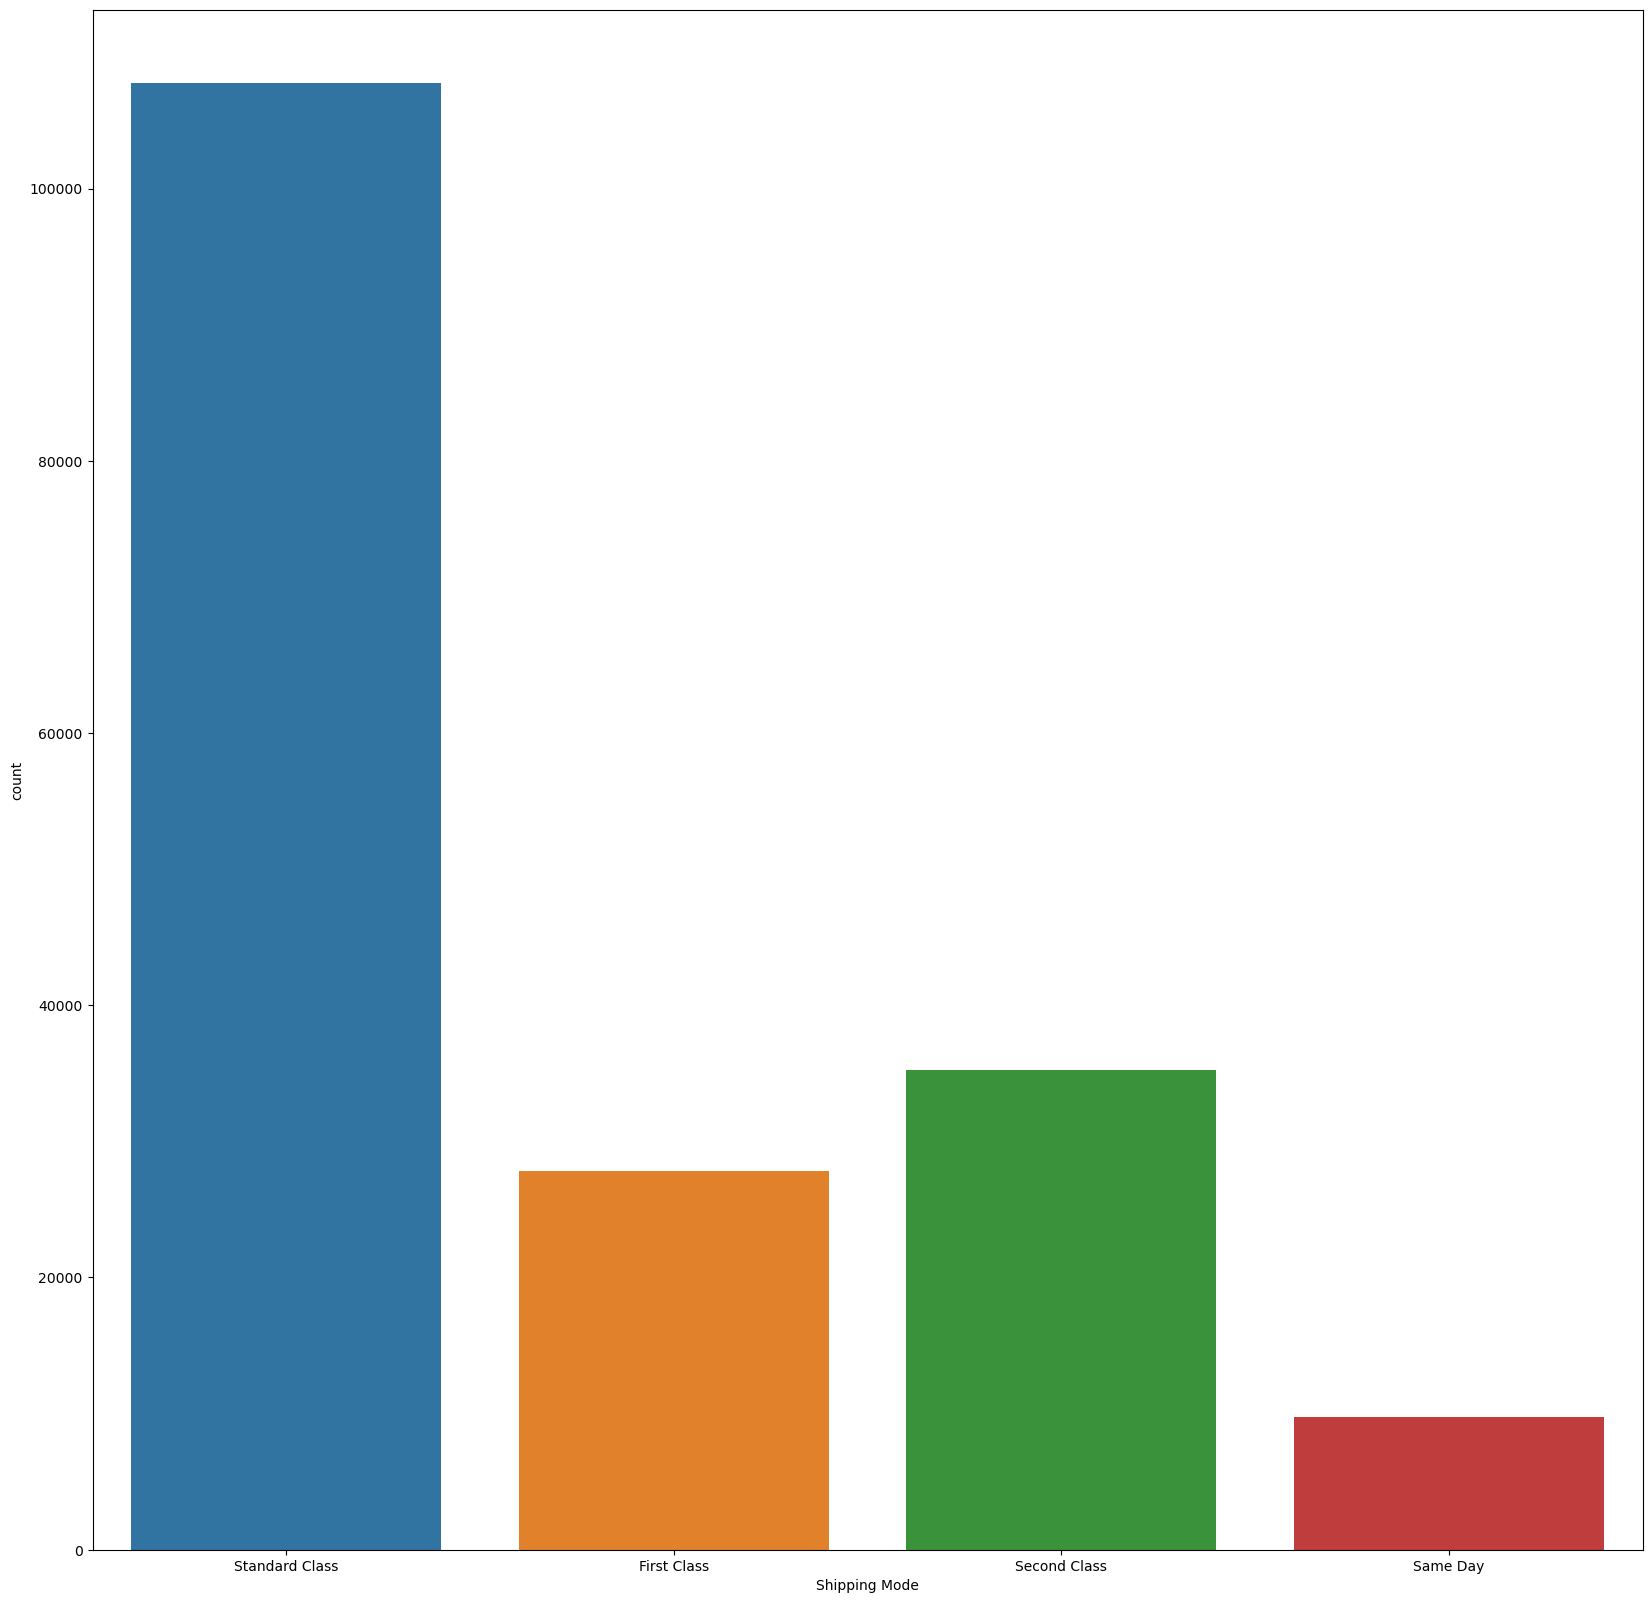

In [87]:
sns.countplot(x=df1['Shipping Mode'])
#plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Late by(Days)'>

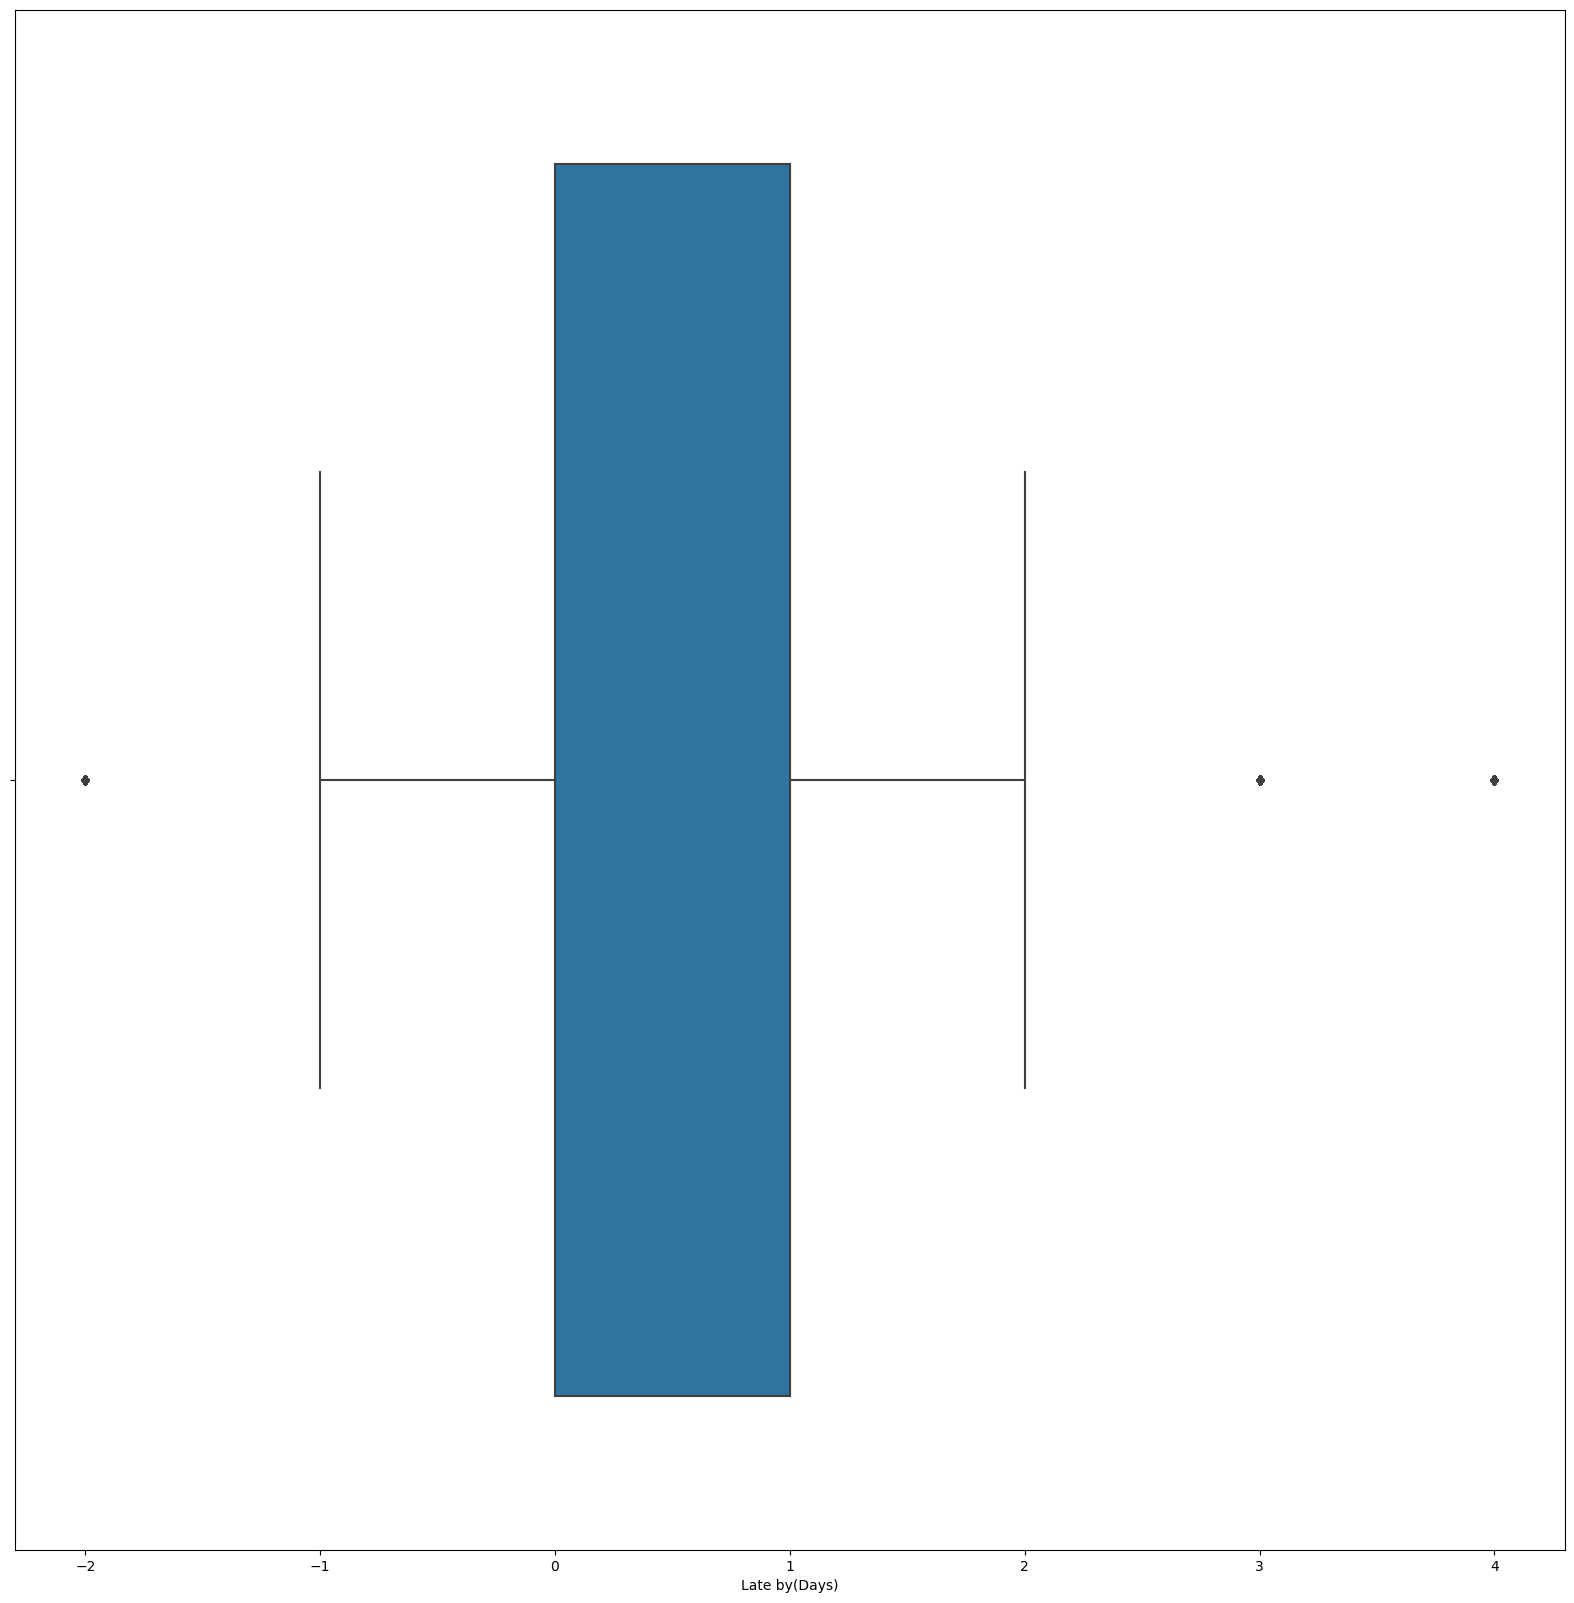

In [88]:
sns.boxplot(x=df1['Late by(Days)'])

In [89]:
df1['Late by(Days)'].value_counts(normalize=True)*100

 1    33.595737
 0    18.698029
 2    15.908726
-1    12.020874
-2    12.001485
 3     3.906687
 4     3.868462
Name: Late by(Days), dtype: float64

<AxesSubplot:xlabel='order_year', ylabel='count'>

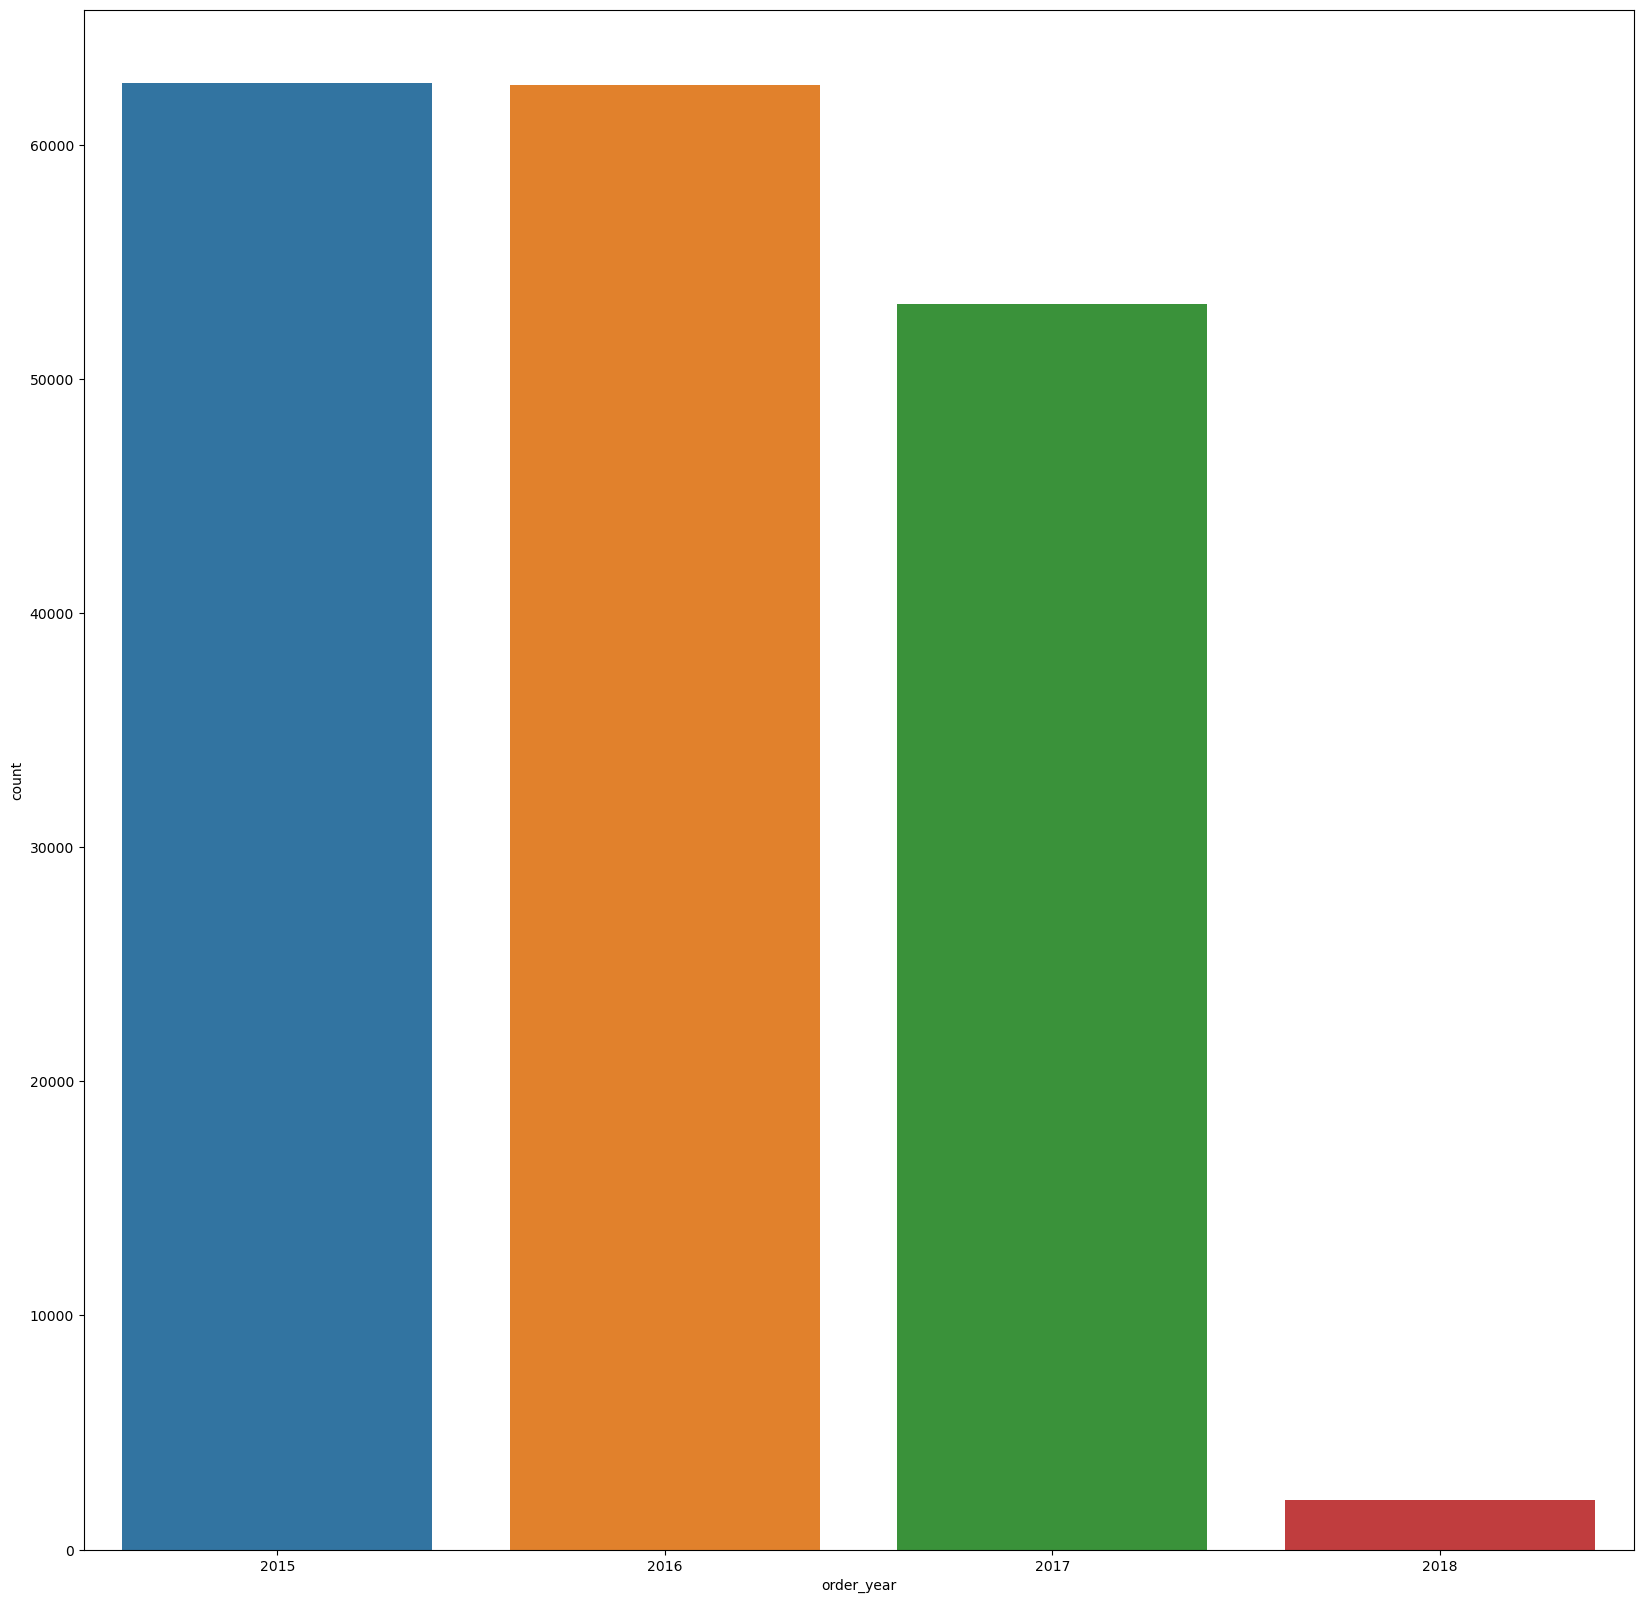

In [90]:
sns.countplot(x=df1['order_year'])

<AxesSubplot:xlabel='order_month', ylabel='count'>

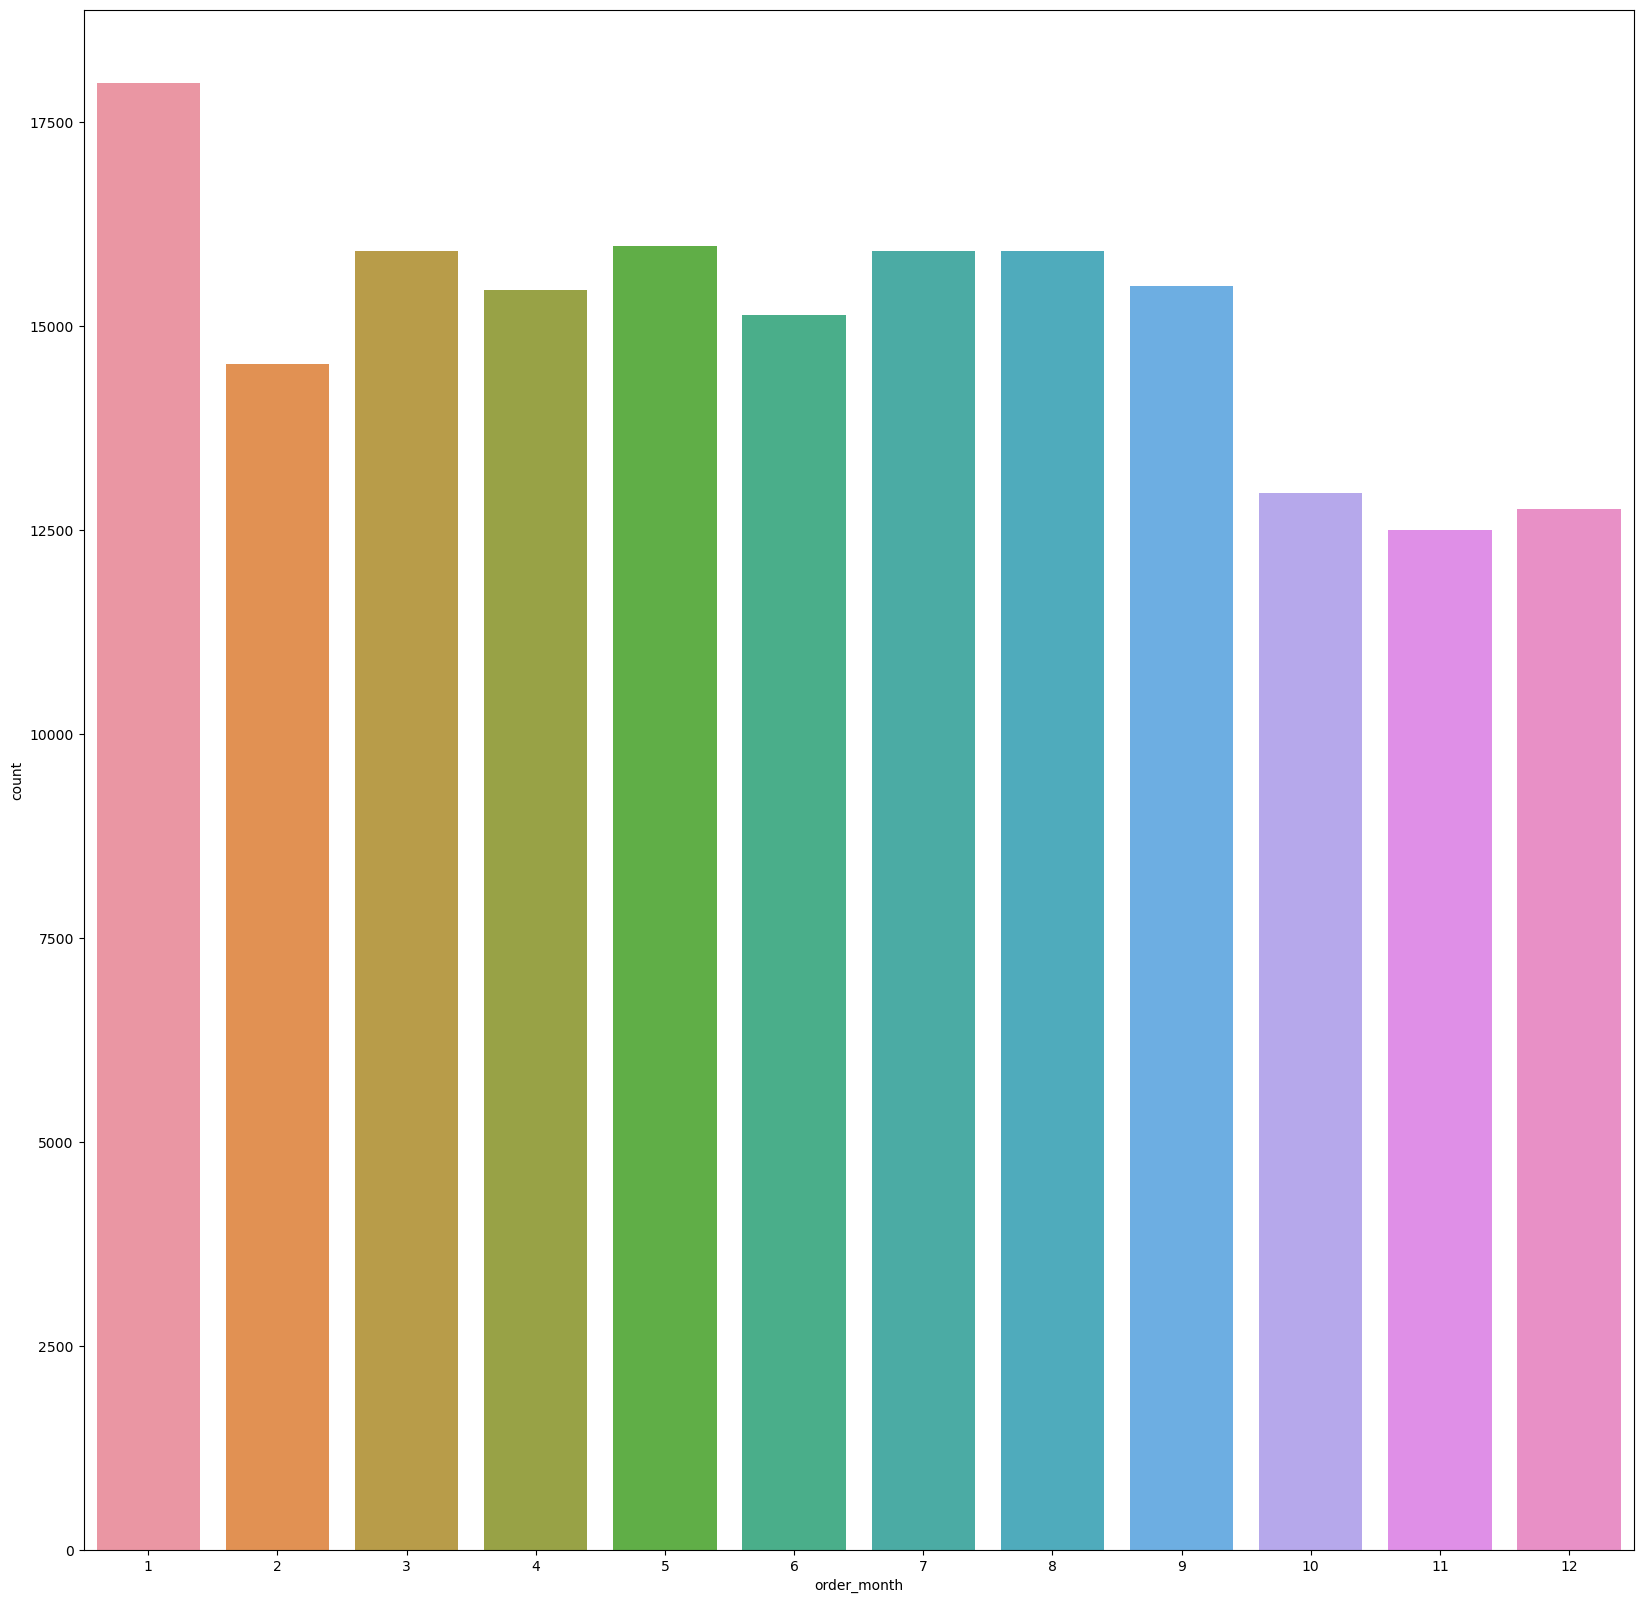

In [91]:
sns.countplot(x=df1['order_month'])

<AxesSubplot:xlabel='order_week_day', ylabel='count'>

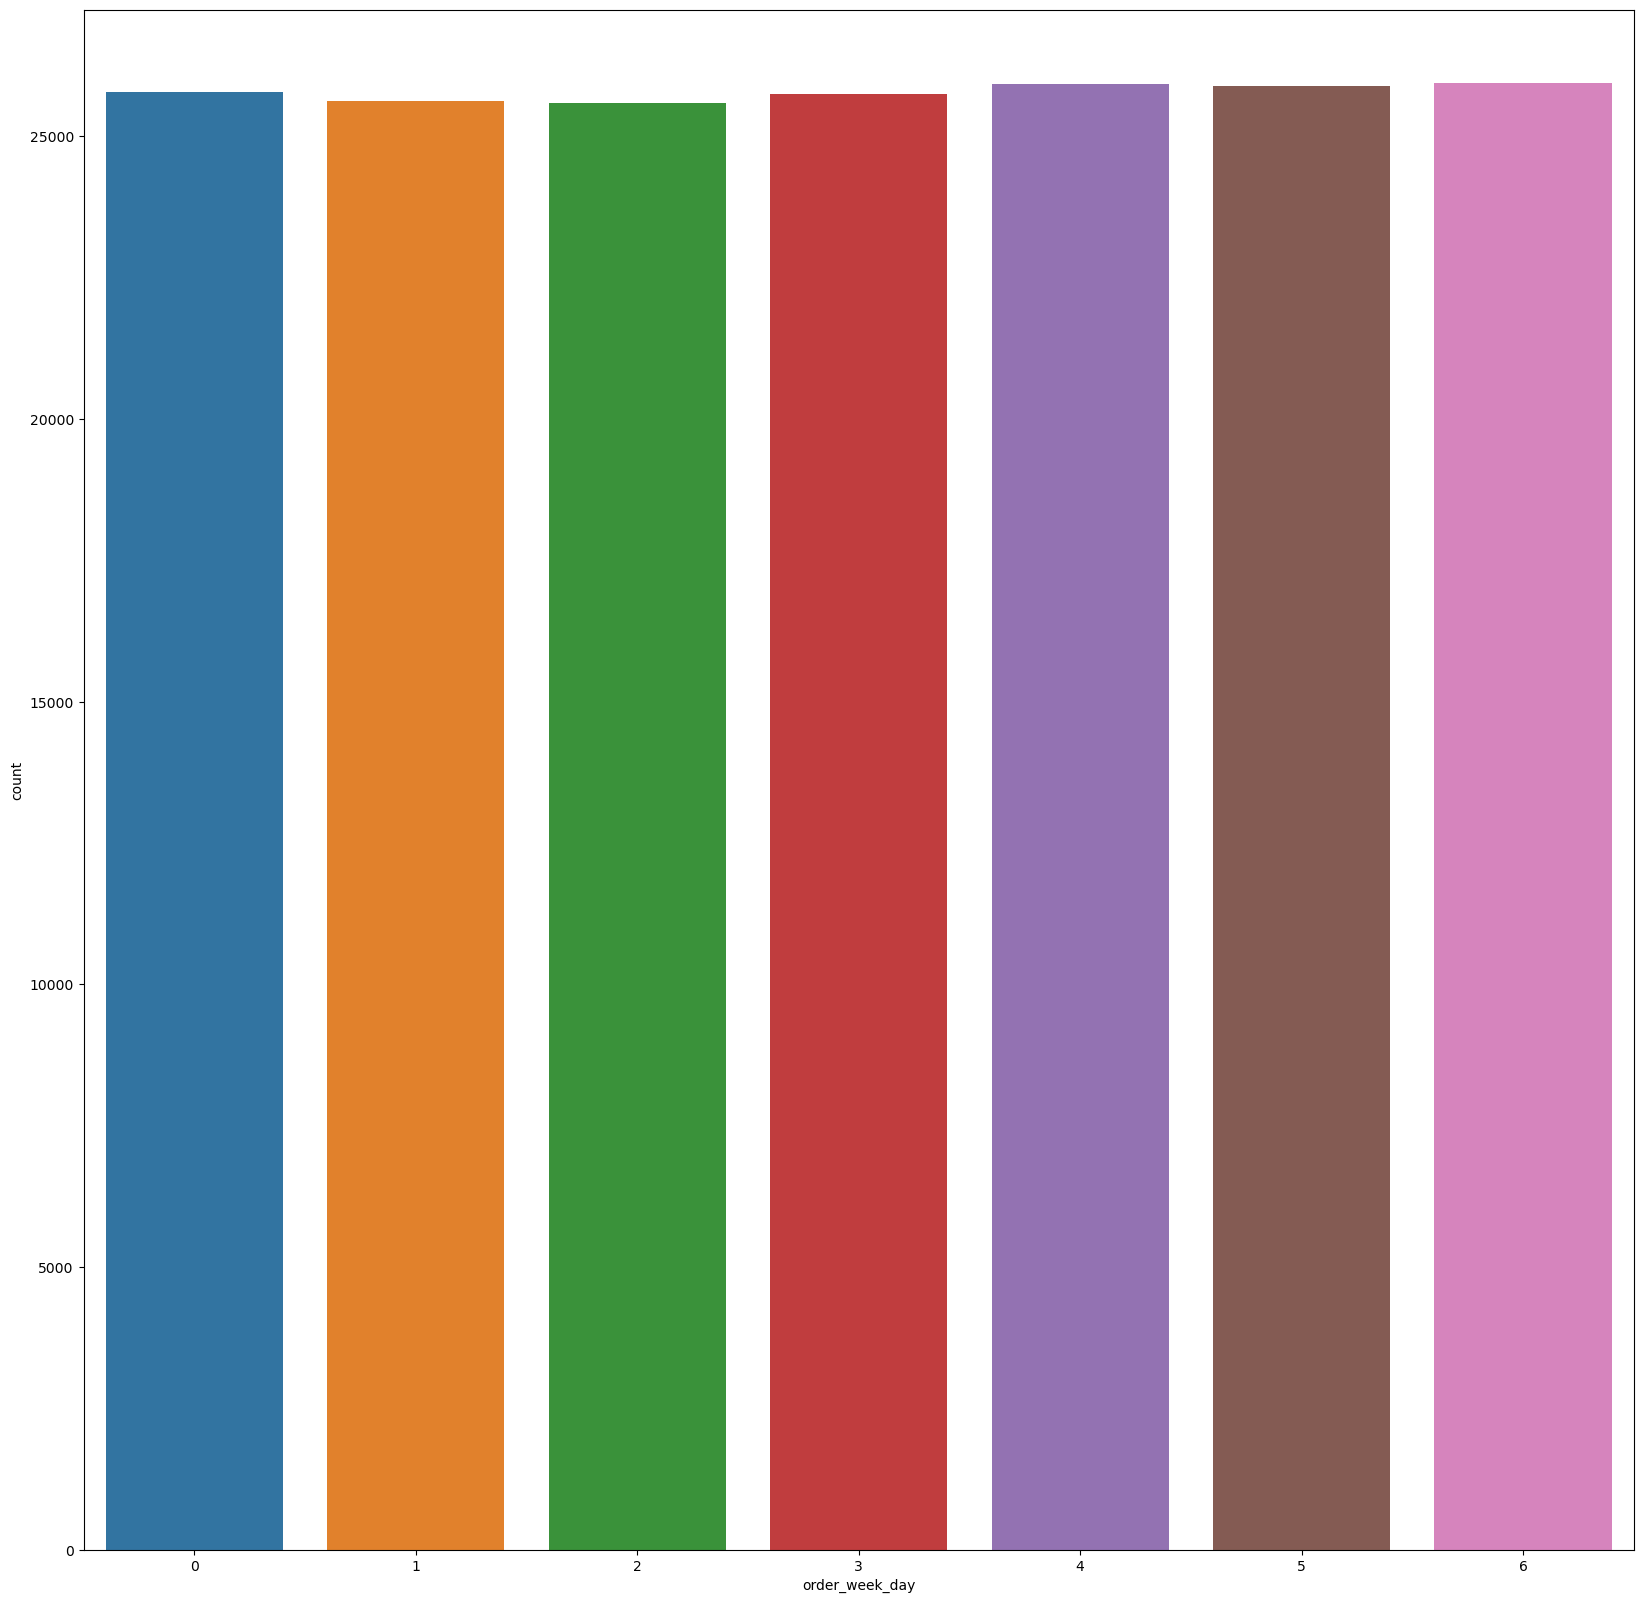

In [92]:
sns.countplot(x=df1['order_week_day'])

In [93]:
df1['order_week_day'].value_counts(normalize=True)*100

6    14.373639
4    14.362006
5    14.348156
0    14.285002
3    14.265059
1    14.192487
2    14.173651
Name: order_week_day, dtype: float64

# OUTLIER TREATMENT

In [94]:
x=df1.copy()

In [95]:
for i in x.select_dtypes(exclude='object').columns:
    IQR=x[i].quantile(0.75)-x[i].quantile(0.25)
    UL=x[i].quantile(0.75)+(IQR*1.5)
    LL=x[i].quantile(0.25)-(IQR*1.5)
    x[i][x[i]>UL]=UL
    x[i][x[i]<LL]=LL
x.drop(['Delivery Status','Days for shipping (real)','Late_delivery_risk'],axis=1,inplace=True)

x.head()

Type  Days for shipment (scheduled)  Benefit per order  \
0     DEBIT                              4          91.250000   
1  TRANSFER                              4         -79.700005   
2      CASH                              4         -79.700005   
3     DEBIT                              4          22.860001   
4   PAYMENT                              4         134.210007   

   Sales per customer   Category Name  Source City Source Country  \
0          314.640015  Sporting Goods       Caguas    Puerto Rico   
1          311.359985  Sporting Goods       Caguas    Puerto Rico   
2          309.720001  Sporting Goods     San Jose            USA   
3          304.809998  Sporting Goods  Los Angeles            USA   
4          298.250000  Sporting Goods       Caguas    Puerto Rico   

  Customer Segment Source State Department Name Destination Market  \
0         Consumer           PR         Fitness       Pacific Asia   
1         Consumer           PR         Fitness       Pacific Asia   
2         Consumer           CA         Fitness       Pacific Asia   
3      Home Office           CA         Fitness       Pacific Asia   
4        Corporate           PR         Fitness       Pacific Asia   

  Destination City Destination Country order date (DateOrders)  \
0           Bekasi           Indonesia         1/31/2018 22:56   
1          Bikaner               India         1/13/2018 12:27   
2          Bikaner               India         1/13/2018 12:06   
3       Townsville           Australia         1/13/2018 11:45   
4       Townsville           Australia         1/13/2018 11:24   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0            13.110000                      0.04                    327.75   
1            16.389999                      0.05                    327.75   
2            18.030001                      0.06                    327.75   
3            22.940001                      0.07                    327.75   
4            29.500000                      0.09                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales Destination Region  \
0                     0.29                    1  327.75     Southeast Asia   
1                    -0.34                    1  327.75         South Asia   
2                    -0.34                    1  327.75         South Asia   
3                     0.08                    1  327.75            Oceania   
4                     0.45                    1  327.75            Oceania   

  Destination State     Order Status  Product Name  Product Price  \
0   Java Occidental         COMPLETE  Smart watch          327.75   
1          Rajastán          PENDING  Smart watch          327.75   
2          Rajastán           CLOSED  Smart watch          327.75   
3        Queensland         COMPLETE  Smart watch          327.75   
4        Queensland  PENDING_PAYMENT  Smart watch          327.75   

  shipping date (DateOrders)   Shipping Mode customer full name  \
0           02-03-2018 22:56  Standard Class      CallyHolloway   
1            1/18/2018 12:27  Standard Class          IreneLuna   
2            1/17/2018 12:06  Standard Class   GillianMaldonado   
3            1/16/2018 11:45  Standard Class           TanaTate   
4            1/15/2018 11:24  Standard Class      OrliHendricks   

   Late by(Days)  order_year  order_month  order_week_day  order_hour  \
0           -1.0        2018            1               2          22   
1            1.0        2018            1               5          12   
2            0.0        2018            1               5          12   
3           -1.0        2018            1               5          11   
4           -1.5        2018            1               5          11   

   shipping_year  shipping_month  shipping_week_day  shipping_hour  
0           2018               2                  5             22  
1           2018               1                  

# BI VARIATE ANALYSIS

<AxesSubplot:xlabel='Type', ylabel='count'>

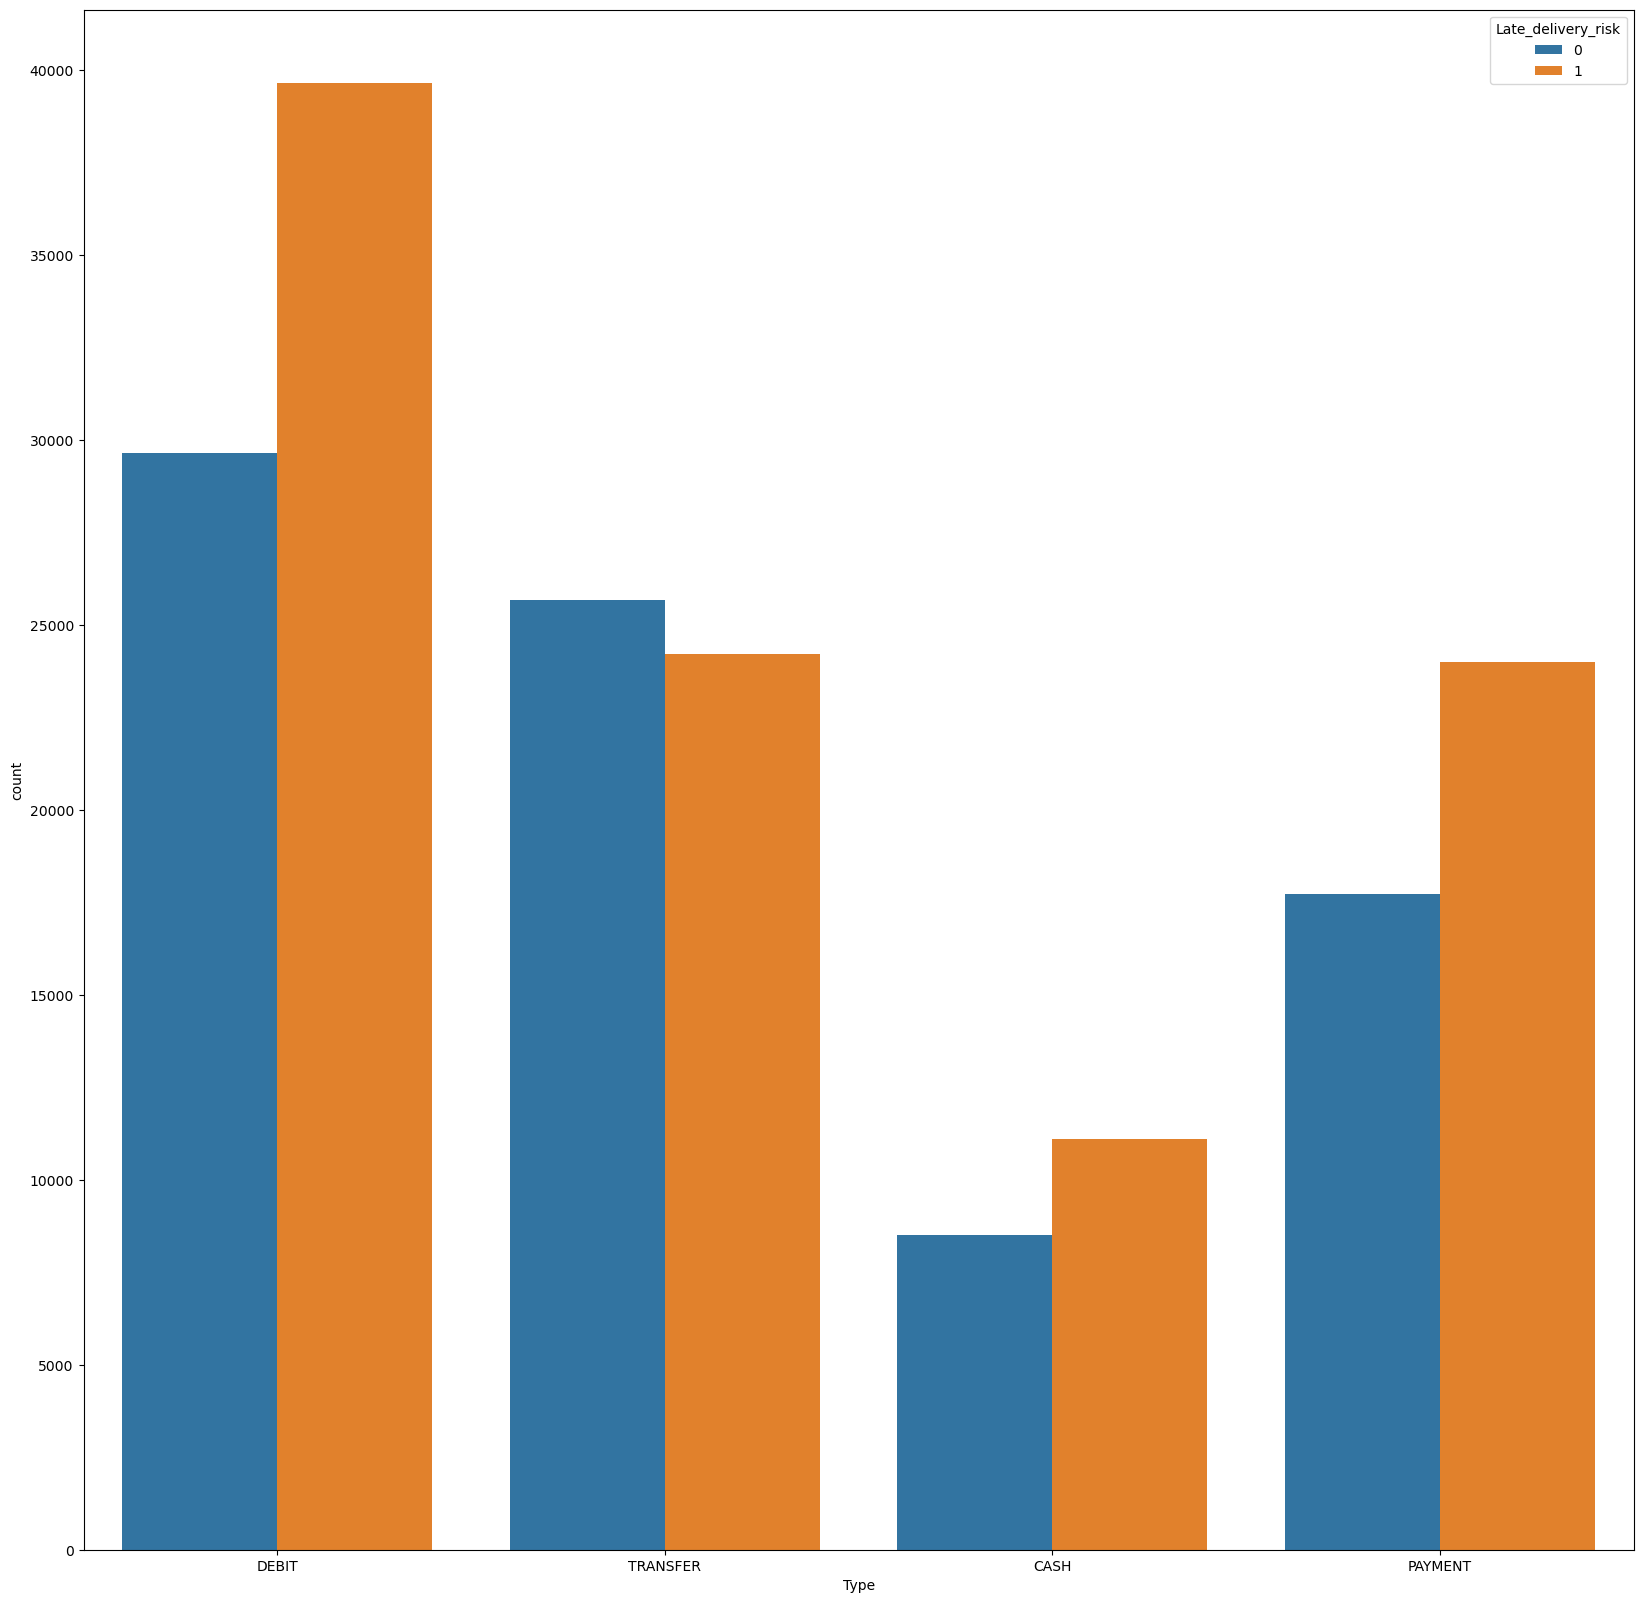

In [96]:
sns.countplot(x=df1['Type'],hue=df1['Late_delivery_risk'])

In [97]:
plt.rcParams['figure.figsize']=[10,5]

<AxesSubplot:xlabel='Days for shipment (scheduled)', ylabel='count'>

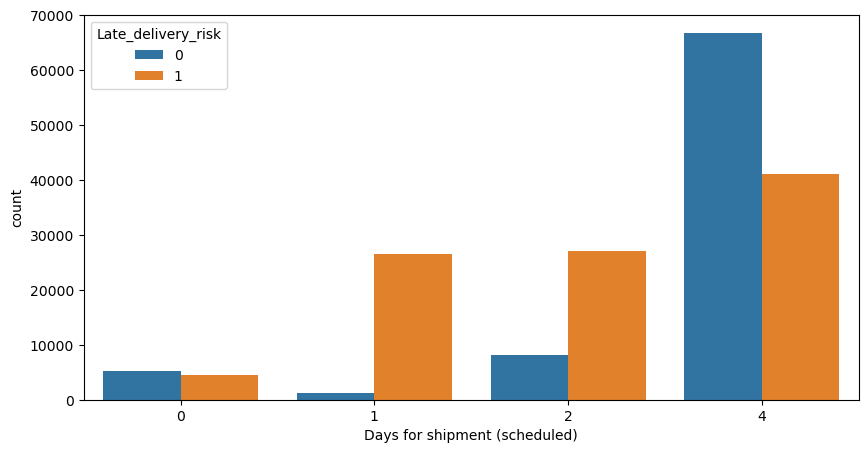

In [98]:
sns.countplot(hue=df1['Late_delivery_risk'],x=df1['Days for shipment (scheduled)'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Benefit per order'>

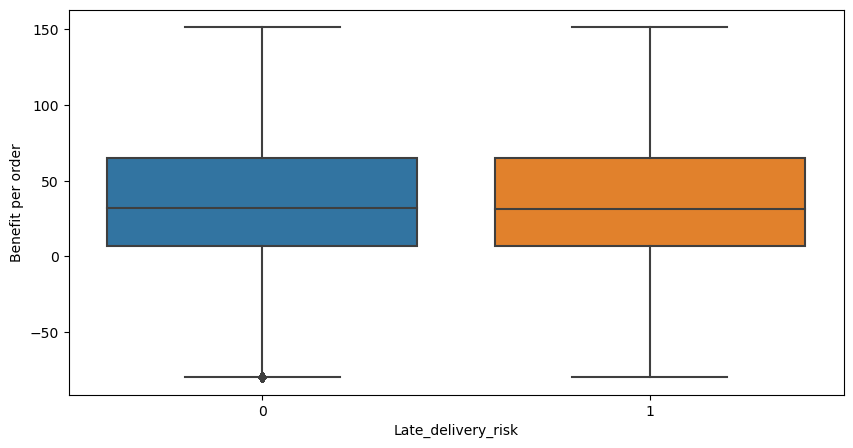

In [99]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Benefit per order'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales per customer'>

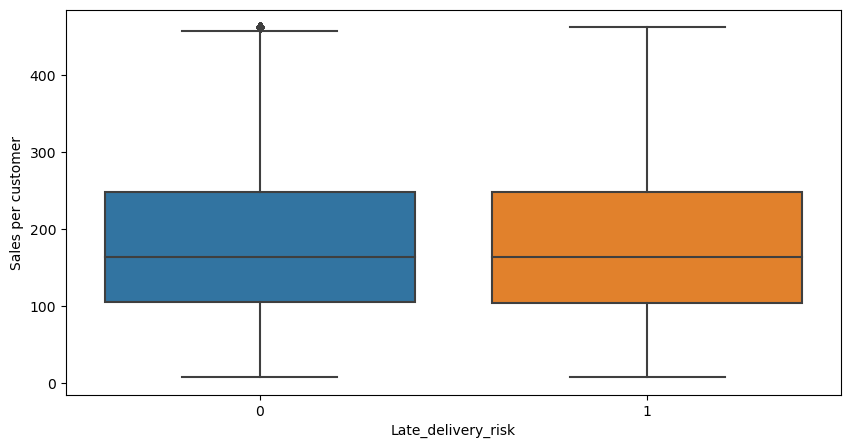

In [100]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Sales per customer'])

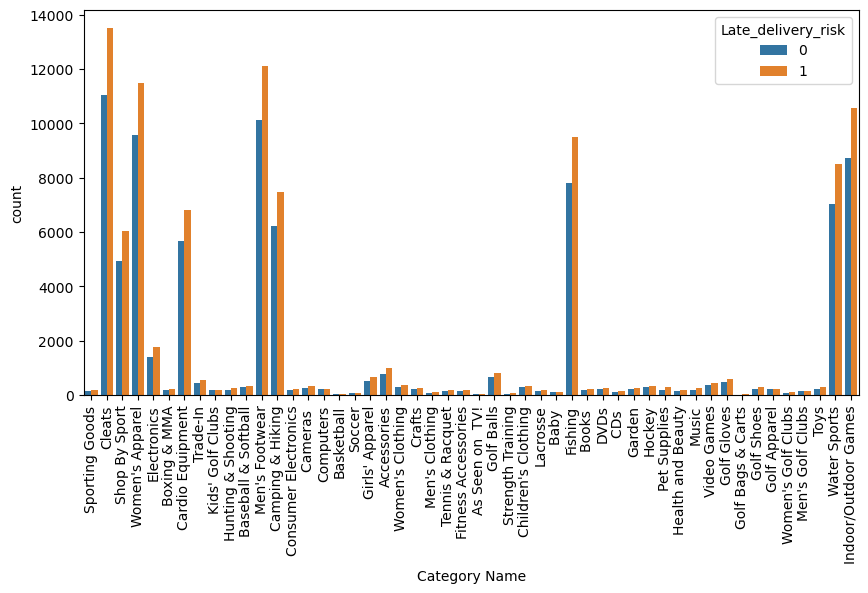

In [101]:
sns.countplot(x=df1['Category Name'],hue=df1['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

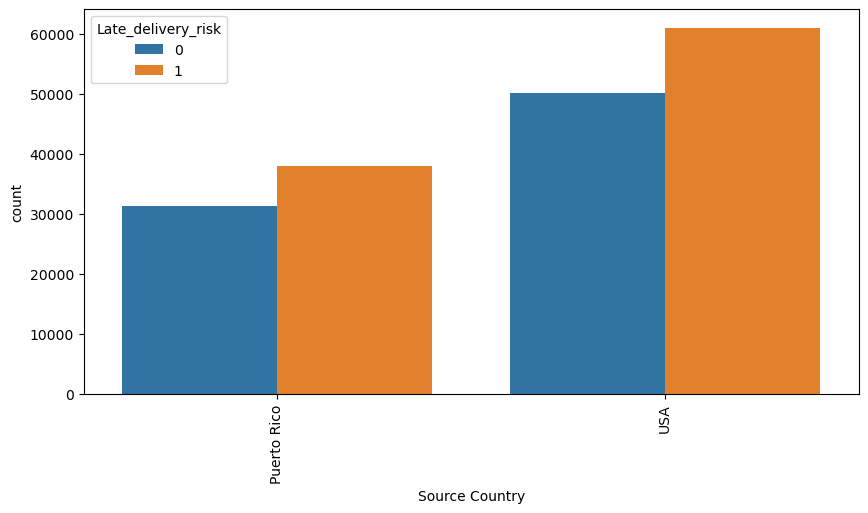

In [102]:
sns.countplot(x=df1['Source Country'],hue=df1['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

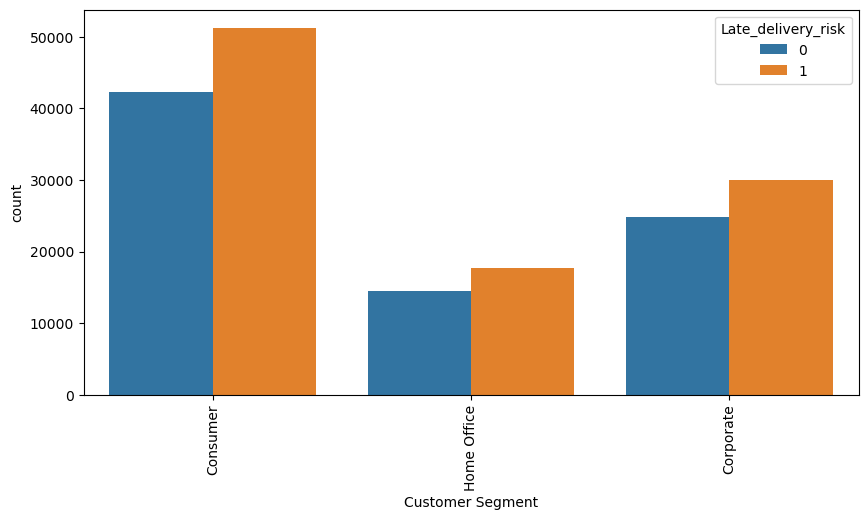

In [103]:
sns.countplot(x=df1['Customer Segment'],hue=df1['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

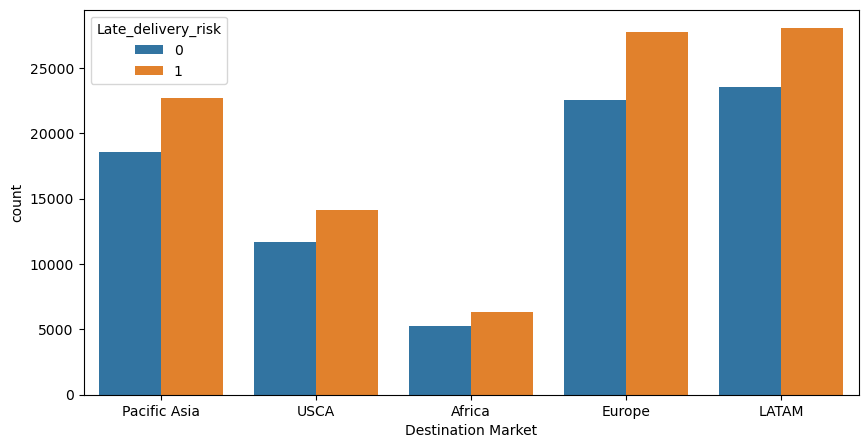

In [104]:
sns.countplot(x=df1['Destination Market'],hue=df1['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Discount'>

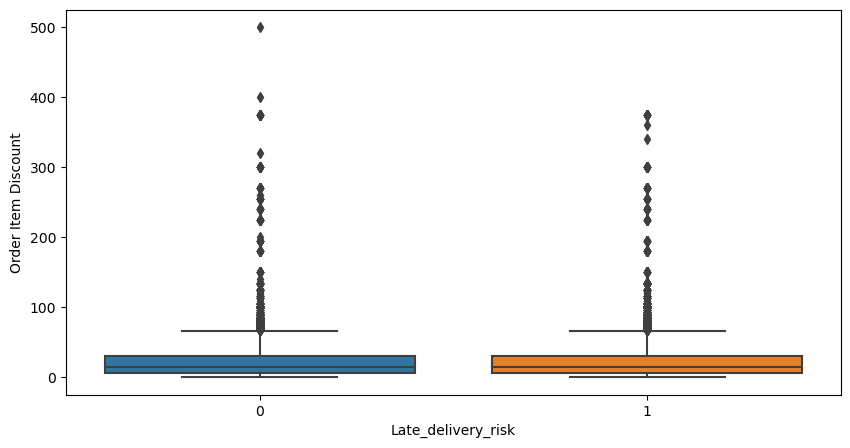

In [105]:
sns.boxplot(x=df1['Late_delivery_risk'],y=df1['Order Item Discount'])

In [106]:
plt.rcParams['figure.figsize']=[5,5]

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Discount'>

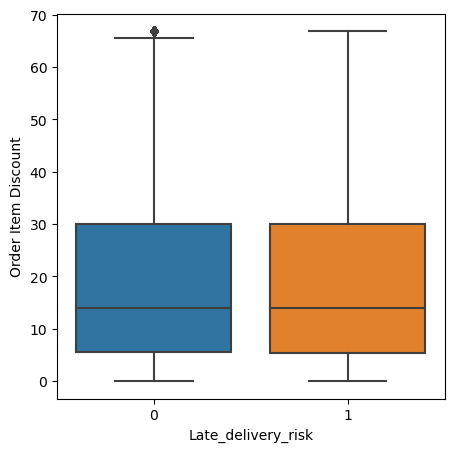

In [107]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Order Item Discount'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Discount Rate'>

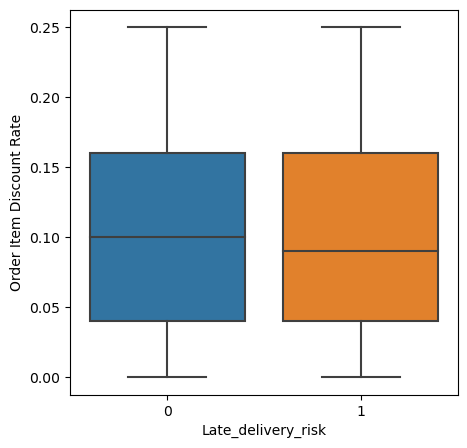

In [108]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Order Item Discount Rate'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Product Price'>

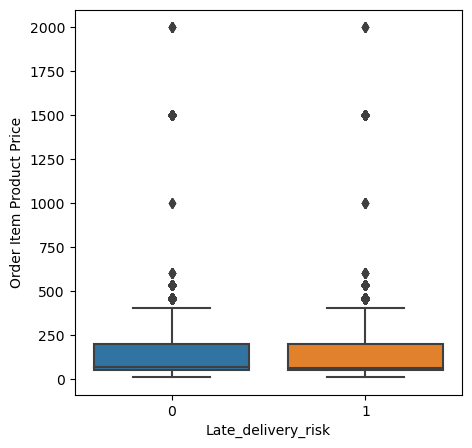

In [109]:
sns.boxplot(x=df1['Late_delivery_risk'],y=df1['Order Item Product Price'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Product Price'>

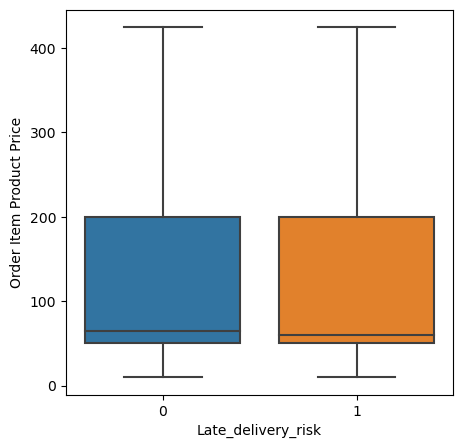

In [110]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Order Item Product Price'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Profit Ratio'>

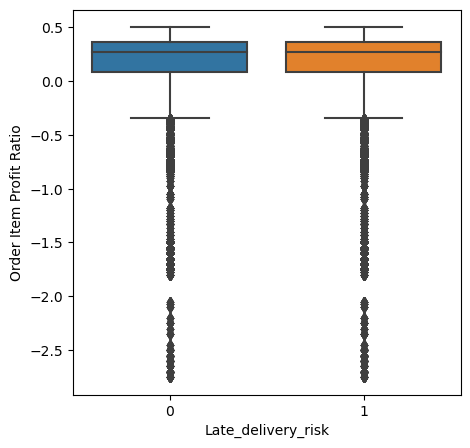

In [111]:
sns.boxplot(x=df1['Late_delivery_risk'],y=df1['Order Item Profit Ratio'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Profit Ratio'>

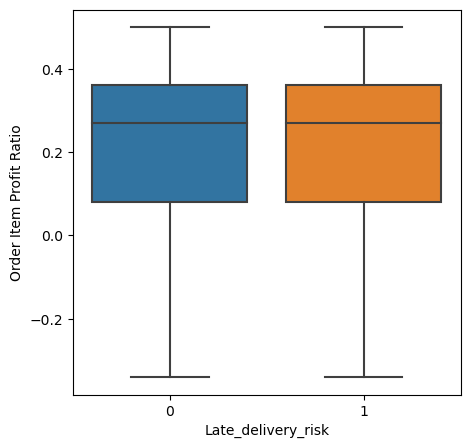

In [112]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Order Item Profit Ratio'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Quantity'>

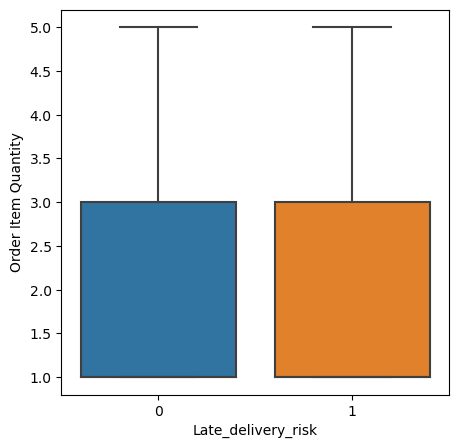

In [113]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Order Item Quantity'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales'>

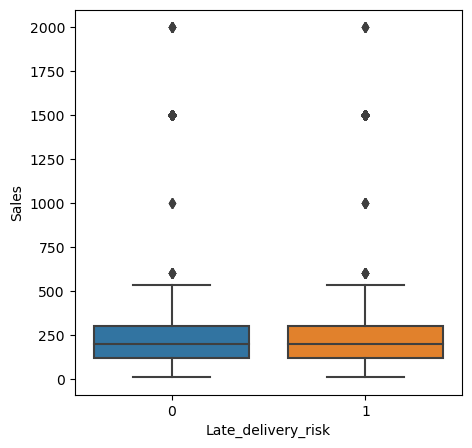

In [114]:
sns.boxplot(x=df1['Late_delivery_risk'],y=df1['Sales'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales'>

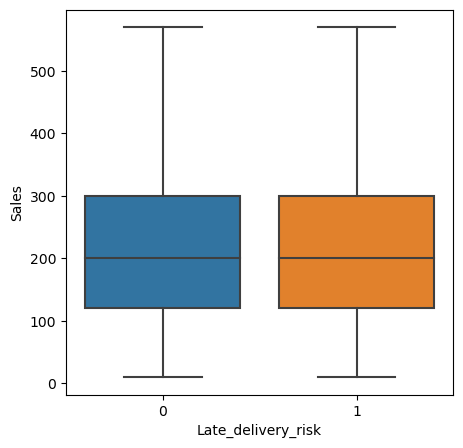

In [115]:
sns.boxplot(x=df1['Late_delivery_risk'],y=x['Sales'])

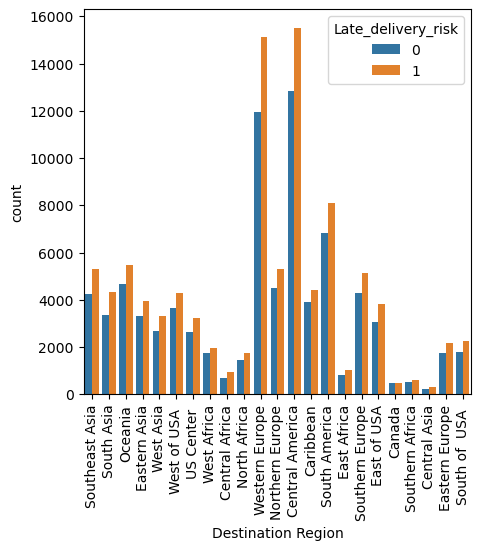

In [116]:
sns.countplot(x=df1['Destination Region'],hue=df1['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

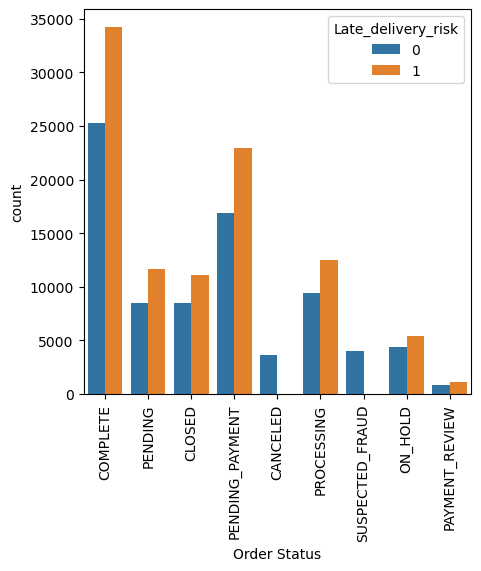

In [117]:
sns.countplot(x=df1['Order Status'],hue=df1['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

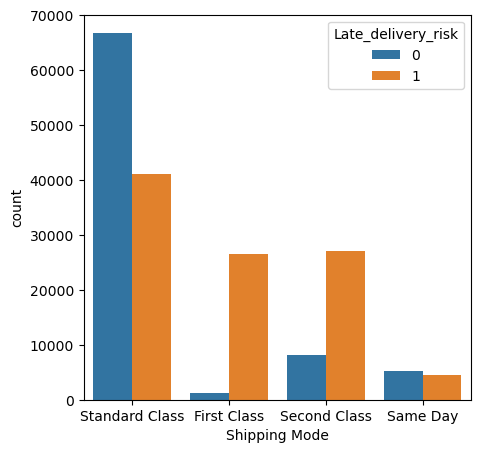

In [118]:
sns.countplot(x=df1['Shipping Mode'],hue=df1['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

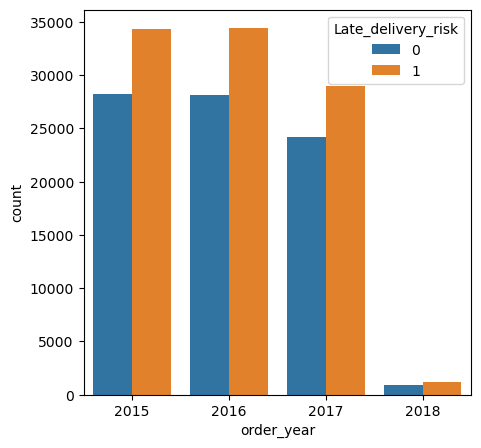

In [119]:
sns.countplot(x=df1['order_year'],hue=df1['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

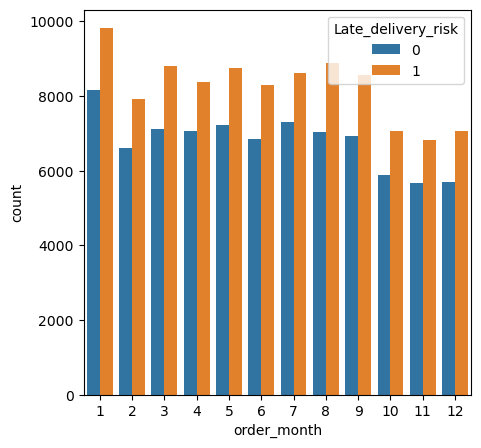

In [120]:
sns.countplot(x=df1['order_month'],hue=df1['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

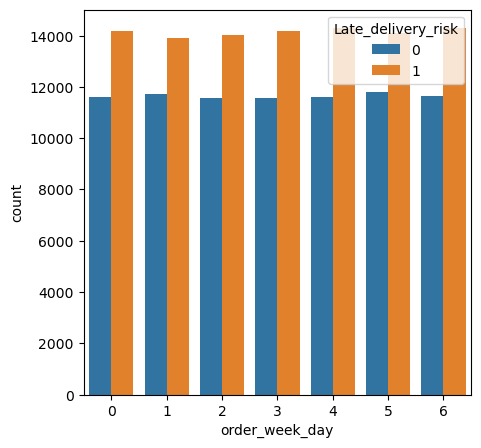

In [121]:
sns.countplot(x=df1['order_week_day'],hue=df1['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

### Statistical Test for Categorical Variables with Target Variable

In [122]:
df1.drop('Late_delivery_risk',1).select_dtypes(include='object').columns

Index(['Type', 'Delivery Status', 'Category Name', 'Source City',
       'Source Country', 'Customer Segment', 'Source State', 'Department Name',
       'Destination Market', 'Destination City', 'Destination Country',
       'order date (DateOrders)', 'Destination Region', 'Destination State',
       'Order Status', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode', 'customer full name'],
      dtype='object')

In [123]:
# chi2 contigency test for with outlier data

In [124]:
for i in df1.drop('Late_delivery_risk',1).select_dtypes(include='object').columns:
    table=pd.crosstab(df1[i],df1['Late_delivery_risk'])
    test_stat, p, dof, expected_value = chi2_contingency(observed =table, correction = False)
    print('For feature ',i,"  p-value:", round(p,3))

For feature  Type   p-value: 0.0
For feature  Delivery Status   p-value: 0.0
For feature  Category Name   p-value: 0.716
For feature  Source City   p-value: 0.0
For feature  Source Country   p-value: 0.65
For feature  Customer Segment   p-value: 0.593
For feature  Source State   p-value: 0.0
For feature  Department Name   p-value: 0.758
For feature  Destination Market   p-value: 0.07
For feature  Destination City   p-value: 0.0
For feature  Destination Country   p-value: 0.0
For feature  order date (DateOrders)   p-value: 0.0
For feature  Destination Region   p-value: 0.0
For feature  Destination State   p-value: 0.0
For feature  Order Status   p-value: 0.0
For feature  Product Name   p-value: 0.815
For feature  shipping date (DateOrders)   p-value: 0.0
For feature  Shipping Mode   p-value: 0.0
For feature  customer full name   p-value: 0.0


### Statistical Test for Continous Variables with Target Variable

In [125]:
df1.select_dtypes(exclude='object').columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Product Price', 'Late by(Days)', 'order_year', 'order_month',
       'order_week_day', 'order_hour', 'shipping_year', 'shipping_month',
       'shipping_week_day', 'shipping_hour'],
      dtype='object')

### shapiro test

In [126]:
for i in df1.select_dtypes(exclude='object').columns:
    stat, p_value = stats.shapiro(df1['Days for shipment (scheduled)'])
    print('Shapiro Test p value for',i,'is',p_value)

Shapiro Test p value for Days for shipping (real) is 0.0
Shapiro Test p value for Days for shipment (scheduled) is 0.0
Shapiro Test p value for Benefit per order is 0.0
Shapiro Test p value for Sales per customer is 0.0
Shapiro Test p value for Order Item Discount is 0.0
Shapiro Test p value for Order Item Discount Rate is 0.0
Shapiro Test p value for Order Item Product Price is 0.0
Shapiro Test p value for Order Item Profit Ratio is 0.0
Shapiro Test p value for Order Item Quantity is 0.0
Shapiro Test p value for Sales is 0.0
Shapiro Test p value for Product Price is 0.0
Shapiro Test p value for Late by(Days) is 0.0
Shapiro Test p value for order_year is 0.0
Shapiro Test p value for order_month is 0.0
Shapiro Test p value for order_week_day is 0.0
Shapiro Test p value for order_hour is 0.0
Shapiro Test p value for shipping_year is 0.0
Shapiro Test p value for shipping_month is 0.0
Shapiro Test p value for shipping_week_day is 0.0
Shapiro Test p value for shipping_hour is 0.0


In [127]:
from scipy import stats
import pandas as pd

# Assuming you have already loaded your DataFrame 'df1'

for i in df1.select_dtypes(exclude='object').columns:
    stat, p_value = stats.shapiro(df1[i])
    print('Shapiro Test p value for', i, 'is', p_value)


Shapiro Test p value for Days for shipping (real) is 0.0
Shapiro Test p value for Days for shipment (scheduled) is 0.0
Shapiro Test p value for Benefit per order is 0.0
Shapiro Test p value for Sales per customer is 0.0
Shapiro Test p value for Order Item Discount is 0.0
Shapiro Test p value for Order Item Discount Rate is 0.0
Shapiro Test p value for Order Item Product Price is 0.0
Shapiro Test p value for Order Item Profit Ratio is 0.0
Shapiro Test p value for Order Item Quantity is 0.0
Shapiro Test p value for Sales is 0.0
Shapiro Test p value for Product Price is 0.0
Shapiro Test p value for Late by(Days) is 0.0
Shapiro Test p value for order_year is 0.0
Shapiro Test p value for order_month is 0.0
Shapiro Test p value for order_week_day is 0.0
Shapiro Test p value for order_hour is 0.0
Shapiro Test p value for shipping_year is 0.0
Shapiro Test p value for shipping_month is 0.0
Shapiro Test p value for shipping_week_day is 0.0
Shapiro Test p value for shipping_hour is 0.0


In [128]:
x.head(2)

Type  Days for shipment (scheduled)  Benefit per order  \
0     DEBIT                              4          91.250000   
1  TRANSFER                              4         -79.700005   

   Sales per customer   Category Name Source City Source Country  \
0          314.640015  Sporting Goods      Caguas    Puerto Rico   
1          311.359985  Sporting Goods      Caguas    Puerto Rico   

  Customer Segment Source State Department Name Destination Market  \
0         Consumer           PR         Fitness       Pacific Asia   
1         Consumer           PR         Fitness       Pacific Asia   

  Destination City Destination Country order date (DateOrders)  \
0           Bekasi           Indonesia         1/31/2018 22:56   
1          Bikaner               India         1/13/2018 12:27   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0            13.110000                      0.04                    327.75   
1            16.389999                      0.05                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales Destination Region  \
0                     0.29                    1  327.75     Southeast Asia   
1                    -0.34                    1  327.75         South Asia   

  Destination State Order Status  Product Name  Product Price  \
0   Java Occidental     COMPLETE  Smart watch          327.75   
1          Rajastán      PENDING  Smart watch          327.75   

  shipping date (DateOrders)   Shipping Mode customer full name  \
0           02-03-2018 22:56  Standard Class      CallyHolloway   
1            1/18/2018 12:27  Standard Class          IreneLuna   

   Late by(Days)  order_year  order_month  order_week_day  order_hour  \
0           -1.0        2018            1               2          22   
1            1.0        2018            1               5          12   

   shipping_year  shipping_month  shipping_week_day  shipping_hour  
0           2018               2                  5             22  
1           2018               1                  3             12

In [129]:
# shapiro test for without outlier data

In [ ]:
for i in x.select_dtypes(exclude='object').columns:
    stat, p_value = stats.shapiro(x[i])
    print('Shapiro Test p value for',i,'is',p_value)

### LEVENE TEST

In [131]:
for i in df1.select_dtypes(exclude='object').columns:
    t0=df1[df1['Late_delivery_risk']==0][i]
    t1=df1[df1['Late_delivery_risk']==1][i]
    stat, p_value = stats.levene(t0,t1)
    print('Levene Test p value for',i,'is',p_value)

Levene Test p value for Days for shipping (real) is 0.0
Levene Test p value for Days for shipment (scheduled) is 0.0
Levene Test p value for Benefit per order is 0.24761951707525662
Levene Test p value for Sales per customer is 0.4783536449871655
Levene Test p value for Order Item Discount is 0.564013981711503
Levene Test p value for Order Item Discount Rate is 0.04378149054734958
Levene Test p value for Order Item Product Price is 0.4903075951020216
Levene Test p value for Order Item Profit Ratio is 0.23708119677557052
Levene Test p value for Order Item Quantity is 0.951698015544013
Levene Test p value for Sales is 0.7074737154876768
Levene Test p value for Product Price is 0.4903075951020216
Levene Test p value for Late by(Days) is 0.0
Levene Test p value for order_year is 0.25779924351112304
Levene Test p value for order_month is 0.5886179469887509
Levene Test p value for order_week_day is 0.8955369140042174
Levene Test p value for order_hour is 0.4952953295688447
Levene Test p valu

In [132]:
df1_num['Days for shipment (scheduled)']= df1['Days for shipment (scheduled)']

In [133]:
df1_num.columns

Index(['Benefit per order', 'Sales per customer', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Product Price', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'Days for shipment (scheduled)'],
      dtype='object')

In [134]:
# 2 sample t-test
#to know mean weight netween 2 variables are equal or not

In [135]:
for i in df1_num.columns:
    print('pvalue for ',i,'is :',ttest_ind(df1['Sales'],df1[i]).pvalue)

pvalue for  Benefit per order is : 0.0
pvalue for  Sales per customer is : 0.0
pvalue for  Order Item Discount is : 0.0
pvalue for  Order Item Discount Rate is : 0.0
pvalue for  Order Item Product Price is : 0.0
pvalue for  Order Item Profit Ratio is : 0.0
pvalue for  Order Item Quantity is : 0.0
pvalue for  Sales is : 1.0
pvalue for  Product Price is : 0.0
pvalue for  order_year is : 0.0
pvalue for  order_month is : 0.0
pvalue for  order_week_day is : 0.0
pvalue for  order_hour is : 0.0
pvalue for  Days for shipment (scheduled) is : 0.0


In [136]:
# KRUSKAL TEST

In [137]:
for i in df1_num.columns:
    t0=df1[df1['Late_delivery_risk']==0][i]
    t1=df1[df1['Late_delivery_risk']==1][i]
    st,pval=stats.kruskal(t0,t1)
    print('Kruskal Test p value for',i,'is',round(pval,3))

Kruskal Test p value for Benefit per order is 0.209
Kruskal Test p value for Sales per customer is 0.261
Kruskal Test p value for Order Item Discount is 0.37
Kruskal Test p value for Order Item Discount Rate is 0.876
Kruskal Test p value for Order Item Product Price is 0.282
Kruskal Test p value for Order Item Profit Ratio is 0.673
Kruskal Test p value for Order Item Quantity is 0.812
Kruskal Test p value for Sales is 0.231
Kruskal Test p value for Product Price is 0.282
Kruskal Test p value for order_year is 0.317
Kruskal Test p value for order_month is 0.272
Kruskal Test p value for order_week_day is 0.633
Kruskal Test p value for order_hour is 0.0
Kruskal Test p value for Days for shipment (scheduled) is 0.0


In [138]:
df1_cat.columns

Index(['Type', 'Source Country', 'Customer Segment', 'Department Name',
       'Destination Market', 'Destination Region', 'Order Status',
       'Shipping Mode', 'order_year', 'Days for shipment (scheduled)',
       'order_month'],
      dtype='object')

In [139]:
# ONE WAY TEST

In [140]:
for i in df1.select_dtypes(exclude='object').columns:
    t0=df1[df1['Late_delivery_risk']==0][i]
    t1=df1[df1['Late_delivery_risk']==1][i]
    f_test, pval = stats.f_oneway(t0,t1)
    print('Test p value for',i,'is',round(pval,3))

Test p value for Days for shipping (real) is 0.0
Test p value for Days for shipment (scheduled) is 0.0
Test p value for Benefit per order is 0.113
Test p value for Sales per customer is 0.108
Test p value for Order Item Discount is 0.755
Test p value for Order Item Discount Rate is 0.861
Test p value for Order Item Product Price is 0.359
Test p value for Order Item Profit Ratio is 0.324
Test p value for Order Item Quantity is 0.952
Test p value for Sales is 0.131
Test p value for Product Price is 0.359
Test p value for Late by(Days) is 0.0
Test p value for order_year is 0.357
Test p value for order_month is 0.274
Test p value for order_week_day is 0.633
Test p value for order_hour is 0.0
Test p value for shipping_year is 0.851
Test p value for shipping_month is 0.117
Test p value for shipping_week_day is 0.754
Test p value for shipping_hour is 0.0


In [141]:
df1['Late_delivery_risk'].value_counts()

1    98973
0    81538
Name: Late_delivery_risk, dtype: int64

In [142]:
# P VALUES FOR LATE DELIVERY RISK AND SHIPMENT DAYS

In [143]:
stat, p_value = stats.shapiro(df1['Days for shipment (scheduled)'])
p_value

0.0

In [144]:
stat, p_value = stats.levene(t0,t1)
p_value

0.2952304418164119

In [145]:
t0=df1[df1['Late_delivery_risk']==0]['Days for shipment (scheduled)']
t1=df1[df1['Late_delivery_risk']==1]['Days for shipment (scheduled)']

In [146]:
f_test, p_val = stats.f_oneway(t0,t1)

# print the test statistic and corresponding p-value
print('p-value:', p_val)

p-value: 0.0


In [147]:
stats.kruskal(t0,t1)

KruskalResult(statistic=27208.68204640635, pvalue=0.0)

In [148]:
st,pval=stats.kruskal(t0,t1)

In [149]:
print(st,pval)

27208.68204640635 0.0


### kruskal test(statistical test for categorical variables)

In [150]:
feature=[]
p_value=[]
for i in df1.select_dtypes(exclude =np.number).columns:
    t0=df1[df1['Late_delivery_risk']==0][i]
    t1=df1[df1['Late_delivery_risk']==1][i]
    st,pval=stats.kruskal(t0,t1,nan_policy='omit')
    print('Kruskal Test p value for',i,'is',round(pval,3))
    if pval >0.05:
        feature.append(i)
        p_value.append(pval)

Kruskal Test p value for Type is 0.0
Kruskal Test p value for Delivery Status is 0.0
Kruskal Test p value for Late_delivery_risk is 0.0
Kruskal Test p value for Category Name is 0.632
Kruskal Test p value for Source City is 0.059
Kruskal Test p value for Source Country is 0.65
Kruskal Test p value for Customer Segment is 0.63
Kruskal Test p value for Source State is 0.841
Kruskal Test p value for Department Name is 0.374
Kruskal Test p value for Destination Market is 0.716
Kruskal Test p value for Destination City is 0.116
Kruskal Test p value for Destination Country is 0.427
Kruskal Test p value for order date (DateOrders) is 0.821
Kruskal Test p value for Destination Region is 0.004
Kruskal Test p value for Destination State is 0.506
Kruskal Test p value for Order Status is 0.385
Kruskal Test p value for Product Name is 0.039
Kruskal Test p value for shipping date (DateOrders) is 0.564
Kruskal Test p value for Shipping Mode is 0.0
Kruskal Test p value for customer full name is 0.019


 ## MODEL BUILDING

In [151]:
df1.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Benefit per order  Sales per customer   Delivery Status Late_delivery_risk  \
0          91.250000          314.640015  Advance shipping                  0   
1        -249.089996          311.359985     Late delivery                  1   

    Category Name Source City Source Country Customer Segment Source State  \
0  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   
1  Sporting Goods      Caguas    Puerto Rico         Consumer           PR   

  Department Name Destination Market Destination City Destination Country  \
0         Fitness       Pacific Asia           Bekasi           Indonesia   
1         Fitness       Pacific Asia          Bikaner               India   

  order date (DateOrders)  Order Item Discount  Order Item Discount Rate  \
0         1/31/2018 22:56            13.110000                      0.04   
1         1/13/2018 12:27            16.389999                      0.05   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

    Sales Destination Region Destination State Order Status  Product Name  \
0  327.75     Southeast Asia   Java Occidental     COMPLETE  Smart watch    
1  327.75         South Asia          Rajastán      PENDING  Smart watch    

   Product Price shipping date (DateOrders)   Shipping Mode  \
0         327.75           02-03-2018 22:56  Standard Class   
1         327.75            1/18/2018 12:27  Standard Class   

  customer full name  Late by(Days)  order_year  order_month  order_week_day  \
0      CallyHolloway             -1        2018            1               2   
1          IreneLuna              1        2018            1               5   

   order_hour  shipping_year  shipping_month  shipping_week_day  shipping_hour  
0          22           2018               2                  5             22  
1          12           2018               1                  3             12

In [152]:
df1.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Source City', 'Source Country',
       'Customer Segment', 'Source State', 'Department Name',
       'Destination Market', 'Destination City', 'Destination Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Destination Region', 'Destination State', 'Order Status',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'customer full name', 'Late by(Days)', 'order_year',
       'order_month', 'order_week_day', 'order_hour', 'shipping_year',
       'shipping_month', 'shipping_week_day', 'shipping_hour'],
      dtype='object')

In [153]:
df1_drop=df1.drop(['Days for shipping (real)','order date (DateOrders)','Destination Country','Product Name',
                 'shipping date (DateOrders)','Destination State','Destination City','customer full name',
                 'Delivery Status','Category Name','Late by(Days)','shipping_year','shipping_month',
                 'shipping_week_day','shipping_hour','order_month','order_week_day','order_hour','Source City'],axis=1)

In [154]:
df1_drop.columns

Index(['Type', 'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Late_delivery_risk', 'Source Country',
       'Customer Segment', 'Source State', 'Department Name',
       'Destination Market', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Destination Region', 'Order Status',
       'Product Price', 'Shipping Mode', 'order_year'],
      dtype='object')

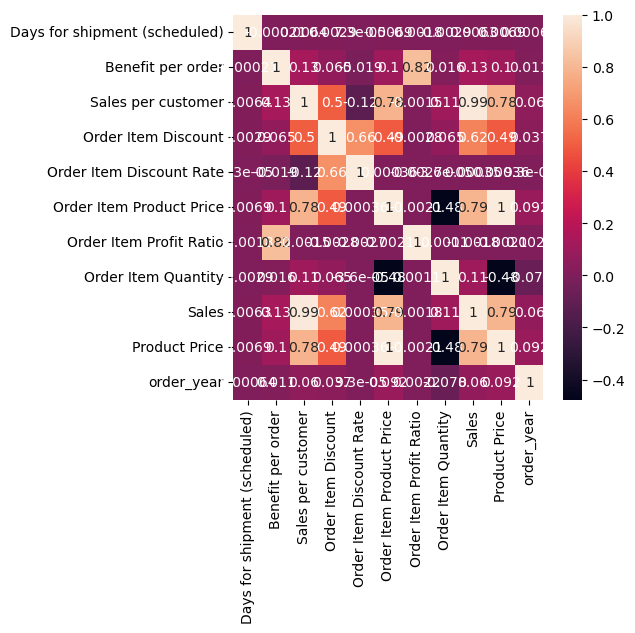

In [155]:
sns.heatmap(df1_drop.corr(),annot=True)
plt.show()

In [156]:
x=df1_drop.drop('Late_delivery_risk',1)
y=df1_drop['Late_delivery_risk']
#df_drop_en=pd.get_dummies(x,drop_first=True)

#df_drop_en.head()

In [157]:
df1_drop.shape

(180511, 21)

In [158]:
encoded_df = pd.DataFrame()

In [159]:
for col in x.select_dtypes(include=['object']).columns:
    
    category_counts = x[col].value_counts(normalize=True)
    
    
    category_frequency = category_counts.to_dict()
    
    
    encoded_df[col] = x[col].map(category_frequency)

In [160]:
encoded_df.head()

Type  Source Country  Customer Segment  Source State  Department Name  \
0  0.383866        0.384303          0.517991      0.384303         0.013733   
1  0.276327        0.384303          0.517991      0.384303         0.013733   
2  0.108669        0.615697          0.517991      0.161879         0.013733   
3  0.383866        0.615697          0.178510      0.161879         0.013733   
4  0.231138        0.384303          0.303500      0.384303         0.013733   

   Destination Market  Destination Region  Order Status  Shipping Mode  
0            0.228546            0.052828      0.329559         0.5969  
1            0.228546            0.042823      0.112037         0.5969  
2            0.228546            0.042823      0.108669         0.5969  
3            0.228546            0.056218      0.329559         0.5969  
4            0.228546            0.056218      0.220651         0.5969

In [161]:
x.shape

(180511, 20)

In [162]:
x_num=x.select_dtypes(include=np.number)

In [163]:
ss=StandardScaler()
scaled_num=pd.DataFrame(ss.fit_transform(x_num),columns=x_num.columns,index=x_num.index)

In [164]:
scaled_num.head()

Days for shipment (scheduled)  Benefit per order  Sales per customer  \
0                       0.777154           0.663374            1.095778   
1                       0.777154          -2.595563            1.068454   
2                       0.777154          -2.583020            1.054792   
3                       0.777154           0.008503            1.013890   
4                       0.777154           1.074739            0.959242   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0            -0.346513                 -0.875778                  1.334938   
1            -0.196061                 -0.733765                  1.334938   
2            -0.120835                 -0.591752                  1.334938   
3             0.104384                 -0.449739                  1.334938   
4             0.405288                 -0.165713                  1.334938   

   Order Item Profit Ratio  Order Item Quantity     Sales  Product Price  \
0                 0.362807            -0.775864  0.937355       1.334938   
1                -1.972234            -0.775864  0.937355       1.334938   
2                -1.972234            -0.775864  0.937355       1.334938   
3                -0.087064            -0.775864  0.937355       1.334938   
4                 0.705565            -0.775864  0.937355       1.334938   

   order_year  
0    2.446209  
1    2.446209  
2    2.446209  
3    2.446209  
4    2.446209

In [165]:
knn_df=pd.concat([scaled_num,encoded_df],axis=1)

In [166]:
knn_df.head()

Days for shipment (scheduled)  Benefit per order  Sales per customer  \
0                       0.777154           0.663374            1.095778   
1                       0.777154          -2.595563            1.068454   
2                       0.777154          -2.583020            1.054792   
3                       0.777154           0.008503            1.013890   
4                       0.777154           1.074739            0.959242   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0            -0.346513                 -0.875778                  1.334938   
1            -0.196061                 -0.733765                  1.334938   
2            -0.120835                 -0.591752                  1.334938   
3             0.104384                 -0.449739                  1.334938   
4             0.405288                 -0.165713                  1.334938   

   Order Item Profit Ratio  Order Item Quantity     Sales  Product Price  \
0                 0.362807            -0.775864  0.937355       1.334938   
1                -1.972234            -0.775864  0.937355       1.334938   
2                -1.972234            -0.775864  0.937355       1.334938   
3                -0.087064            -0.775864  0.937355       1.334938   
4                 0.705565            -0.775864  0.937355       1.334938   

   order_year      Type  Source Country  Customer Segment  Source State  \
0    2.446209  0.383866        0.384303          0.517991      0.384303   
1    2.446209  0.276327        0.384303          0.517991      0.384303   
2    2.446209  0.108669        0.615697          0.517991      0.161879   
3    2.446209  0.383866        0.615697          0.178510      0.161879   
4    2.446209  0.231138        0.384303          0.303500      0.384303   

   Department Name  Destination Market  Destination Region  Order Status  \
0         0.013733            0.228546            0.052828      0.329559   
1         0.013733            0.228546            0.042823      0.112037   
2         0.013733            0.228546            0.042823      0.108669   
3         0.013733            0.228546            0.056218      0.329559   
4         0.013733            0.228546            0.056218      0.220651   

   Shipping Mode  
0         0.5969  
1         0.5969  
2         0.5969  
3         0.5969  
4         0.5969

In [167]:
final_x=pd.concat([scaled_num,encoded_df],axis=1)

In [168]:
scaled_num.shape

(180511, 11)

In [169]:
encoded_df.shape

(180511, 9)

In [170]:
final_x.head()

Days for shipment (scheduled)  Benefit per order  Sales per customer  \
0                       0.777154           0.663374            1.095778   
1                       0.777154          -2.595563            1.068454   
2                       0.777154          -2.583020            1.054792   
3                       0.777154           0.008503            1.013890   
4                       0.777154           1.074739            0.959242   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0            -0.346513                 -0.875778                  1.334938   
1            -0.196061                 -0.733765                  1.334938   
2            -0.120835                 -0.591752                  1.334938   
3             0.104384                 -0.449739                  1.334938   
4             0.405288                 -0.165713                  1.334938   

   Order Item Profit Ratio  Order Item Quantity     Sales  Product Price  \
0                 0.362807            -0.775864  0.937355       1.334938   
1                -1.972234            -0.775864  0.937355       1.334938   
2                -1.972234            -0.775864  0.937355       1.334938   
3                -0.087064            -0.775864  0.937355       1.334938   
4                 0.705565            -0.775864  0.937355       1.334938   

   order_year      Type  Source Country  Customer Segment  Source State  \
0    2.446209  0.383866        0.384303          0.517991      0.384303   
1    2.446209  0.276327        0.384303          0.517991      0.384303   
2    2.446209  0.108669        0.615697          0.517991      0.161879   
3    2.446209  0.383866        0.615697          0.178510      0.161879   
4    2.446209  0.231138        0.384303          0.303500      0.384303   

   Department Name  Destination Market  Destination Region  Order Status  \
0         0.013733            0.228546            0.052828      0.329559   
1         0.013733            0.228546            0.042823      0.112037   
2         0.013733            0.228546            0.042823      0.108669   
3         0.013733            0.228546            0.056218      0.329559   
4         0.013733            0.228546            0.056218      0.220651   

   Shipping Mode  
0         0.5969  
1         0.5969  
2         0.5969  
3         0.5969  
4         0.5969

In [171]:
final_x.shape

(180511, 20)

In [172]:
final_x.isnull().sum()

Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Product Price                    0
order_year                       0
Type                             0
Source Country                   0
Customer Segment                 0
Source State                     0
Department Name                  0
Destination Market               0
Destination Region               0
Order Status                     0
Shipping Mode                    0
dtype: int64

In [173]:
final_x.shape

(180511, 20)

In [174]:
final_x.isnull().values.any()

False

In [175]:
# df_drop_en.shape,y.shape

In [176]:
yint=y.astype('int')

In [177]:
yint.shape

(180511,)

final_x.reset_index()

In [178]:
scaled_num.shape

(180511, 11)

In [179]:
encoded_df.shape

(180511, 9)

In [180]:
xtrain,xtest,ytrain,ytest=train_test_split(final_x,yint,test_size=.2,random_state=10)

In [181]:
final_x= final_x.reset_index(drop=True)

In [182]:
xtrain.shape,ytrain.shape

((144408, 20), (144408,))

In [183]:
xtrain.head()

Days for shipment (scheduled)  Benefit per order  Sales per customer  \
93982                        0.777154          -0.160122           -1.137958   
127541                       0.777154           0.260149           -0.502009   
83082                        0.777154          -0.417895            0.573790   
88679                        0.777154           0.533626           -0.176870   
79536                       -2.133094          -0.317352            0.107366   

        Order Item Discount  Order Item Discount Rate  \
93982             -0.787320                 -0.449739   
127541            -0.619896                 -0.591752   
83082              1.253875                  0.828378   
88679              1.527257                  2.106496   
79536             -0.764385                 -1.159805   

        Order Item Product Price  Order Item Profit Ratio  \
93982                  -0.652870                -0.022796   
127541                 -0.080395                 0.598453   
83082                   1.136193                -0.451244   
88679                   0.533875                 0.769832   
79536                   0.420582                -0.386977   

        Order Item Quantity     Sales  Product Price  order_year      Type  \
93982             -0.775864 -1.162510      -0.652870    0.034846  0.383866   
127541            -0.775864 -0.557764      -0.080395    0.034846  0.231138   
83082             -0.775864  0.727406       1.136193   -1.170836  0.383866   
88679             -0.775864  0.091134       0.533875    1.240527  0.231138   
79536             -0.775864 -0.028545       0.420582    0.034846  0.276327   

        Source Country  Customer Segment  Source State  Department Name  \
93982         0.615697          0.517991      0.042269         0.184033   
127541        0.384303          0.517991      0.384303         0.271402   
83082         0.615697          0.517991      0.062750         0.370398   
88679         0.615697          0.517991      0.030225         0.271402   
79536         0.615697          0.303500      0.030225         0.370398   

        Destination Market  Destination Region  Order Status  Shipping Mode  
93982             0.228546            0.056218      0.329559       0.596900  
127541            0.228546            0.040324      0.220651       0.596900  
83082             0.278371            0.052241      0.329559       0.596900  
88679             0.228546            0.056218      0.220651       0.596900  
79536             0.142922            0.038308      0.121333       0.053941

# BASE MODEL KNN

In [184]:
from sklearn.metrics import recall_score, precision_score, f1_score,cohen_kappa_score

# create an empty dataframe to store the scores for various algorithms
perf_score = pd.DataFrame(columns=["Model", "Train_Accuracy", "Test_Accuracy", "Recall", "Precision", "F1 Score"])

def per_measures(model, ytrain, ytest, pred1, pred2):
    accuracy_1 = accuracy_score(ytrain, pred1)
    accuracy_2 = accuracy_score(ytest, pred2)
    f1score = f1_score(ytest, pred2)
    recall = recall_score(ytest, pred2)
    precision = precision_score(ytest, pred2)
    kappa = cohen_kappa_score(ytest, pred2)

    return accuracy_1, accuracy_2, recall, precision, f1score,kappa

In [185]:
def update_performance(name, model, train, test, ytrain, ytest, pred1, pred2):
    global perf_score

    perf_score = perf_score.append({'Model': name,
                                    'Train_Accuracy': per_measures(model, ytrain, ytest, pred1, pred2)[0],
                                    'Test_Accuracy': per_measures(model, ytrain, ytest, pred1, pred2)[1],
                                    'Recall': per_measures(model, ytrain, ytest, pred1, pred2)[2],
                                    'Precision': per_measures(model, ytrain, ytest, pred1, pred2)[3],
                                    'F1 Score': per_measures(model, ytrain, ytest, pred1, pred2)[4],
                                    'Cohen Kappa': per_measures(model, ytrain, ytest, pred1, pred2)[5]
                                    },
                                   ignore_index=True)

In [186]:
KNN=KNeighborsClassifier()
model2=KNN.fit(xtrain,ytrain)
knn_pred2=model2.predict(xtest)
print(classification_report(ytest,ypred2))

NameError: name 'ypred2' is not defined

In [ ]:
knn_pred1 = model2.predict(xtrain)
train_accuracy = accuracy_score(ytrain, knn_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,knn_pred2))

In [ ]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, knn_pred2)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
tn,fp,fn,tp=confusion_matrix(ytest, knn_pred2).ravel()
tn,fp,fn,tp

In [ ]:
update_performance(name = 'K-Nearest Neighbors',model = KNN,train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=knn_pred1, pred2=knn_pred2)
#print the dataframe
perf_score

In [ ]:
############################################################################

# LOGISTIC REGRESSION

In [ ]:
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)
lr_pred2=model1.predict(xtest)
print(classification_report(ytest,lr_pred2))

In [ ]:
lr_pred1 = model1.predict(xtrain)
train_accuracy = accuracy_score(ytrain, lr_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,lr_pred2))

In [ ]:
print(cohen_kappa_score(ytest,lr_pred2))

In [ ]:
list(xtrain.columns)

In [ ]:
update_performance(name = 'Logistic Regression',model = LR,train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=lr_pred1, pred2=lr_pred2)
#print the dataframe
perf_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [ ]:
rf = RandomForestClassifier(min_samples_leaf=6,min_samples_split=7,min_impurity_decrease=0.02,random_state=100)

In [ ]:
rf_model = rf.fit(xtrain,ytrain)

In [ ]:
rf_pred1 = rf.predict(xtrain)

In [ ]:
rf_pred2 = rf.predict(xtest)

In [ ]:
print(classification_report(ytest,rf_pred2))

In [ ]:
print(classification_report(ytrain,rf_pred1))

In [ ]:
update_performance(name = 'Random Forest',model = rf,train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=rf_pred1, pred2=rf_pred2)
#print the dataframe
perf_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ada = AdaBoostClassifier()
model4=ada.fit(xtrain,ytrain)
ada_pred1=model4.predict(xtrain)
ada_pred2=model4.predict(xtest)
print(confusion_matrix(ytest,ada_pred2))
print(classification_report(ytest,ada_pred2))

In [ ]:
update_performance(name = 'AdaBoost',model = ada,train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=ada_pred1, pred2=ada_pred2)
#print the dataframe
perf_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model5=gbc.fit(xtrain,ytrain)
gb_pred1=model5.predict(xtrain)
gb_pred2=model5.predict(xtest)
print(confusion_matrix(ytest,gb_pred2))
print(classification_report(ytest,gb_pred2))

In [ ]:
update_performance(name = 'GradientBoosting',model = gbc,train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=gb_pred1, pred2=gb_pred2)
#print the dataframe
perf_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
model6 = dt.fit(xtrain,ytrain)
dt_pred1 = model6.predict(xtrain)
dt_pred2 = model6.predict(xtest)
print(classification_report(ytest,dt_pred2))

In [ ]:
train_accuracy = accuracy_score(ytrain, dt_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,dt_pred2))

In [ ]:
print(cohen_kappa_score(ytest,dt_pred2))

In [ ]:
update_performance(name = 'Decision Tree Classifier ',model = dt,train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=dt_pred1, pred2=dt_pred2)
#print the dataframe
perf_score

# TUNED PARAMETERS

In [ ]:
rf2 = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4, n_estimators=50,
                       random_state=10)
model9 = rf2.fit(xtrain,ytrain)
rf2_pred2 =model9.predict(xtest)
print(confusion_matrix(ytest,rf2_pred2))
print(classification_report(ytest,rf2_pred2))

In [ ]:
rf2_pred1 = model9.predict(xtrain)
train_accuracy = accuracy_score(ytrain, rf2_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,rf2_pred2))

In [ ]:
print(cohen_kappa_score(ytest,rf2_pred2))

In [ ]:
update_performance(name = 'Random Forest-Tuned ',model = rf2,train=ytrain,test = ytest,ytrain=ytrain, ytest=ytest, pred1=dt_pred1, pred2=dt_pred2)
#print the dataframe
perf_score

In [ ]:
dt2 = DecisionTreeClassifier( max_depth=8, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4,
                       random_state=10)
model10 = dt2.fit(xtrain,ytrain)
dt2_pred2 =model10.predict(xtest)
print(confusion_matrix(ytest,dt2_pred2))
print(classification_report(ytest,dt2_pred2))

In [ ]:
dt2_pred1 = model10.predict(xtrain)
train_accuracy = accuracy_score(ytrain, dt2_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,dt2_pred2))

In [ ]:
print(cohen_kappa_score(ytest,dt2_pred2))

In [ ]:
update_performance(name = 'Decision Tree Classifier-Tuned ',model = dt2,train=ytrain,test = ytest,ytrain=ytrain, ytest=ytest, pred1=dt2_pred1, pred2=dt2_pred2)
#print the dataframe
perf_score

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
model12=xgb.fit(xtrain,ytrain)
xgb_pred2=model12.predict(xtest)
print(confusion_matrix(ytest,xgb_pred2))
print(classification_report(ytest,xgb_pred2))

In [ ]:
xgb_pred1 = model12.predict(xtrain)
train_accuracy = accuracy_score(ytrain, xgb_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,xgb_pred2))

In [ ]:
update_performance(name = 'XGBoost Classifier',model = xgb,train=ytrain,test = ytest,ytrain=ytrain, ytest=ytest, pred1=xgb_pred1, pred2=xgb_pred2)
#print the dataframe
perf_score

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators=[('DT',DecisionTreeClassifier(max_depth=8, max_features='log2',min_samples_leaf=3, min_samples_split=4,
                                         random_state=10)),('XG',XGBClassifier())]
sta=StackingClassifier(estimators=estimators,final_estimator=XGBClassifier())
model13=sta.fit(xtrain,ytrain)
sta_pred1=model13.predict(xtrain)
sta_pred2=model13.predict(xtest)
print(classification_report(ytest,sta_pred2))

In [ ]:
print(cohen_kappa_score(ytest,sta_pred2))

In [ ]:
update_performance(name = 'Stacking Classifier- DT & XGBoost',model = sta,train=ytrain,test = ytest,ytrain=ytrain, ytest=ytest, pred1=sta_pred1, pred2=sta_pred2)
#print the dataframe
perf_score

In [ ]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(final_x,yint,stratify=yint,test_size=.2,random_state=10)

In [ ]:
estimators1=[('RF',RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4, n_estimators=50,
                       random_state=10)),('XG',XGBClassifier())]
sta=StackingClassifier(estimators=estimators1,final_estimator=LogisticRegression())
model14=sta.fit(xtrain,ytrain)
sta_pred1=model14.predict(xtrain)
sta_pred2=model14.predict(xtest)
print(classification_report(ytest,sta_pred2))

In [ ]:
update_performance(name = 'Stacking Classifier- RF(Entropy) & XGBoost',model = sta,train=ytrain,test = ytest,ytrain=ytrain, ytest=ytest, pred1=sta_pred1, pred2=sta_pred2)
#print the dataframe
perf_score

In [ ]:
estimators1=[('RF',RandomForestClassifier(criterion='gini', max_depth=10, max_features='log2',
                       min_samples_leaf=9, min_samples_split=2, n_estimators=10,
                       random_state=10)),('XG',XGBClassifier())]
sta2=StackingClassifier(estimators=estimators1,final_estimator=LogisticRegression())
model15=sta.fit(xtrain,ytrain)
sta2_pred1=model15.predict(xtrain)
sta2_pred2=model15.predict(xtest)
print(classification_report(ytest,sta2_pred2))

In [ ]:
train_accuracy = accuracy_score(ytrain, sta2_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,sta2_pred2))

In [ ]:
print(cohen_kappa_score(ytest,sta2_pred2))

In [ ]:
estimators=[('DT',DecisionTreeClassifier(max_depth=8, max_features='log2',min_samples_leaf=3, min_samples_split=4,
                                         random_state=10)),('XG',XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=100))]
sta4=StackingClassifier(estimators=estimators,final_estimator=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=100))
model18=sta.fit(xtrain,ytrain)
sta4_pred1=model18.predict(xtrain)
sta4_pred2=model18.predict(xtest)
print(classification_report(ytest,sta4_pred2))

In [ ]:
train_accuracy = accuracy_score(ytrain, sta4_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest,sta4_pred2))

In [ ]:
print(cohen_kappa_score(ytest,sta4_pred2))

In [ ]:
estimators=[('DT',DecisionTreeClassifier(max_depth=8, max_features='log2',min_samples_leaf=3, min_samples_split=4,
                                         random_state=10)),('XG',XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=100))]
sta3=StackingClassifier(estimators=estimators,final_estimator=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=100))
model18=sta.fit(xtrain1,ytrain1)
sta3_pred1=model18.predict(xtrain1)
sta3_pred2=model18.predict(xtest1)
print(classification_report(ytest1,sta3_pred2))

In [ ]:
train_accuracy = accuracy_score(ytrain1, sta3_pred1)
print("Training Accuracy:", train_accuracy)
print('testing accuracy : ',accuracy_score(ytest1,sta3_pred2))

In [ ]:
print(cohen_kappa_score(ytest1,sta3_pred2))

In [ ]:
#update_performance(name = 'Stacking Classifier- DT(Tuned) & XGBoost(Tuned)',model = sta3,train=ytrain1,test = ytest1,ytrain=ytrain1, ytest=ytest1, pred1=sta3_pred1, pred2=sta3_pred2)
#print the dataframe
perf_score

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
o = keras.optimizers.Adamax(learning_rate=0.02)
model = keras.Sequential([
    layers.Dense(54, activation=tf.nn.leaky_relu, input_shape=(20,)),
    layers.Dense(88, activation=tf.nn.leaky_relu),
    layers.Dense(54, activation=tf.nn.leaky_relu),
    layers.Dense(22, activation=tf.nn.leaky_relu),
    layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.compile(optimizer=o, loss='binary_crossentropy', metrics=['accuracy'])
  
model.fit(xtrain,ytrain,epochs=733,batch_size=39000, validation_split=0.12)

In [ ]:
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

In [ ]:
train_pred[0:5]

In [ ]:
train_pred_labels = (train_pred >= 0.5).astype(int)
test_pred_labels = (test_pred >= 0.5).astype(int)

In [ ]:
update_performance(name='Neural Networks-LeakyRELU-Tuned', model=model, train=ytrain, test=ytest, ytrain=ytrain, ytest=ytest, pred1=train_pred_labels, pred2=test_pred_labels)

#print the dataframe
perf_score